In [83]:
import time
import re
import pylab as pl
import numpy as np
import pylab as pl

from datetime import datetime, timedelta

import subprocess

import os
import pandas as pd



from joblib import Parallel, delayed
import shutil


from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

In [84]:
# time.sleep(120)

In [85]:
def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S.*")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)



def getThroughput(experiment):

    result = subprocess.check_output('cat ../'+experiment+'/nohup_client_*', shell=True)


    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
#     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
                Times.append(time_item)        

                lats.append(float(m.group(2)))
                print(lats[-1])
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)
    
#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats

In [86]:
# p = subprocess.Popen(['../../hotstuff-keygen', ' --num', '--n', str(4)],
#                      stdout=subprocess.PIPE, stderr=open(os.devnull, 'w'))

In [87]:
# print([[t[4:] for t in l.decode('ascii').split()] for l in p.stdout])
# # [[t for t in l.decode('ascii').split()] for l in p.stdout.read()]

In [88]:
# os.system('echo 3108 | sudo -S sh job_mini.sh '+ 'test')


In [89]:
# regions= ['us-west-1', 'ap-south-1']
# regions= ['ap-south-1', 'eu-central-1', 'us-west-2']
# regions= ['ap-south-1', 'eu-central-1']
regions= ['ap-south-1']


instance_type = 't2.small'

In [90]:
# df

In [91]:

# # Node config for remote view change and leader/non leader failures

# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 0, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 0, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 0, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 0, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 0, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 0, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 0, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 0, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 21, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,



In [92]:
# %%file node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 1, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 1, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 1, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 1, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 1, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 1, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 1, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 1, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 17, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 18, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,
# 19, 'ap-south-1', 1, -1, 'FKA.pem', 3, -1,
# 20, 'eu-central-1', 0, 2, 'FKE.pem', -1, 16,
# 21, 'eu-central-1', 0, 2, 'FKE.pem', -1, 17,
# 22, 'eu-central-1', 0, 2, 'FKE.pem', -1, 18,
# 23, 'eu-central-1', 0, 2, 'FKE.pem', -1, 19,
# 24, 'eu-central-1', 0, 2, 'FKE.pem', -1, 20,
# 25, 'eu-central-1', 0, 2, 'FKE.pem', -1, 21,
# 26, 'eu-central-1', 0, 2, 'FKE.pem', -1, 22,
# 27, 'eu-central-1', 0, 2, 'FKE.pem', -1, 23,
# 28, 'eu-central-1', 0, 3, 'FKE.pem', -1, 24,
# 29, 'eu-central-1', 0, 3, 'FKE.pem', -1, 25,
# 30, 'eu-central-1', 0, 3, 'FKE.pem', -1, 26,
# 31, 'eu-central-1', 0, 3, 'FKE.pem', -1, 27,
# 32, 'eu-central-1', 0, 3, 'FKE.pem', -1, 28,
# 33, 'eu-central-1', 0, 3, 'FKE.pem', -1, 29,
# 34, 'eu-central-1', 0, 3, 'FKE.pem', -1, 30,
# 35, 'eu-central-1', 0, 3, 'FKE.pem', -1, 31,
# 36, 'eu-central-1', 1, -1, 'FKE.pem', 4, -1,
# 37, 'eu-central-1', 1, -1, 'FKE.pem', 5, -1,
# 38, 'eu-central-1', 1, -1, 'FKE.pem', 6, -1,
# 39, 'eu-central-1', 1, -1, 'FKE.pem', 7, -1,
# 40, 'us-west-2', 0, 4, 'FKU2.pem', -1, 32,
# 41, 'us-west-2', 0, 4, 'FKU2.pem', -1, 33,
# 42, 'us-west-2', 0, 4, 'FKU2.pem', -1, 34,
# 43, 'us-west-2', 0, 4, 'FKU2.pem', -1, 35,
# 44, 'us-west-2', 0, 4, 'FKU2.pem', -1, 36,
# 45, 'us-west-2', 0, 4, 'FKU2.pem', -1, 37,
# 46, 'us-west-2', 0, 4, 'FKU2.pem', -1, 38,
# 47, 'us-west-2', 0, 4, 'FKU2.pem', -1, 39,
# 48, 'us-west-2', 0, 5, 'FKU2.pem', -1, 40,
# 49, 'us-west-2', 0, 5, 'FKU2.pem', -1, 41,
# 50, 'us-west-2', 0, 5, 'FKU2.pem', -1, 42,
# 51, 'us-west-2', 0, 5, 'FKU2.pem', -1, 43,
# 52, 'us-west-2', 0, 5, 'FKU2.pem', -1, 44,
# 53, 'us-west-2', 0, 5, 'FKU2.pem', -1, 45,
# 54, 'us-west-2', 0, 5, 'FKU2.pem', -1, 46,
# 55, 'us-west-2', 0, 5, 'FKU2.pem', -1, 47,
# 56, 'us-west-2', 1, -1, 'FKU2.pem', 8, -1,
# 57, 'us-west-2', 1, -1, 'FKU2.pem', 9, -1,
# 58, 'us-west-2', 1, -1, 'FKU2.pem', 10, -1,
# 59, 'us-west-2', 1, -1, 'FKU2.pem', 11, -1,

In [93]:
%%file node_info.csv
node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
4, 'ap-south-1', 0, 1, 'FKA.pem', -1, 4,
5, 'ap-south-1', 0, 1, 'FKA.pem', -1, 5,
6, 'ap-south-1', 0, 1, 'FKA.pem', -1, 6,
7, 'ap-south-1', 0, 1, 'FKA.pem', -1, 7,
8, 'ap-south-1', 0, 2, 'FKA.pem', -1, 8,
9, 'ap-south-1', 0, 2, 'FKA.pem', -1, 9,
10, 'ap-south-1', 0, 2, 'FKA.pem', -1, 10,
11, 'ap-south-1', 0, 2, 'FKA.pem', -1, 11,
12, 'ap-south-1', 0, 3, 'FKA.pem', -1, 12,
13, 'ap-south-1', 0, 3, 'FKA.pem', -1, 13,
14, 'ap-south-1', 0, 3, 'FKA.pem', -1, 14,
15, 'ap-south-1', 0, 3, 'FKA.pem', -1, 15,
16, 'ap-south-1', 0, 4, 'FKA.pem', -1, 16,
17, 'ap-south-1', 0, 4, 'FKA.pem', -1, 17,
18, 'ap-south-1', 0, 4, 'FKA.pem', -1, 18,
19, 'ap-south-1', 0, 4, 'FKA.pem', -1, 19,
20, 'ap-south-1', 0, 5,'FKA.pem', -1, 20,
21, 'ap-south-1', 0, 5,'FKA.pem', -1, 21,
22, 'ap-south-1', 0, 5,'FKA.pem', -1, 22,
23, 'ap-south-1', 0, 5,'FKA.pem', -1, 23,
24, 'ap-south-1', 0, 6,'FKA.pem', -1, 24,
25, 'ap-south-1', 0, 6,'FKA.pem', -1, 25,
26, 'ap-south-1', 0, 6,'FKA.pem', -1, 26,
27, 'ap-south-1', 0, 6,'FKA.pem', -1, 27,
28, 'ap-south-1', 0, 7,'FKA.pem', -1, 28,
29, 'ap-south-1', 0, 7,'FKA.pem', -1, 29,
30, 'ap-south-1', 0, 7,'FKA.pem', -1, 30,
31, 'ap-south-1', 0, 7,'FKA.pem', -1, 31,
32, 'ap-south-1', 0, 8,'FKA.pem', -1, 32,
33, 'ap-south-1', 0, 8,'FKA.pem', -1, 33,
34, 'ap-south-1', 0, 8,'FKA.pem', -1, 34,
35, 'ap-south-1', 0, 8,'FKA.pem', -1, 35,
36, 'ap-south-1', 0, 9,'FKA.pem', -1, 36,
37, 'ap-south-1', 0, 9,'FKA.pem', -1, 37,
38, 'ap-south-1', 0, 9,'FKA.pem', -1, 38,
39, 'ap-south-1', 0, 9,'FKA.pem', -1, 39,
40, 'ap-south-1', 0, 10,'FKA.pem', -1, 40,
41, 'ap-south-1', 0, 10,'FKA.pem', -1, 41,
42, 'ap-south-1', 0, 10, 'FKA.pem', -1, 42,
43, 'ap-south-1', 0, 10, 'FKA.pem', -1, 43,
44, 'ap-south-1', 0, 11, 'FKA.pem', -1, 44,
45, 'ap-south-1', 0, 11, 'FKA.pem', -1, 45,
46, 'ap-south-1', 0, 11, 'FKA.pem', -1, 46,
47, 'ap-south-1', 0, 11, 'FKA.pem', -1, 47,
48, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
49, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
50, 'ap-south-1', 1, -1, 'FKA.pem', 2, -1,
51, 'ap-south-1', 1, -1, 'FKA.pem', 3, -1,
52, 'ap-south-1', 1, -1, 'FKA.pem', 4, -1,
53, 'ap-south-1', 1, -1, 'FKA.pem', 5, -1,
54, 'ap-south-1', 1, -1, 'FKA.pem', 6, -1,
55, 'ap-south-1', 1, -1, 'FKA.pem', 7, -1,
56, 'ap-south-1', 1, -1, 'FKA.pem', 8, -1,
57, 'ap-south-1', 1, -1, 'FKA.pem', 9, -1,
58, 'ap-south-1', 1, -1, 'FKA.pem', 10, -1,
59, 'ap-south-1', 1, -1, 'FKA.pem', 11, -1,


Overwriting node_info.csv


In [94]:
df =pd.read_csv('node_info.csv')

node_info_dict = df.to_dict()

node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'ap-south-1'",
  1: " 'ap-south-1'",
  2: " 'ap-south-1'",
  3: " 'ap-south-1'",
  4: " 'ap-south-1'",
  5: " 'ap-south-1'",
  6: " 'ap-south-1'",
  7: " 'ap-south-1'",
  8: " 'ap-south-1'",
  9: " 'ap-south-1'",
  10: " 'ap-south-1'",
  11: " 'ap-south-1'",
  12: " 'ap-south-1'",
  13: " 'ap-south-1'",
  14: " 'ap-south-1'",
  15: " 'ap-south-1'",
  16: " 'ap-south-1'",
  17: " 'ap-south

In [95]:

# instance_type2 = 'c4.4xlarge'
# redirect2 = '>>'

for index, region  in enumerate(regions):
    
    print(index, region)
    redirect = '>>'
    if index==0:
        redirect = '>'
        
    os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
              instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
              redirect+" all_internal_ips")
    
    
    print("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
              instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
              redirect+" all_internal_ips")


    os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
          instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
          redirect+" all_external_ips")
    
    
    print("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
          instance_type+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
          redirect+" all_external_ips")
    
    

#     os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
#           instance_type2+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
#           redirect2+" all_internal_ips")



#     os.system("aws --region "+region+" ec2 describe-instances  --filter Name=instance-type,Values="+\
#           instance_type2+" --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text "+\
#           redirect2+" all_external_ips")
    
    
    
    
    

0 ap-south-1
aws --region ap-south-1 ec2 describe-instances  --filter Name=instance-type,Values=t2.small --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_internal_ips
aws --region ap-south-1 ec2 describe-instances  --filter Name=instance-type,Values=t2.small --filter Name=instance-state-name,Values=running --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_external_ips


In [96]:
!cat all_internal_ips
! echo " " 
# !cat all_external_ips

13.235.17.178
3.110.162.40
13.234.238.198
13.233.197.110
3.108.223.198
15.206.72.22
43.205.146.55
15.206.91.221
52.66.63.15
13.233.53.74
43.205.120.73
13.233.88.102
13.127.134.26
35.154.197.184
43.205.194.122
65.1.109.246
43.204.19.1
3.110.213.11
52.66.198.0
13.233.245.54
65.2.124.244
43.205.211.149
3.111.144.60
13.232.65.115
13.233.200.138
13.234.110.41
13.233.149.83
3.110.172.50
13.233.57.133
13.233.83.111
65.0.92.250
43.205.130.189
13.126.239.185
13.233.48.168
13.233.197.139
65.0.103.9
65.2.124.144
13.235.100.22
3.111.213.246
43.205.229.45
13.235.50.53
43.205.240.213
13.233.204.98
3.109.214.240
13.233.168.133
35.154.208.137
13.233.132.162
65.2.140.210
52.66.141.242
13.232.155.224
13.127.177.226
13.233.85.45
3.110.190.44
13.127.105.133
13.232.9.40
35.154.14.240
52.66.200.177
13.233.95.31
3.108.40.94
52.66.16.207
 


In [97]:
f = open('all_external_ips', "r")
data1 = [line.strip() for line in f.readlines()]

data1 = [x for x in data1 if x!='None']

In [98]:
f = open('all_internal_ips', "r")
data2 = [line.strip() for line in f.readlines()]

data2 = [x for x in data2 if x!='None']

In [99]:
data2, len(data2)

(['13.235.17.178',
  '3.110.162.40',
  '13.234.238.198',
  '13.233.197.110',
  '3.108.223.198',
  '15.206.72.22',
  '43.205.146.55',
  '15.206.91.221',
  '52.66.63.15',
  '13.233.53.74',
  '43.205.120.73',
  '13.233.88.102',
  '13.127.134.26',
  '35.154.197.184',
  '43.205.194.122',
  '65.1.109.246',
  '43.204.19.1',
  '3.110.213.11',
  '52.66.198.0',
  '13.233.245.54',
  '65.2.124.244',
  '43.205.211.149',
  '3.111.144.60',
  '13.232.65.115',
  '13.233.200.138',
  '13.234.110.41',
  '13.233.149.83',
  '3.110.172.50',
  '13.233.57.133',
  '13.233.83.111',
  '65.0.92.250',
  '43.205.130.189',
  '13.126.239.185',
  '13.233.48.168',
  '13.233.197.139',
  '65.0.103.9',
  '65.2.124.144',
  '13.235.100.22',
  '3.111.213.246',
  '43.205.229.45',
  '13.235.50.53',
  '43.205.240.213',
  '13.233.204.98',
  '3.109.214.240',
  '13.233.168.133',
  '35.154.208.137',
  '13.233.132.162',
  '65.2.140.210',
  '52.66.141.242',
  '13.232.155.224',
  '13.127.177.226',
  '13.233.85.45',
  '3.110.190.44',
  

In [100]:
data = []

In [101]:
# for i in range(len(data1)):
#     if data1[i]!='None':
# #         data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')
    

skip_instances = 0
    
for i in range(skip_instances, len(data1)):
    if data1[i]!='None':
        data.append(data1[i] + '    ' + data2[i])
#         data.append('127.0.0.1'+ '    ' + '127.0.0.1')

In [102]:
data, len(data)

(['13.235.17.178    13.235.17.178',
  '3.110.162.40    3.110.162.40',
  '13.234.238.198    13.234.238.198',
  '13.233.197.110    13.233.197.110',
  '3.108.223.198    3.108.223.198',
  '15.206.72.22    15.206.72.22',
  '43.205.146.55    43.205.146.55',
  '15.206.91.221    15.206.91.221',
  '52.66.63.15    52.66.63.15',
  '13.233.53.74    13.233.53.74',
  '43.205.120.73    43.205.120.73',
  '13.233.88.102    13.233.88.102',
  '13.127.134.26    13.127.134.26',
  '35.154.197.184    35.154.197.184',
  '43.205.194.122    43.205.194.122',
  '65.1.109.246    65.1.109.246',
  '43.204.19.1    43.204.19.1',
  '3.110.213.11    3.110.213.11',
  '52.66.198.0    52.66.198.0',
  '13.233.245.54    13.233.245.54',
  '65.2.124.244    65.2.124.244',
  '43.205.211.149    43.205.211.149',
  '3.111.144.60    3.111.144.60',
  '13.232.65.115    13.232.65.115',
  '13.233.200.138    13.233.200.138',
  '13.234.110.41    13.234.110.41',
  '13.233.149.83    13.233.149.83',
  '3.110.172.50    3.110.172.50',
  '13.23

In [103]:
for index, item in enumerate(data1):
    if 'publicIP' not in node_info_dict.keys():
        node_info_dict['publicIP'] = {}

        
    node_info_dict['publicIP'][index] = item 
    
    
for index, item in enumerate(data2):
    if 'privateIP' not in node_info_dict.keys():
        node_info_dict['privateIP'] = {}
        
    node_info_dict['privateIP'][index] = item 
    
    
    
for index, item in enumerate(data):
    if 'publicAndprivateIP' not in node_info_dict.keys():
        node_info_dict['publicAndprivateIP'] = {}
        
    node_info_dict['publicAndprivateIP'][index] = item 

In [104]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'ap-south-1'",
  1: " 'ap-south-1'",
  2: " 'ap-south-1'",
  3: " 'ap-south-1'",
  4: " 'ap-south-1'",
  5: " 'ap-south-1'",
  6: " 'ap-south-1'",
  7: " 'ap-south-1'",
  8: " 'ap-south-1'",
  9: " 'ap-south-1'",
  10: " 'ap-south-1'",
  11: " 'ap-south-1'",
  12: " 'ap-south-1'",
  13: " 'ap-south-1'",
  14: " 'ap-south-1'",
  15: " 'ap-south-1'",
  16: " 'ap-south-1'",
  17: " 'ap-south

In [105]:
for item in node_info_dict['publicAndprivateIP']:
    print(node_info_dict['publicAndprivateIP'][item])

13.235.17.178    13.235.17.178
3.110.162.40    3.110.162.40
13.234.238.198    13.234.238.198
13.233.197.110    13.233.197.110
3.108.223.198    3.108.223.198
15.206.72.22    15.206.72.22
43.205.146.55    43.205.146.55
15.206.91.221    15.206.91.221
52.66.63.15    52.66.63.15
13.233.53.74    13.233.53.74
43.205.120.73    43.205.120.73
13.233.88.102    13.233.88.102
13.127.134.26    13.127.134.26
35.154.197.184    35.154.197.184
43.205.194.122    43.205.194.122
65.1.109.246    65.1.109.246
43.204.19.1    43.204.19.1
3.110.213.11    3.110.213.11
52.66.198.0    52.66.198.0
13.233.245.54    13.233.245.54
65.2.124.244    65.2.124.244
43.205.211.149    43.205.211.149
3.111.144.60    3.111.144.60
13.232.65.115    13.232.65.115
13.233.200.138    13.233.200.138
13.234.110.41    13.234.110.41
13.233.149.83    13.233.149.83
3.110.172.50    3.110.172.50
13.233.57.133    13.233.57.133
13.233.83.111    13.233.83.111
65.0.92.250    65.0.92.250
43.205.130.189    43.205.130.189
13.126.239.185    13.126.2

In [106]:
with open('replicas.txt', 'w') as f:
    
    for item in node_info_dict['publicAndprivateIP']:
        
        if (node_info_dict['ServerOrClientregion'][item] ==0):
            f.write("%s\n" % node_info_dict['publicAndprivateIP'][item])
    

In [107]:
node_info_dict['ServerOrClientregion']

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1}

In [108]:
! cat replicas.txt

13.235.17.178    13.235.17.178
3.110.162.40    3.110.162.40
13.234.238.198    13.234.238.198
13.233.197.110    13.233.197.110
3.108.223.198    3.108.223.198
15.206.72.22    15.206.72.22
43.205.146.55    43.205.146.55
15.206.91.221    15.206.91.221
52.66.63.15    52.66.63.15
13.233.53.74    13.233.53.74
43.205.120.73    43.205.120.73
13.233.88.102    13.233.88.102
13.127.134.26    13.127.134.26
35.154.197.184    35.154.197.184
43.205.194.122    43.205.194.122
65.1.109.246    65.1.109.246
43.204.19.1    43.204.19.1
3.110.213.11    3.110.213.11
52.66.198.0    52.66.198.0
13.233.245.54    13.233.245.54
65.2.124.244    65.2.124.244
43.205.211.149    43.205.211.149
3.111.144.60    3.111.144.60
13.232.65.115    13.232.65.115
13.233.200.138    13.233.200.138
13.234.110.41    13.234.110.41
13.233.149.83    13.233.149.83
3.110.172.50    3.110.172.50
13.233.57.133    13.233.57.133
13.233.83.111    13.233.83.111
65.0.92.250    65.0.92.250
43.205.130.189    43.205.130.189
13.126.239.185    13.126.2

In [109]:
with open('clients.txt', 'w') as f:
    
    for item in node_info_dict['publicIP']:
        
        if (node_info_dict['ServerOrClientregion'][item] ==1):
            f.write("%s\n" % node_info_dict['publicIP'][item])

In [110]:
os.system('cat clients.txt')

52.66.141.242
13.232.155.224
13.127.177.226
13.233.85.45
3.110.190.44
13.127.105.133
13.232.9.40
35.154.14.240
52.66.200.177
13.233.95.31
3.108.40.94
52.66.16.207


0

In [111]:
node_info_dict

{'node_id': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59},
 'region': {0: " 'ap-south-1'",
  1: " 'ap-south-1'",
  2: " 'ap-south-1'",
  3: " 'ap-south-1'",
  4: " 'ap-south-1'",
  5: " 'ap-south-1'",
  6: " 'ap-south-1'",
  7: " 'ap-south-1'",
  8: " 'ap-south-1'",
  9: " 'ap-south-1'",
  10: " 'ap-south-1'",
  11: " 'ap-south-1'",
  12: " 'ap-south-1'",
  13: " 'ap-south-1'",
  14: " 'ap-south-1'",
  15: " 'ap-south-1'",
  16: " 'ap-south-1'",
  17: " 'ap-south

In [112]:
# def run_server_node_remote(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and( ip in nodeIps):
        
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-app --conf hotstuff.gen-sec'+str(nodeIps.index(ip))+'.conf '
        
#         print(i,command)
        
        
        
# for i in range(len(lines)):
#     print(i)
#     run_server_node_remote(i)
    
    

        
# def run_client_node_remote(i):
#     ip = lines[i]
#     if ip!='None' and( ip in clientIps):
        
#         current = (ip.split('.'))
#         command = './examples/hotstuff-client --idx 0 --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in range(len(lines)):
#     print(i)
#     run_client_node_remote(i)


In [113]:
# # # os.system('echo 3108 | sudo -S ls')/FinalKeys.pem

# # experiment = 'exp_f1'

# # os.system('echo 3108 | sudo -S sh job_mini1.sh '+experiment)

# # os.system('./run_cli.sh new '+experiment+'_cli;')
# # os.system('sleep 30;')
# # kill_nodes(3)

# # # run_server_node(3)

# # os.system('sleep 30;')

# # os.system('./run_cli.sh stop '+experiment+'_cli;')
# # os.system('./run.sh stop '+experiment+';')
# # os.system('./run_cli.sh fetch '+experiment+'_cli;')
# # os.system('cat '+experiment+'_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')



# def run_server_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None':

#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd /home/ubuntu/testbed/'+experiment+'/0/conf/; sudo nohup ../../../../libhotstuff/examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'+experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

#         print(command)
#         os.system(command)
        
        
# def run_node(i):
#     ip = lines[i]
# #     if ip!='None' and( ip in nodeIps[:-3]):
#     if ip!='None' and ip in lines[:nnodes]:

#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

#         print(command)
#         os.system(command)
        
        
# def run_client(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# def run_client2(i):
#     ip = lines[i]
#     client_no = i - nnodes
#     if ip!='None' and( ip in lines[nnodes:]):
        
#         current = (ip.split('.'))
#         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'_2.out 2>&1 &'
        
#         print(command)
#         os.system(command)
        
        
        
# # def run_join_node(i):
# #     ip = lines[i]
# #     if ip!='None':
        
# #         current = (ip.split('.'))
# #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'
# #         +experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
# #         print(command)
# #         os.system(command)
        

        

# # def kill_nodes(i):
# #     ip = lines[i]
    
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
# #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hotstuffO; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
# #         output = subprocess.getoutput(command)
# #         print(output)

        



# # # run_server_node(3)

# # # current



# # os.system('cat exp_4c5n_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')

In [114]:
def setup_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"'
        print(command)
        
        output = os.system(command)
        print(output)
        
        
def setup_remote2(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T " cd hotstuffO; git pull;"'
#         print(command)
        
        output = os.system(command)
        print(output)
        
        
def git_pull_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo git pull;"'

        
        output = subprocess.getoutput(command)
        print(output)


        
        
def run_join_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-1]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
        
        
def run_join_node1_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-1]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
def run_join_node2_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-2]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)
        
def run_join_node3_remote(i):
    ip = node_info_dict['publicIP'][i] 
    if ip!='None' and( ip == nodeIps[-3]):
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)

        

def kill_nodes_remote(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo killall hotstuff-app; sudo killall hotstuff-client;"'
        
        output = subprocess.getoutput(command)
        print(output)

        

def clean_nodes_remote(i):
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo rm -f nohup.out;"'
        
        print(command)
        os.system(command)

In [167]:
experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('echo 3108 | sudo -S sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

[sudo] password for tejas: CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.




Name of TestRun: test
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found suitable version "3.0.2", minimum required is "1.1.0")  
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found version "3.0.2")  
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Configuring done
-- Generating done
-- Build files have been written to: /home/tejas/work/hotstuffO
[ 21%] Built target libsecp256k1
Consolidate compiler generated dependencies of target salticidae
Consolidate compiler generated dependencies of target hotstuff
[ 45%] Built target salticidae
[ 62%] Built target hotstuff
[ 64%] Built target salticidae_shared
[ 67%] Built target salticidae_static
[ 70%] Built target hotstuff_shared
[ 72%] Built target hotstuff_static
Consolidate compiler generated dependencies of target hotstuff-app
Consolidate compiler generated dependencies of target test_secp256k1
[ 83%] Built target test_secp256k1
[ 83%] Built target hotstuff-app
Consolidate compiler generated dependenci

In file included from /home/tejas/work/hotstuffO/salticidae/include/salticidae/stream.h:31,
                 from /home/tejas/work/hotstuffO/salticidae/include/salticidae/netaddr.h:29,
                 from /home/tejas/work/hotstuffO/examples/hotstuff_client.cpp:25:
/home/tejas/work/hotstuffO/salticidae/include/salticidae/crypto.h: In member function ‘void salticidae::SHA256::reset()’:
/home/tejas/work/hotstuffO/salticidae/include/salticidae/crypto.h:45:25: warning: ‘int SHA256_Init(SHA256_CTX*)’ is deprecated: Since OpenSSL 3.0 [-Wdeprecated-declarations]
   45 |         if (!SHA256_Init(&ctx))
      |              ~~~~~~~~~~~^~~~~~
In file included from /home/tejas/work/hotstuffO/salticidae/include/salticidae/crypto.h:32,
                 from /home/tejas/work/hotstuffO/salticidae/include/salticidae/stream.h:31,
                 from /home/tejas/work/hotstuffO/salticidae/include/salticidae/netaddr.h:29,
                 from /home/tejas/work/hotstuffO/examples/hotstuff_client.cpp:25:

In file included from /home/tejas/work/hotstuffO/salticidae/include/salticidae/network.h:28,
                 from /home/tejas/work/hotstuffO/examples/hotstuff_client.cpp:26:
/home/tejas/work/hotstuffO/salticidae/include/salticidae/event.h: In member function ‘void salticidae::NotifyFd::notify()’:
/home/tejas/work/hotstuffO/salticidae/include/salticidae/event.h:560:26: warning: ignoring return value of ‘ssize_t write(int, const void*, size_t)’ declared with attribute ‘warn_unused_result’ [-Wunused-result]
  560 |     void notify() { write(fd, &dummy, 8); }
      |                     ~~~~~^~~~~~~~~~~~~~~


[100%] Linking CXX executable hotstuff-client
[100%] Built target hotstuff-client
48 ../../hotstuff-keygen [['022370feb0889fbc0de79592f114cbb808da6423d721af9a0675aee5a375bffee2', 'd2f6ae3da9d5649be7203837594af700dc0687c78a68ec55df72696bd4fa9dc1'], ['02517383b60c2031ff724991eacdf11a9f4adb72b34e3e98d7823f9d381de7d15d', '707a2b9d77a13822f0c7a9a351e505ebfbd9c1c1c322f198e5a3b724a86af725'], ['02f8f5a9afeee9ba8a6632d4f015b5794b7eb7f5499db8048de16f451b7b955fe1', 'fbe52f7f51168217421e964a3c77da6c44e733eb2b6e945588ff2754b901312e'], ['02b352675ecd71be167cf61b4d2ebb4ffd3a92bf404c9cfcaed286a5a6accc5f66', '5f3dfb6466533cb3189587ccbc6e4839c7ad1ed991ad635af66a884865667719'], ['02f8ac314e81e7f1e815322358b8f9a08eb48e2814f27c43cad86fd0eec6b01fe6', '3ce84525cb83506fdb387943a7c875d010dbcc32b1807eb4a2b417ecbf7aabea'], ['03c2cd6fe0bfef3b71e8c57b08e2ba772290eda6ce406a1c3c746b07318a0a6639', '01b49e84b54564ae6495ae1a89ff474564d878bfb5018c58734c321b787b044a'], ['031a3c2c22b2d99e7baa284cdcdb7f607373563d6f979f3f5d

0

In [168]:
import os
os.system('cd ../../; git add .; git commit -m "Testing"; git push -f')

[main bd09174] Testing
 100 files changed, 7235 insertions(+), 46242 deletions(-)
 rewrite hotstuff.gen-sec0.conf (91%)
 rewrite hotstuff.gen-sec1.conf (91%)
 rewrite hotstuff.gen-sec10.conf (91%)
 rewrite hotstuff.gen-sec11.conf (91%)
 rewrite hotstuff.gen-sec12.conf (90%)
 rewrite hotstuff.gen-sec13.conf (91%)
 rewrite hotstuff.gen-sec14.conf (91%)
 rewrite hotstuff.gen-sec15.conf (91%)
 rewrite hotstuff.gen-sec16.conf (91%)
 rewrite hotstuff.gen-sec17.conf (91%)
 rewrite hotstuff.gen-sec18.conf (91%)
 rewrite hotstuff.gen-sec19.conf (91%)
 rewrite hotstuff.gen-sec2.conf (91%)
 rewrite hotstuff.gen-sec20.conf (91%)
 rewrite hotstuff.gen-sec21.conf (91%)
 rewrite hotstuff.gen-sec22.conf (91%)
 rewrite hotstuff.gen-sec23.conf (91%)
 rewrite hotstuff.gen-sec24.conf (91%)
 rewrite hotstuff.gen-sec25.conf (91%)
 rewrite hotstuff.gen-sec26.conf (91%)
 rewrite hotstuff.gen-sec27.conf (91%)
 rewrite hotstuff.gen-sec28.conf (91%)
 rewrite hotstuff.gen-sec29.conf (91%)
 rewrite hotstuff.gen-se

To github.com:tmane002/hotstuffO.git
   5d395b7..bd09174  main -> main


0

In [169]:

# # def setup_remote3(i):

# #     ip = node_info_dict['publicIP'][i] 
# #     if ip!='None':
# #         current = (ip.split('.'))
# #         command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
# #                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"'
# #         print(command)
        
# #         output = os.system(command)
# #         print(output)


# results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
#                                                                        for i in [9])#node_info_dict['node_id'])


# print(results)  

In [170]:
# results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
#                                                                        for i in [0])


# print(results)  


In [171]:
    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote2)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  


    
# for i in node_info_dict['publicIP']:
#     print(i)
#     setup_remote2(i)

[sudo] password for tejas: From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main


Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.conf                  |     6 +-
 hotstu

[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
[sudo] password for tejas: [

Updating 5d395b7..bd09174
Fast-forward
Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.c

From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
[sudo] password for tejas: [sudo] password for tejas: 

Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.conf                  |     6 +-
 hotstu

 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.conf                  |     6 +-
 hotstuff.gen-sec24.conf                  |   

[sudo] password for tejas: From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
[sudo] password for tejas: [sudo] password for tejas: 

Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.conf                  |     6 +-
 hotstu

[sudo] password for tejas: [sudo] password for tejas: From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main


Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.conf                  |     6 +-
 hotstu

From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
[sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: [sudo] password for tejas: From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main


Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.conf                  |     6 +-
 hotstu

From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main


Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.conf                  |     6 +-
 hotstu

From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main


Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.conf                  |     6 +-
 hotstu

From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https

Updating 5d395b7..bd09174
Fast-forward
Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.c

From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main


 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.conf                  |     6 +-
 hotstuff.gen-sec24.conf                  |   

 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.conf                  |     6 +-
 hotstuff.gen-sec24.conf                  |   

From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main


Updating 5d395b7..bd09174
Fast-forward
Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.c

From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main


 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.conf                  |     6 +-
 hotstuff.gen-sec24.conf                  |   

From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main


Updating 5d395b7..bd09174
Fast-forward
Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.c

From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main
From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main


Updating 5d395b7..bd09174
Fast-forward
Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.c

Updating 5d395b7..bd09174
Fast-forward
 examples/hotstuff_client.cpp             |    10 +-
 hotstuff.gen-sec0.conf                   |     6 +-
 hotstuff.gen-sec1.conf                   |     6 +-
 hotstuff.gen-sec10.conf                  |     6 +-
 hotstuff.gen-sec11.conf                  |     6 +-
 hotstuff.gen-sec12.conf                  |     6 +-
 hotstuff.gen-sec13.conf                  |     6 +-
 hotstuff.gen-sec14.conf                  |     6 +-
 hotstuff.gen-sec15.conf                  |     6 +-
 hotstuff.gen-sec16.conf                  |     6 +-
 hotstuff.gen-sec17.conf                  |     6 +-
 hotstuff.gen-sec18.conf                  |     6 +-
 hotstuff.gen-sec19.conf                  |     6 +-
 hotstuff.gen-sec2.conf                   |     6 +-
 hotstuff.gen-sec20.conf                  |     6 +-
 hotstuff.gen-sec21.conf                  |     6 +-
 hotstuff.gen-sec22.conf                  |     6 +-
 hotstuff.gen-sec23.conf                  |     6 +-
 hotstu

From https://github.com/tmane002/hotstuffO
   5d395b7..bd09174  main       -> origin/main


In [172]:
# compile_remote(0)

In [173]:

        
def compile_remote(i):

    ip = node_info_dict['publicIP'][i] 
    if ip!='None':
        current = (ip.split('.'))
        command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                      +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"'


        output = os.system(command)
        print(output)







results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in list(node_info_dict['node_id'].keys()))


print(results)  

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [174]:
time.sleep(30)

In [175]:
# def compile_remote(i):

#     ip = node_info_dict['publicIP'][i] 
#     if ip!='None':
#         current = (ip.split('.'))
#         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"'


# #         output = os.system(command)
#         print(command)
    
    
# for i in range(60):
#     compile_remote(i)

In [176]:
# time.sleep(420)

In [177]:



results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [178]:
# node_info_dict

In [179]:
def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_server_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])

print(results)  
time.sleep(30)


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [180]:
# for i in node_info_dict['publicIP']:
#     kill_nodes_remote(i)

In [181]:
# def run_client_node_remote_print(i):
#     ip = node_info_dict['publicIP'][i] 

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 5 >../nohup.out 2>&1 &"'
        
#         print(command)

# for i in node_info_dict['publicIP']:
#     run_client_node_remote_print(i)

In [182]:
# def run_server_node_remote(i):
#     ip = node_info_dict['publicIP'][i] 
# #     if ip!='None' and( ip in nodeIps[:-3]):

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
#         current = (ip.split('.'))
#         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
#         print(i,command)
# #         os.system(command)
        
# f
        
        

In [183]:

def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 400 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])

print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [184]:
time.sleep(90)

In [185]:

    
# results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(kill_nodes_remote)(i)\
#                                                                        for i in node_info_dict['publicIP'])


for i in node_info_dict['publicIP']:
    print(i)
    kill_nodes_remote(i)

0
hotstuff-client: no process found
1
hotstuff-client: no process found
2
hotstuff-client: no process found
3
hotstuff-client: no process found
4
hotstuff-client: no process found
5
hotstuff-client: no process found
6
hotstuff-client: no process found
7
hotstuff-client: no process found
8
hotstuff-client: no process found
9
hotstuff-client: no process found
10
hotstuff-client: no process found
11
hotstuff-client: no process found
12
hotstuff-client: no process found
13
hotstuff-client: no process found
14
hotstuff-client: no process found
15
hotstuff-client: no process found
16
hotstuff-client: no process found
17
hotstuff-client: no process found
18
hotstuff-client: no process found
19
hotstuff-client: no process found
20
hotstuff-client: no process found
21
hotstuff-client: no process found
22
hotstuff-client: no process found
23
hotstuff-client: no process found
24
hotstuff-client: no process found
25
hotstuff-client: no process found
26
hotstuff-client: no process found
27
hotstuff

In [186]:


for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 
    
    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)
        
        
# for i in node_info_dict['publicIP']:
#     ip = node_info_dict['publicIP'][i] 

#     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
#         current = (ip.split('.'))
#         command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
#               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_server_'+str(node_info_dict['ServerID'][i])+'.out'
#         print(command)
#         os.system(command)



scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-52-66-141-242.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_0.out
scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-232-155-224.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_1.out
scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-127-177-226.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_2.out
scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-85-45.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_3.out
scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-110-190-44.ap-south-1.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_4.out
scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2

In [187]:
# result = subprocess.check_output('cat ../'+experiment+'/nohup_client_*', shell=True)


# result = result.decode("utf-8") 

# lines = result.split('\n')

# #     commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
# commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

# Times = []
# lats = []

# for line in lines:
#     m = commit_pat.match(line)
#     if m:
# #             try:

#             time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
#             float((line.split(' ')[1]).split(':')[2])
#             Times.append(time_item)        

#             lats.append(float(m.group(2)))
#             print(lats[-1])
# #             except:

In [188]:
# lines

In [189]:

def getThroughput(experiment):

    result = subprocess.check_output('cat ../'+experiment+'/nohup_client_*', shell=True)


    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
#     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
                Times.append(time_item)        

                lats.append(float(m.group(2)))
#                 print(lats[-1])
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)
    
#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats

In [190]:
experiment = '../../dump_files'
X,Y, lats = getThroughput(experiment)


print(np.sum(Y)/len(Y), np.average(lats))

0.648709
0.648871
0.648894
0.64889
0.648895
0.648924
0.64894
0.648976
0.648986
0.649008
0.649022
0.64904
0.649013
0.649036
0.649048
0.649065
0.64908
0.649105
0.649119
0.649143
0.649156
0.649183
0.649198
0.649222
0.649235
0.649256
0.64927
0.65336
0.653408
0.653505
0.653519
0.653538
0.653561
0.654153
0.654158
0.654178
0.654181
0.654204
0.654209
0.654231
0.654248
0.65427
0.65428
0.654302
0.654317
0.654334
0.654347
0.654366
0.654379
0.654398
0.654411
0.654433
0.654451
0.654474
0.654484
0.654506
0.654517
0.654544
0.654504
0.654523
0.654528
0.65455
0.654559
0.654586
0.654601
0.65462
0.654633
0.654647
0.654659
0.654677
0.65469
0.654712
0.65477
0.654794
0.654804
0.672573
0.67269
0.672716
0.672726
0.672748
0.672763
0.672782
0.672796
0.672817
0.672831
0.67285
0.672866
0.672889
0.672901
0.672923
0.672934
0.67297
0.672981
0.673002
0.673012
0.673028
0.673043
0.673062
0.673076
0.673099
0.673108
0.673125
0.673139
0.67316
0.673171
0.673193
0.673204
0.673226
0.673238
0.673263
0.673281
0.673303
0.673319

0.941249
0.94126
0.941258
0.941264
0.941262
0.941276
0.941273
0.94128
0.941278
0.941254
0.941251
0.941257
0.941254
0.941267
0.941265
0.941271
0.941255
0.941255
0.94125
0.941257
0.941253
0.941259
0.941256
0.94126
0.941262
0.94127
0.941267
0.94351
0.94359
0.943622
0.941983
0.94201
0.942033
0.942064
0.942087
0.942103
0.942109
0.942117
0.944223
0.944287
0.944285
0.944289
0.944236
0.94424
0.944245
0.944251
0.944256
0.944262
0.944215
0.94422
0.944215
0.944221
0.944207
0.944212
0.944209
0.944214
0.944202
0.944206
0.944198
0.944204
0.945814
0.945928
0.945922
0.945939
0.945932
0.945943
0.945936
0.945947
0.945941
0.945943
0.945346
0.945323
0.945274
0.945276
0.945269
0.945259
0.945248
0.945253
0.945248
0.945253
0.94524
0.945243
0.945241
0.945249
0.945236
0.945242
0.945236
0.94524
0.945235
0.945239
0.945241
0.945246
0.945236
0.945237
0.945232
0.94523
0.945221
0.945225
0.945208
0.945212
0.945206
0.945211
0.945213
0.945217
0.945211
0.949298
0.949392
0.949445
0.949449
0.949527
0.949559
0.949626
0.949

0.968436
0.968435
0.968448
0.968439
0.964365
0.964351
0.964355
0.964348
0.964352
0.964348
0.964353
0.964341
0.964347
0.964341
0.964337
0.964324
0.964329
0.964322
0.964327
0.964321
0.964326
0.964327
0.964332
0.964327
0.964336
0.964332
0.964337
0.964331
0.964337
0.964331
0.964404
0.964404
0.96441
0.964401
0.964397
0.96439
0.964396
0.96439
0.964394
0.964428
0.964439
0.964435
0.964439
0.964433
0.964436
0.964437
0.964442
0.964435
0.964438
0.964431
0.964438
0.964432
0.964438
0.969273
0.96305
0.935448
0.935638
0.935637
0.955198
0.955187
0.955211
0.955235
0.955232
0.955219
0.957464
0.957619
0.957641
0.956195
0.956219
0.956293
0.956284
0.956025
0.956155
0.958645
0.9587
0.955505
0.955494
0.95539
0.955243
0.955155
0.955109
0.955027
0.954959
0.954851
0.954768
0.954681
0.954644
0.954529
0.954492
0.95444
0.954389
0.954305
0.95429
0.954242
0.954243
0.954238
0.954243
0.954236
0.954245
0.954234
0.954238
0.954231
0.954243
0.954237
0.954241
0.954233
0.954237
0.954235
0.954241
0.954231
0.954234
0.954219
0

0.970195
0.970215
0.970231
0.970226
0.970259
0.970252
0.970354
0.970378
0.974437
0.974465
0.97447
0.974474
0.974482
0.973822
0.973909
0.97391
0.974983
0.981245
0.981515
0.981553
0.978774
0.978986
0.978996
0.978912
0.978915
0.979135
0.979453
0.979591
0.979562
0.979269
0.979226
0.979217
0.959967
0.977333
0.977493
0.977492
0.977506
0.977514
0.97741
0.977417
0.977447
0.977454
0.977463
0.977457
0.977474
0.977482
0.977488
0.977482
0.977488
0.977436
0.977456
0.977455
0.97746
0.977457
0.977462
0.977459
0.977464
0.977459
0.97743
0.977426
0.977428
0.97743
0.977437
0.977421
0.977425
0.977421
0.977427
0.977415
0.977419
0.977413
0.977425
0.977419
0.977426
0.977421
0.977446
0.977445
0.977451
0.977447
0.980582
0.980702
0.980713
0.980708
0.981822
0.981848
0.980306
0.980301
0.980309
0.980275
0.980286
0.980302
0.980323
0.980319
0.97249
0.97262
0.972608
0.972582
0.972573
0.972586
0.972595
0.97259
0.972602
0.972558
0.972548
0.972558
0.972557
0.972548
0.972555
0.972551
0.972579
0.9726
0.972617
0.972607
0.9

0.974023
0.97402
0.974025
0.974027
0.974032
0.974026
0.97403
0.974025
0.97403
0.974024
0.974029
0.973685
0.973686
0.973679
0.973685
0.973677
0.973682
0.973666
0.973668
0.973652
0.973655
0.97365
0.973662
0.973663
0.973667
0.973663
0.973666
0.97366
0.973663
0.973655
0.97366
0.973654
0.973651
0.973645
0.973649
0.973643
0.97364
0.973633
0.973637
0.973632
0.973637
0.973637
0.973643
0.973639
0.973643
0.973659
0.97367
0.973684
0.973688
0.973694
0.973698
0.973693
0.9737
0.973695
0.973701
0.973664
0.973662
0.973655
0.973659
0.973663
0.973667
0.973667
0.973672
0.973659
0.973665
0.973658
0.973662
0.97365
0.973655
0.973649
0.973661
0.973654
0.973658
0.969592
0.969567
0.969553
0.969558
0.969547
0.969554
0.969549
0.969561
0.969557
0.969521
0.969516
0.969522
0.969518
0.969524
0.969521
0.969527
0.969522
0.969528
0.969522
0.969529
0.96953
0.969529
0.969525
0.969531
0.974784
0.97487
0.974889
0.974904
0.974909
0.97493
0.974936
0.97495
0.974956
0.974921
0.967397
0.967591
0.96751
0.967554
0.947319
0.965519

0.960175
0.960165
0.960157
0.960139
0.9604
0.96052
0.960538
0.962317
0.96238
0.962376
0.96238
0.962375
0.962383
0.962378
0.962386
0.962368
0.962373
0.962369
0.962408
0.962408
0.962432
0.962431
0.962436
0.962454
0.962462
0.962458
0.962465
0.962467
0.96246
0.962455
0.96246
0.962457
0.962468
0.962466
0.960994
0.961121
0.96116
0.961153
0.961159
0.961199
0.961225
0.961236
0.961258
0.961268
0.961289
0.961316
0.961337
0.961334
0.961365
0.961371
0.961393
0.961404
0.961424
0.961459
0.961473
0.961541
0.961554
0.961564
0.961585
0.961616
0.961638
0.961653
0.961674
0.961684
0.961706
0.961717
0.961739
0.961749
0.961772
0.961776
0.961796
0.961799
0.961821
0.961825
0.961847
0.961856
0.961865
0.961876
0.961892
0.961888
0.961897
0.961893
0.964865
0.959376
0.959486
0.959484
0.95949
0.959467
0.95947
0.959466
0.959492
0.959489
0.95948
0.959473
0.959451
0.959412
0.959397
0.959379
0.959372
0.959349
0.95934
0.959321
0.95931
0.959281
0.959463
0.959452
0.959437
0.959389
0.959353
0.95933
0.95932
0.959278
0.95925

0.954599
0.954594
0.954596
0.954574
0.954574
0.954562
0.954563
0.954558
0.954576
0.954577
0.954575
0.954568
0.95456
0.954554
0.954542
0.954523
0.954528
0.954549
0.954554
0.954551
0.954545
0.954551
0.954533
0.954491
0.954488
0.954508
0.954503
0.954505
0.954515
0.957046
0.957171
0.957171
0.954734
0.95473
0.954739
0.954734
0.954732
0.954728
0.954731
0.954699
0.954722
0.954719
0.954725
0.954719
0.95471
0.954705
0.95471
0.954629
0.954667
0.954686
0.954659
0.954735
0.954759
0.954767
0.954788
0.954792
0.954839
0.954858
0.954879
0.954888
0.954991
0.955003
0.955024
0.955026
0.955044
0.955053
0.955072
0.955088
0.95512
0.955165
0.955187
0.955194
0.955224
0.955234
0.955259
0.955246
0.955278
0.955275
0.9553
0.95531
0.955331
0.95535
0.955309
0.955377
0.955385
0.95538
0.955385
0.95539
0.955398
0.955426
0.955425
0.955413
0.955427
0.955394
0.955409
0.955414
0.955432
0.955423
0.95543
0.955458
0.955464
0.955454
0.955456
0.955447
0.955428
0.955425
0.955432
0.955425
0.955454
0.95545
0.955459
0.955467
0.955

0.973971
0.973966
0.973981
0.970553
0.970556
0.970552
0.970559
0.970555
0.970562
0.970558
0.97488
0.971616
0.971607
0.971702
0.97172
0.971682
0.971676
0.971654
0.971712
0.97172
0.971725
0.971762
0.971802
0.971803
0.971822
0.971823
0.971863
0.971818
0.971822
0.971837
0.971844
0.971982
0.971998
0.971994
0.972017
0.972046
0.972045
0.972028
0.972042
0.972028
0.972044
0.972045
0.972048
0.972049
0.972053
0.972049
0.972062
0.972058
0.972072
0.972053
0.972062
0.972042
0.97209
0.972101
0.97212
0.972118
0.972118
0.972125
0.972161
0.972155
0.972183
0.972194
0.972246
0.972226
0.972218
0.972243
0.972263
0.972256
0.972287
0.972291
0.972293
0.972289
0.972302
0.972299
0.97176
0.971841
0.971861
0.97187
0.97188
0.971911
0.971921
0.971928
0.971952
0.971962
0.971967
0.971964
0.971962
0.971958
0.971964
0.97196
0.971966
0.971965
0.971973
0.971962
0.971968
0.971963
0.971969
0.971964
0.971981
0.971979
0.971986
0.971978
0.971984
0.971979
0.971983
0.971995
0.972002
0.971999
0.972005
0.971928
0.971933
0.971928
0

1.017643
1.01764
1.017645
1.017642
1.017567
1.017547
1.017548
1.017538
1.017541
1.017536
1.017557
1.017551
1.017576
1.017571
1.017569
1.017562
1.017567
1.017561
1.017572
1.017576
1.017612
1.017616
1.017603
1.017597
1.017602
1.017595
1.017623
1.01761
1.017614
1.017619
1.017623
1.017601
1.017604
1.017605
1.017593
0.99825
0.996066
0.996069
0.996205
0.996184
0.996169
0.996138
0.996135
0.996102
0.996099
0.996076
0.99595
0.99591
0.995903
0.99588
0.995878
0.99585
0.995824
0.995795
0.995781
0.995759
0.995671
0.995666
0.995654
0.99557
0.995559
0.995538
0.995548
0.99554
0.995544
0.995537
0.99559
0.995598
0.995594
0.995586
0.995593
0.995587
0.995598
0.995589
0.995595
0.995588
0.995597
0.995596
0.9956
0.995593
0.995596
0.995619
0.995623
0.995619
0.995625
0.991757
0.991759
0.991726
0.99173
0.991733
0.991739
0.994915
0.994949
0.99494
0.989579
0.989667
0.989688
0.989682
0.989688
0.989684
0.989689
0.989689
0.989713
0.989709
0.989714
0.98969
0.989688
0.989681
0.989686
0.98968
0.989531
0.989391
0.989397

0.976516
0.976519
0.976528
0.976522
0.976526
0.976519
0.976524
0.976491
0.976509
0.976517
0.976536
0.976543
0.976561
0.976516
0.976543
0.976541
0.976552
0.976546
0.976548
0.976514
0.976524
0.976527
0.976555
0.97655
0.976545
0.976534
0.976542
0.976537
0.976534
0.976528
0.976532
0.975816
0.976599
0.976559
0.976549
0.976524
0.97652
0.976506
0.976495
0.976472
0.976514
0.976504
0.976511
0.976516
0.976502
0.976506
0.976534
0.976553
0.976561
0.976548
0.976556
0.976542
0.976498
0.976496
0.97648
0.976533
0.976551
0.976547
0.976554
0.976567
0.976565
0.976561
0.976579
0.976565
0.976559
0.976603
0.976652
0.976646
0.976664
0.976649
0.976668
0.976674
0.976678
0.976668
0.976658
0.97666
0.976667
0.976677
0.976726
0.976728
0.976744
0.976748
0.976744
0.976735
0.976729
0.976105
0.97619
0.97619
0.976197
0.976194
0.9762
0.976198
0.976198
0.976191
0.976198
0.9762
0.976208
0.976204
0.976246
0.976245
0.976251
0.976248
0.976228
0.976217
0.976227
0.97621
0.976216
0.976332
0.976339
0.976335
0.976341
0.976336
0.9

0.99882
0.998809
0.998817
0.998824
0.998835
0.998839
0.998845
0.998841
0.998848
0.998843
0.99885
0.998845
0.99687
0.996968
0.996987
0.996992
0.997012
0.997007
0.997001
0.997001
0.99721
0.997562
0.997886
0.997939
0.997958
0.999576
0.999638
0.999652
0.999667
0.99966
0.999665
0.999651
0.999655
0.999644
0.999616
0.999678
1.001254
1.001283
1.001312
1.001306
1.001309
1.001311
1.001302
1.00127
1.00127
1.001238
1.001233
1.001211
1.001208
1.001187
1.001149
1.001117
1.001107
1.001048
1.001049
1.000988
1.000962
1.000925
1.000917
1.000833
1.000836
1.000824
1.000782
1.000751
1.000742
1.000714
1.000714
1.000628
0.999188
0.999254
0.999208
0.9992
0.999207
0.999202
0.999224
0.999194
0.999165
0.999162
0.999177
0.999173
0.999207
0.999183
0.999201
0.999199
0.999217
0.999224
0.99923
0.999223
0.999226
0.999219
0.999223
0.999191
0.999199
0.999193
0.999188
0.999176
0.999181
0.999174
0.999179
0.999182
0.999186
0.999182
0.999186
0.99918
0.999184
0.999217
0.99926
0.999276
0.999295
0.999301
0.999319
0.999325
0.99

1.002533
1.002569
1.002578
1.002596
1.002583
1.002603
1.002599
1.002604
1.002565
1.002575
1.002567
1.002553
1.002536
1.002528
1.002509
1.002502
1.002454
1.002444
1.002362
1.002355
1.002339
1.002333
1.002316
1.002309
1.002273
1.002272
1.002255
1.002249
1.002225
1.002222
1.002204
1.002234
1.002184
1.002219
1.002216
0.998174
0.998155
0.99816
0.998157
0.998164
0.998162
0.998169
0.998166
0.998178
0.99817
0.998177
0.998174
0.99818
0.999127
0.999202
0.999186
0.999177
0.999158
0.999147
0.999128
0.999117
0.999099
0.999094
0.999073
0.999063
0.999055
0.999015
0.998984
0.998957
0.998933
0.998924
0.998904
0.998894
0.998886
0.99889
0.99888
0.99887
0.998849
0.99884
0.998821
0.99881
0.998791
0.998728
0.998709
0.998701
0.998676
0.998667
0.99859
0.998581
0.998562
0.998544
0.998551
1.002722
1.002819
1.002901
1.002946
1.002899
1.002901
1.002908
1.002865
1.002825
1.002812
1.002806
1.002786
1.002768
1.002738
1.006931
1.007017
1.007038
1.007052
1.00697
1.006989
1.006873
1.006871
1.006886
1.006884
1.006889
1.

1.003616
1.003652
1.003646
1.003651
1.003641
1.003679
1.003674
1.00368
1.003673
1.00361
1.003628
1.003653
1.003648
1.003652
0.998864
0.998934
0.998922
0.996716
0.996654
0.996643
0.996632
0.996635
0.99663
0.996635
0.996632
0.996601
0.996557
0.99654
0.996475
0.99645
0.996398
0.99638
0.996352
0.996321
0.99628
0.996298
0.996287
0.996292
0.996158
0.996161
0.996154
0.99616
0.996129
0.996135
0.996138
0.996145
0.996146
0.996154
0.996147
0.996154
0.996148
0.996154
0.996149
0.996153
0.996147
0.998447
0.998508
0.998559
0.99959
0.999328
0.986841
1.009959
1.010077
1.010101
1.010186
1.01077
1.01667
1.016716
1.016999
1.017009
1.016992
1.016982
1.016846
1.016848
1.01684
1.016848
1.017875
1.017987
1.017985
1.017945
1.017942
1.017948
1.017962
1.017968
1.017965
1.017999
1.017998
1.018004
1.018
1.018005
1.017982
1.017986
1.017982
1.017987
1.017982
1.01799
1.017969
1.017971
1.018014
1.018021
1.018009
1.018021
1.018017
1.018023
1.017978
1.017984
1.017981
1.017991
1.017987
1.017959
1.017954
1.01796
1.017942


0.997501
0.997476
0.997415
0.996788
0.996795
0.996726
0.996734
0.996707
0.996727
0.996731
0.996666
0.996669
0.996568
0.996589
0.996609
0.996616
0.996602
0.996594
0.996587
0.996566
0.996572
0.996562
0.996565
0.996556
0.996568
0.996559
0.996562
0.993059
0.993012
0.992975
0.992967
0.99074
0.990578
0.990567
0.99057
0.99056
0.990545
0.990535
0.990527
0.990515
0.990485
0.990475
0.990476
0.990472
0.990473
0.990465
0.990454
0.99038
0.990382
0.990368
0.990371
0.990361
0.990364
0.990354
0.987749
0.986871
0.98693
0.986952
0.986986
0.987045
0.987086
0.987119
0.990809
0.990891
0.990887
0.990878
0.990867
0.990846
0.990835
0.990811
0.9908
0.990777
0.990767
0.990756
0.99074
0.990716
0.99068
0.990642
0.990625
0.990601
0.99059
0.990576
0.990568
0.990558
0.990561
0.990543
0.990532
0.99054
0.99053
0.990509
0.990498
0.990475
0.990453
0.990434
0.990422
0.990402
0.990382
0.987361
0.987368
0.987364
0.987349
0.987353
0.987357
0.987351
0.988592
0.988637
0.988617
0.985468
0.98547
0.985481
0.985497
0.985492
0.985

0.999048
0.999043
0.999049
0.999045
0.999041
0.991357
0.991364
0.991385
0.991172
0.991229
0.991361
0.991358
0.99136
0.991372
0.99138
0.991375
0.991381
0.991376
0.991387
0.991383
0.991339
0.99133
0.991329
0.991314
0.991317
0.991403
0.98819
0.987051
0.987061
0.987074
0.987144
0.987145
0.987151
0.987144
0.98715
0.987177
0.987177
0.987168
0.987174
0.987169
0.987174
0.987169
0.987175
0.98718
0.987187
0.987181
0.987195
0.98718
0.987192
0.987187
0.987166
0.99104
0.991161
0.991204
0.991262
0.991341
0.991375
0.991397
0.991409
0.991407
0.991847
0.996914
0.978115
0.978188
0.978184
0.995831
0.973241
0.97297
0.973007
0.992033
0.992132
0.992218
0.992405
0.992327
0.992239
0.992096
0.99224
0.993932
0.99408
0.994075
0.99408
0.993995
0.993997
0.993992
0.993997
0.993986
0.994009
0.994005
0.994012
0.993998
0.994081
0.994075
0.994113
0.994171
0.994177
0.994275
0.99428
0.994272
0.994305
0.994244
0.994244
0.994235
0.994189
0.994163
0.994165
0.99416
0.994166
0.994154
0.994175
0.994167
0.994171
0.994163
0.9942

0.749647
0.7499
0.749981
0.750052
0.750091
0.751573
0.751642
0.7517
0.751732
0.752306
0.752537
0.752602
0.753011
0.753074
0.755154
0.755271
0.755322
0.755403
0.755461
0.755535
0.755594
0.758087
0.758173
0.75835
0.758397
0.758436
0.75849
0.758617
0.758665
0.758714
0.758752
0.758807
0.758877
0.75967
0.759741
0.759823
0.759884
0.760166
0.760229
0.760283
0.760297
0.760343
0.760392
0.760441
0.760554
0.760604
0.760648
0.760686
0.760729
0.760771
0.760899
0.760983
0.761089
0.761133
0.76116
0.761201
0.761224
0.76128
0.761299
0.765564
0.765625
0.765684
0.765729
0.76577
0.765805
0.765901
0.765935
0.765973
0.765999
0.76605
0.766083
0.766136
0.766502
0.766553
0.766679
0.766736
0.76692
0.766973
0.767026
0.767097
0.767143
0.767195
0.767248
0.76842
0.768485
0.768544
0.768583
0.76862
0.768651
0.768688
0.76873
0.768787
0.768816
0.76778
0.767796
0.767836
0.767866
0.779511
0.779638
0.779733
0.78215
0.782286
0.782325
0.782376
0.782422
0.782524
0.782562
0.782614
0.782634
0.782702
0.782844
0.782944
0.783
0.7

0.952862
0.952894
0.95293
0.95297
0.952981
0.953023
0.953035
0.953092
0.95308
0.953085
0.953081
0.953053
0.953065
0.952965
0.955009
0.955044
0.955075
0.955082
0.955092
0.955124
0.952613
0.951625
0.951664
0.952747
0.952785
0.952765
0.952736
0.952703
0.952672
0.95267
0.952648
0.952659
0.95266
0.9527
0.952693
0.952701
0.952728
0.952761
0.952768
0.952766
0.952755
0.954518
0.954621
0.954663
0.9522
0.952225
0.953013
0.953088
0.953075
0.953109
0.953104
0.953102
0.966104
0.966289
0.966281
0.967889
0.967951
0.967922
0.967922
0.967916
0.967896
0.96781
0.953761
0.952423
0.952416
0.952308
0.952256
0.952259
0.952255
0.952254
0.952245
0.952248
0.952257
0.952485
0.952477
0.952479
0.952468
0.952469
0.952461
0.95247
0.952463
0.952457
0.952391
0.951901
0.951902
0.951877
0.951854
0.951849
0.951831
0.95185
0.951853
0.95191
0.951988
0.95202
0.952033
0.952069
0.952097
0.952103
0.952098
0.952101
0.952096
0.952093
0.95206
0.952048
0.952015
0.952
0.951984
0.952005
0.952006
0.952011
0.951938
0.962378
0.962489
0

0.967708
0.96771
0.967709
0.967713
0.967709
0.967714
0.967738
0.967749
0.967745
0.967749
0.967746
0.967749
0.967746
0.967751
0.967742
0.967747
0.967742
0.96774
0.967736
0.967735
0.963554
0.963522
0.963508
0.963476
0.963337
0.969535
0.969601
0.969593
0.969589
0.969545
0.969493
0.968713
0.968726
0.968716
0.968721
0.968719
0.968705
0.968689
0.968664
0.968657
0.968628
0.96861
0.968604
0.968595
0.968599
0.96861
0.968623
0.969837
0.96991
0.971227
0.97077
0.970795
0.970827
0.970859
0.970756
0.969337
0.969321
0.969273
0.969201
0.969179
0.969095
0.969078
0.969119
0.969164
0.969188
0.966972
0.966211
0.966261
0.966401
0.96645
0.953014
0.973952
0.974125
0.974105
0.974093
0.974059
0.974064
0.974024
0.974051
0.974077
0.97412
0.974153
0.974161
0.974197
0.974183
0.974221
0.974226
0.974258
0.974188
0.974172
0.974144
0.974118
0.974014
0.973994
0.973983
0.974013
0.973997
0.973981
0.977472
0.977493
0.977505
0.977528
0.97749
0.977515
0.977583
0.977602
0.977587
0.977635
0.977622
0.977631
0.977638
0.977676
0

0.95173
0.951595
0.951577
0.95186
0.95197
0.951998
0.952021
0.95201
0.95184
0.951856
0.951868
0.951886
0.951896
0.951913
0.951928
0.951932
0.951955
0.951972
0.951983
0.951972
0.951971
0.949761
0.949756
0.948931
0.948915
0.948889
0.948866
0.94884
0.948822
0.948796
0.948786
0.94876
0.948795
0.948776
0.951307
0.951294
0.951281
0.951249
0.951229
0.951179
0.951143
0.951123
0.951102
0.951072
0.948775
0.948734
0.960417
0.945885
0.945099
0.953586
0.953721
0.952568
0.952624
0.95423
0.953732
0.953704
0.953664
0.953625
0.952785
0.951704
0.951698
0.951698
0.950679
0.950706
0.950574
0.950549
0.950549
0.961632
0.960511
0.958899
0.959252
0.959313
0.959235
0.95923
0.942585
0.942529
0.942536
0.941266
0.941268
0.941309
0.943742
0.943849
0.943882
0.943897
0.943878
0.943855
0.943934
0.943954
0.944124
0.944155
0.944157
0.944178
0.944175
0.944237
0.944232
0.94381
0.943816
0.943809
0.94371
0.943709
0.943732
0.943747
0.943814
0.943773
0.943782
0.943763
0.943745
0.943722
0.943709
0.9437
0.943691
0.943697
0.943

0.980222
0.980248
0.980245
0.980248
0.980327
0.980351
0.98042
0.980419
0.976265
0.976204
0.976135
0.976082
0.97606
0.976032
0.975988
0.97601
0.97599
0.975995
0.975962
0.975967
0.975959
0.975963
0.975976
0.988816
0.978767
0.978764
0.978732
0.978542
0.978501
0.978475
0.978485
0.97845
0.978388
0.978366
0.978332
0.978314
0.978272
0.978246
0.978228
0.978218
0.978159
0.978136
0.978119
0.978107
0.978107
0.978021
0.978008
0.978012
0.978006
0.978028
0.978064
0.978073
0.978069
0.978073
0.978068
0.978071
0.978065
0.978071
0.978067
0.978071
0.978068
0.978072
0.978066
0.97807
0.978061
0.972242
0.973468
0.973565
0.973705
0.973762
0.97378
0.973817
0.973832
0.973852
0.97387
0.973891
0.973906
0.973939
0.973963
0.973989
0.974004
0.97402
0.974048
0.97405
0.974036
0.974055
0.976893
0.97699
0.977015
0.977061
0.977097
0.977139
0.977175
0.981585
0.981745
0.981789
0.981781
0.981811
0.981846
0.981898
0.98194
0.981987
0.981992
0.982023
0.982003
0.982053
0.982065
0.982075
0.981999
0.981894
0.981832
0.981785
0.98

0.988309
0.988302
0.988302
0.984831
0.984892
0.984871
0.985672
0.985765
0.985777
0.985809
0.985732
0.98568
0.98563
0.985577
0.985554
0.985564
0.985485
0.985486
0.985495
0.985507
0.985545
0.985556
0.982387
0.982358
0.985724
0.985802
0.985814
0.985813
0.985809
0.985792
0.985782
0.985737
0.985727
0.985707
0.985703
0.985674
0.985704
0.985696
0.985688
0.985703
0.985698
0.98568
0.98568
0.985715
0.985724
0.985751
0.985782
0.985812
0.985846
0.985831
0.985837
0.985814
0.985802
0.985786
0.985778
0.985778
0.985785
0.989196
0.989197
0.989189
0.989205
0.990753
0.990838
0.990824
0.990635
0.990605
0.990609
0.990567
0.990573
0.99057
0.990553
0.99053
0.990523
0.990495
0.99047
0.990449
0.990432
0.990409
0.990389
0.990356
0.990345
0.994735
0.994286
0.994299
0.993228
0.992641
0.992621
0.992608
0.99164
0.99163
0.991649
0.991664
0.991714
0.991744
0.991772
0.991769
0.986918
0.987048
0.987047
0.978826
0.978828
0.978823
0.97886
0.978949
0.979048
0.9791
0.979136
0.979159
0.979191
0.979231
0.979294
0.97934
0.979

0.984364
0.984345
0.98455
0.984533
0.984577
0.984696
0.98473
0.987971
0.988047
0.98807
0.988239
0.988251
0.988333
0.988432
0.98848
0.988492
0.988496
0.988503
0.988549
0.988571
0.984496
0.984495
0.984525
0.984556
0.9846
0.984629
0.984664
0.984684
0.984736
0.984752
0.984785
0.984812
0.984833
0.984851
0.984882
0.984896
0.984939
0.984964
0.984999
0.988136
0.987795
0.987829
0.983031
0.983104
0.983034
0.984091
0.984253
0.98431
0.984277
0.984305
0.984344
0.984411
0.984436
0.984503
0.984528
0.984531
0.984559
0.984558
0.986581
0.986574
0.98653
0.986494
0.986437
0.986389
0.986365
0.986333
0.986345
0.986358
0.986372
0.986393
0.986428
0.986422
0.986436
0.986478
0.983629
0.984878
0.985839
0.986065
0.986139
0.986108
0.986159
0.986189
0.986228
0.986226
0.986231
0.986259
0.986277
0.986263
0.986276
0.986277
0.988692
0.988666
0.988658
0.988611
0.98859
0.985588
0.985603
0.985582
0.985587
0.985536
0.98554
0.985539
0.985541
0.98553
0.98552
0.975968
0.979479
0.979742
0.979779
0.979759
0.979759
0.97975
0.979

0.974334
0.974303
0.97434
0.974329
0.974304
0.974293
0.974289
0.974219
0.97416
0.974117
0.974078
0.974073
0.974041
0.974029
0.974009
0.978145
0.978132
0.978149
0.97813
0.978144
0.978135
0.978132
0.978124
0.978128
0.978122
0.978154
0.978122
0.978082
0.978045
0.978001
0.977979
0.977964
0.977971
0.977965
0.975312
0.975252
0.975303
0.980845
0.980982
0.981025
0.981072
0.981125
0.981161
0.98118
0.978192
0.977769
0.977791
0.973598
0.973574
0.975021
0.974172
0.974215
0.97423
0.974258
0.974268
0.974293
0.974317
0.974346
0.97436
0.974384
0.9744
0.974437
0.974461
0.97449
0.974506
0.968298
0.968272
0.968284
0.968274
0.968007
0.985697
0.985865
0.984369
0.974633
0.974584
0.974599
0.974471
0.974056
0.974039
0.974026
0.974029
0.974044
0.974032
0.974025
0.97401
0.97399
0.973996
0.973979
0.973977
0.973957
0.973903
0.973909
0.973889
0.973868
0.973765
0.973799
0.973772
0.97376
0.973727
0.973701
0.97367
0.973651
0.973629
0.973631
0.973591
0.973577
0.973523
0.973516
0.973495
0.973504
0.973525
0.973529
0.973

0.982176
0.982193
0.982213
0.996715
0.996002
0.996072
0.997292
0.997491
0.997568
0.99764
0.99769
0.997946
0.998147
0.988087
0.988206
0.988241
0.988227
0.988209
0.988208
0.988173
0.988172
0.988173
0.9882
0.988142
0.988188
0.988199
0.988211
0.988112
0.988089
0.988061
0.988174
0.988169
0.988179
0.9882
0.990661
0.990655
0.990661
0.990622
0.990639
0.990622
0.990617
0.990595
0.990599
0.990615
0.99064
0.987911
1.004507
1.004717
1.004776
1.006236
1.006317
1.006295
1.00628
1.006279
1.006343
1.006387
1.006431
1.006432
0.998034
0.995418
0.995338
0.990349
0.990337
0.990169
0.990022
0.990011
0.989231
0.991547
0.991606
0.991574
0.991575
0.99156
0.991533
0.993486
0.994545
0.994756
0.994768
0.994425
0.994451
0.994449
0.994445
0.994411
0.994415
0.994369
0.994345
0.994336
0.994492
0.994495
0.99458
0.994544
0.994567
0.994588
0.994683
0.994706
0.994745
0.991462
0.991461
0.991455
0.991456
0.991448
0.991493
0.991502
0.991512
0.991512
0.991518
0.991472
0.991481
0.991419
0.991432
0.99141
0.991406
0.991398
0.9

0.984762
1.012283
1.013519
1.013482
1.013455
1.013363
1.013348
1.0133
1.01328
1.011829
1.011867
1.011848
1.011872
0.9963
0.996256
0.996235
0.995017
0.994933
0.994946
0.994941
0.994933
0.994925
0.994944
0.99492
0.994937
0.994935
0.994906
0.994899
0.99056
0.990519
0.996319
0.99641
0.996957
0.997062
0.995675
0.995795
0.99576
0.995248
0.995347
0.995322
0.995339
0.995362
0.995368
0.995418
0.995447
0.995466
0.995487
0.995491
0.995519
0.995536
0.995568
0.994445
1.011998
1.012168
1.001733
1.00181
1.001802
1.000132
1.000169
1.000139
1.000135
1.000097
1.000072
1.000081
1.000127
1.000106
1.000113
1.000173
1.000114
1.000001
1.000007
0.999995
0.99992
1.000018
1.000053
0.998364
0.992678
0.992768
0.992837
0.993162
0.993209
0.993174
0.99316
0.99315
0.99314
0.993883
0.993926
0.993897
0.993877
0.993859
0.993845
0.993826
0.993818
0.993798
0.99378
0.993759
1.008804
0.990555
0.990638
0.990635
0.989388
0.989415
0.989479
0.989505
0.989541
0.989566
0.989515
0.989492
0.989478
0.989518
0.989543
0.989548
0.98957

0.990536
1.000273
1.000968
1.002086
1.002952
1.003001
1.003105
1.003148
1.003127
0.997685
0.997621
0.986537
1.006604
1.006911
1.006984
1.007001
1.007159
1.007115
1.005791
1.005814
1.005882
1.005926
1.005984
1.007785
1.007848
1.007934
1.007958
1.007972
1.00802
1.007917
1.007931
1.007901
1.007966
1.007991
1.008033
1.008122
1.008019
1.008005
1.007955
1.007554
1.007533
1.007494
1.005846
1.005772
1.005729
1.005665
1.005666
1.006741
1.006799
1.006701
1.006662
1.006622
1.006581
1.006556
1.006539
1.006487
1.020424
1.020602
1.020707
1.006769
1.004055
1.004236
1.003208
1.003214
1.003244
1.003264
1.003295
1.003316
1.00335
1.00333
1.003344
1.003348
1.003355
1.003343
1.003372
1.001848
1.001866
1.001958
1.003936
1.003951
1.003816
1.002447
1.001823
1.001802
1.001795
1.001766
1.001755
1.001741
1.001727
1.001748
1.013597
1.014567
1.014657
1.014712
1.014746
1.014737
1.014748
1.014752
1.01476
1.014749
1.014754
1.014745
1.003976
1.003306
1.004326
1.00431
1.016586
1.016756
1.016812
1.017687
1.017763
1.0177

0.999802
0.999827
1.000214
1.000308
1.000338
1.00105
1.000621
0.995633
0.995676
0.995686
0.995733
0.996133
0.997107
0.999176
0.999264
0.999243
0.999167
0.999262
0.999243
0.999197
0.999171
0.999155
0.99911
0.999103
0.999098
0.999087
0.999076
0.999082
0.999079
0.999114
0.999093
0.999104
0.999099
0.999114
0.999885
1.000723
1.000625
1.000619
0.999116
1.000628
1.000799
1.00117
1.002508
1.002603
1.002616
1.002769
1.00279
1.002833
1.00286
1.003723
1.003782
1.003779
1.003749
1.00374
1.003713
1.003691
1.003656
1.003653
1.003581
1.011109
1.011221
1.011232
1.011237
1.012378
1.012444
1.009254
1.009392
1.009459
1.009818
1.009904
1.009902
1.009937
1.009985
1.010031
1.010032
1.010019
1.010007
1.010005
1.009976
1.009966
1.009918
1.009927
1.009924
1.009922
1.009918
1.009924
1.011915
1.011978
1.011955
1.011951
1.012012
1.01205
1.011974
1.011949
1.009663
1.009646
1.009623
1.009626
1.009638
1.010239
1.010328
1.009518
1.001912
1.000484
1.000499
1.000604
1.000659
1.000695
1.000701
1.000749
1.00078
1.000836


0.999853
0.999831
0.999591
0.999565
0.999513
0.998817
0.998806
0.998799
0.998816
0.998834
0.998867
0.998848
0.99886
0.998891
0.998911
0.996494
0.996468
1.00036
1.001155
1.001221
1.002197
1.002363
1.002353
1.00151
1.00163
1.008218
1.00829
1.008313
1.008348
1.0084
1.008423
1.009667
1.009718
1.009715
1.009716
1.001241
0.994298
0.993959
0.993976
0.993964
0.993935
0.993918
0.993898
0.993874
0.994927
0.995005
0.994976
0.996343
0.996393
0.99638
0.996356
0.996355
0.996401
0.996333
0.996315
0.996191
0.996171
0.996172
0.99616
0.996169
0.996155
0.996139
0.996134
0.996082
0.996085
0.996074
0.99607
0.996071
1.011932
1.019445
1.019543
1.004899
1.004931
1.004924
1.004899
1.004884
1.004793
1.004787
1.004767
1.00476
1.00473
1.004701
1.004633
1.004601
1.004564
0.999107
0.998393
0.998488
0.996771
0.996858
0.996823
0.996593
0.996473
0.996464
0.996281
0.996296
0.996282
0.997061
0.997057
0.997093
0.997109
0.988982
1.008047
0.995368
0.995359
1.001395
1.001552
1.001543
1.001492
1.001658
1.001677
1.001707
1.00

0.971503
0.971494
0.971425
0.971396
0.976034
0.976184
0.976232
0.975168
0.975194
0.975224
0.975034
0.975066
0.975046
0.975065
0.974921
0.973711
0.97366
0.975464
0.975506
0.975485
0.975426
0.975423
0.975483
0.976164
0.976211
0.969135
0.988184
0.98709
0.968285
0.990516
0.989666
0.988864
0.988857
0.989186
0.989218
0.989496
0.989514
0.989495
0.989479
0.989513
0.989483
0.989471
0.98943
0.989429
0.988799
0.988824
0.988842
0.988853
0.988753
0.988881
0.988955
0.988915
0.988844
0.98859
0.986387
0.986443
0.986419
0.987453
0.987554
0.98758
0.987569
0.98724
0.987275
0.987292
0.987321
0.987378
0.987391
0.987396
0.9874
0.987421
0.987434
0.98745
0.987465
0.987492
0.987554
0.989401
0.989531
0.989577
0.989617
0.989664
0.989663
0.989702
0.988007
0.988159
0.98888
0.990738
0.991006
0.991024
0.991208
0.990529
0.990517
0.990322
0.988944
0.988936
0.988856
0.988793
0.988843
0.988885
0.98895
0.988976
0.988998
0.988061
0.988039
0.992058
0.992666
0.992687
0.986855
0.986953
0.986952
0.986911
0.986905
0.986912
0.9

0.264289
0.264499
0.264539
0.2645
0.264515
0.264574
0.264606
0.264641
0.264668
0.264718
0.264747
0.264779
0.264816
0.264866
0.264905
0.264941
0.264958
0.265118
0.265136
0.265162
0.265176
0.265198
0.26521
0.265234
0.265248
0.26527
0.265284
0.265303
0.265319
0.265341
0.265358
0.265381
0.2654
0.265965
0.26597
0.265992
0.266003
0.266026
0.266137
0.266162
0.266173
0.269318
0.269394
0.269416
0.269431
0.269448
0.269462
0.269481
0.269494
0.269513
0.269616
0.269639
0.269659
0.269681
0.269693
0.269714
0.269729
0.269758
0.269802
0.269831
0.269841
0.269864
0.269876
0.269899
0.269912
0.269966
0.269981
0.27
0.270014
0.270033
0.270049
0.270077
0.270145
0.270169
0.27018
0.270198
0.270209
0.270231
0.270241
0.270264
0.270278
0.270302
0.270317
0.270336
0.27035
0.27037
0.270384
0.270406
0.270417
0.270439
0.270449
0.270473
0.270482
0.270504
0.270514
0.270531
0.270544
0.270564
0.270577
0.270597
0.282369
0.282468
0.282484
0.281409
0.281412
0.281434
0.281445
0.281465
0.281483
0.281507
0.281527
0.28155
0.28156

0.964819
0.964814
0.964819
0.964813
0.964817
0.964812
0.964816
0.960864
0.960823
0.960812
0.960817
0.960814
0.96083
0.96083
0.960841
0.960917
0.960925
0.960922
0.960928
0.960935
0.960941
0.96094
0.960946
0.960943
0.960948
0.960946
0.960952
0.960944
0.960949
0.960997
0.961004
0.961001
0.961008
0.960991
0.961006
0.961004
0.961011
0.961007
0.961013
0.960964
0.960969
0.960965
0.960971
0.960968
0.960975
0.960969
0.960976
0.960968
0.960973
0.960969
0.960978
0.960974
0.96098
0.96075
0.93562
0.958878
0.958999
0.958973
0.95896
0.958953
0.958957
0.958946
0.95894
0.9589
0.958886
0.958839
0.958814
0.958792
0.958793
0.958762
0.958752
0.958732
0.958723
0.95871
0.958698
0.958678
0.958675
0.958649
0.95864
0.958609
0.958594
0.958584
0.958574
0.95855
0.95854
0.958509
0.958499
0.958478
0.958471
0.958482
0.958489
0.958485
0.958496
0.958493
0.95851
0.958491
0.958503
0.959734
0.959878
0.959877
0.959883
0.959878
0.959922
0.959921
0.959927
0.959909
0.959935
0.959951
0.959954
0.959943
0.959953
0.959957
0.95998

0.957378
0.957371
0.957425
0.957443
0.957447
0.957437
0.957443
0.957436
0.957415
0.957405
0.957446
0.957423
0.953265
0.953254
0.953263
0.953257
0.953262
0.953261
0.953277
0.953278
0.953285
0.953289
0.953303
0.953302
0.953314
0.953312
0.95332
0.953319
0.953318
0.953317
0.953335
0.953407
0.953425
0.95342
0.953415
0.952049
0.953502
0.953552
0.953558
0.953553
0.953559
0.953553
0.95357
0.953564
0.953571
0.953564
0.95357
0.953561
0.953582
0.95358
0.953586
0.953579
0.953584
0.953578
0.953579
0.953571
0.950834
0.950977
0.950968
0.95059
0.950558
0.950115
0.950254
0.950251
0.950255
0.950242
0.950247
0.950242
0.950254
0.950249
0.950254
0.950229
0.950232
0.950216
0.950218
0.950202
0.950208
0.950201
0.950208
0.950201
0.950204
0.950214
0.950198
0.950195
0.950239
0.950235
0.950264
0.950259
0.950278
0.9503
0.950324
0.950335
0.950356
0.950363
0.954009
0.954066
0.954106
0.95409
0.954157
0.954149
0.954163
0.954158
0.954161
0.954154
0.954158
0.954142
0.954147
0.943996
0.943004
0.943009
0.943187
0.943188
0

0.955816
0.955815
0.955812
0.955819
0.955816
0.955835
0.969961
0.970118
0.970134
0.970169
0.970183
0.970203
0.970203
0.970224
0.970235
0.970237
0.970246
0.970272
0.970267
0.97027
0.970178
0.970147
0.970167
0.970201
0.970226
0.970222
0.970201
0.970211
0.970202
0.970199
0.970183
0.9702
0.970176
0.970167
0.970147
0.970127
0.970106
0.970046
0.969998
0.969984
0.969969
0.972296
0.972277
0.972269
0.972249
0.972239
0.972217
0.972202
0.97215
0.972149
0.972129
0.972129
0.972123
0.972122
0.974706
0.973345
0.97334
0.973331
0.973327
0.973331
0.973326
0.97333
0.973325
0.973345
0.973308
0.973312
0.973315
0.973291
0.973283
0.97326
0.973256
0.97326
0.973256
0.973259
0.973254
0.973259
0.973247
0.973251
0.973232
0.973236
0.973232
0.973242
0.973243
0.973249
0.969135
0.969278
0.969281
0.969287
0.969293
0.969298
0.969281
0.969282
0.969276
0.969274
0.969268
0.969275
0.969251
0.969258
0.969255
0.969261
0.969259
0.969279
0.969278
0.969284
0.969279
0.969287
0.969284
0.969292
0.969289
0.969295
0.96929
0.969296
0

0.979404
0.980466
0.980611
0.980611
0.980619
0.980615
0.980621
0.980616
0.980627
0.980608
0.980613
0.980608
0.980618
0.980604
0.980624
0.98062
0.980625
0.980621
0.980625
0.980622
0.980627
0.980622
0.980679
0.980675
0.980681
0.980673
0.980698
0.980693
0.98069
0.980664
0.980671
0.980667
0.98067
0.980657
0.98065
0.980658
0.980662
0.980651
0.980656
0.980627
0.980602
0.98058
0.98057
0.980551
0.980541
0.980522
0.980531
0.980518
0.980522
0.979149
0.979277
0.979274
0.979296
0.979292
0.979324
0.979318
0.979323
0.979321
0.979326
0.979323
0.979327
0.979345
0.979357
0.979355
0.979364
0.97936
0.979364
0.97936
0.979383
0.979378
0.981834
0.981896
0.981899
0.981893
0.981895
0.981889
0.981899
0.981917
0.98193
0.979116
0.979256
0.979254
0.979254
0.979249
0.979255
0.979251
0.979238
0.979234
0.979256
0.979252
0.979256
0.979265
0.979271
0.979265
0.97927
0.979273
0.979277
0.979271
0.979277
0.97927
0.979275
0.979271
0.979277
0.979273
0.979279
0.979269
0.979285
0.979281
0.979286
0.979287
0.979293
0.979288
0.9

0.973449
0.973485
0.973502
0.973525
0.973532
0.973544
0.973539
0.97354
0.973555
0.973573
0.97358
0.973572
0.975806
0.975937
0.975925
0.975412
0.975335
0.975153
0.975075
0.975065
0.97507
0.975116
0.975125
0.975046
0.975037
0.975051
0.977569
0.977734
0.977741
0.977776
0.97638
0.97642
0.976378
0.976171
0.976147
0.9761
0.976087
0.976062
0.976056
0.974901
0.974906
0.974922
0.972736
0.972873
0.972873
0.972876
0.972918
0.972932
0.972937
0.972951
0.972985
0.975109
0.975294
0.975409
0.975481
0.975556
0.975627
0.975697
0.97571
0.975753
0.975798
0.975864
0.975897
0.975981
0.974044
0.974166
0.974148
0.974139
0.974102
0.974095
0.974093
0.974093
0.974072
0.974076
0.974072
0.974085
0.974082
0.974088
0.974083
0.974094
0.974091
0.974096
0.974092
0.974099
0.974088
0.974092
0.974088
0.974094
0.974089
0.974104
0.9741
0.974113
0.974102
0.974084
0.974075
0.974082
0.974078
0.97409
0.974087
0.974094
0.974089
0.974095
0.974088
0.974088
0.974081
0.974086
0.974075
0.974078
0.974078
0.974085
0.97408
0.974086
0.97

0.965803
0.965701
0.965604
0.965477
0.965472
0.965468
0.963355
0.963427
0.963434
0.963651
0.963661
0.963655
0.963656
0.963649
0.963677
0.964949
0.964994
0.967382
0.967449
0.967442
0.967446
0.967438
0.967442
0.967419
0.967413
0.967403
0.967406
0.967402
0.969218
0.969258
0.969253
0.969233
0.969225
0.967808
0.967934
0.96793
0.96613
0.966117
0.966121
0.966112
0.96363
0.963726
0.963714
0.964543
0.964555
0.96457
0.964575
0.964567
0.964589
0.964447
0.964438
0.964417
0.962652
0.962657
0.964417
0.959785
0.959906
0.959901
0.959906
0.959902
0.95993
0.959928
0.959918
0.959916
0.959919
0.959911
0.959929
0.95995
0.959974
0.959965
0.95997
0.96002
0.960025
0.960052
0.960058
0.960055
0.960065
0.960072
0.960025
0.96002
0.960026
0.96001
0.959973
0.959969
0.959973
0.959967
0.95998
0.959976
0.95998
0.959978
0.959982
0.959977
0.959982
0.959975
0.959986
0.959966
0.959973
0.95997
0.959971
0.959966
0.959966
0.959961
0.95997
0.959952
0.959957
0.953277
0.953361
0.953358
0.95335
0.953345
0.953352
0.953348
0.95335

0.970111
0.970088
0.970069
0.970063
0.970051
0.970052
0.970071
0.970074
0.970094
0.970088
0.970098
0.970082
0.970095
0.970076
0.970069
0.970062
0.970067
0.970032
0.970037
0.970025
0.970031
0.970025
0.970031
0.970024
0.970029
0.970117
0.970183
0.97019
0.970195
0.970191
0.970196
0.970166
0.970171
0.970167
0.970189
0.970188
0.970207
0.970205
0.970226
0.970223
0.970229
0.970237
0.970257
0.970259
0.970268
0.970259
0.970281
0.970276
0.970287
0.970281
0.970306
0.970328
0.970335
0.953338
0.953295
0.953271
0.973108
0.973192
0.973179
0.973148
0.973138
0.973131
0.973124
0.973118
0.973125
0.973117
0.973138
0.973053
0.973076
0.973071
0.969956
0.969917
0.969892
0.969868
0.969704
0.969664
0.969663
0.969567
0.969585
0.969486
0.969491
0.969495
0.969515
0.969523
0.969535
0.969538
0.969546
0.969541
0.969547
0.969549
0.969555
0.96955
0.969557
0.969546
0.969552
0.969547
0.969553
0.969547
0.972954
0.973005
0.973008
0.973004
0.973003
0.972992
0.97299
0.972984
0.972985
0.972979
0.972989
0.973017
0.973021
0.97

0.964379
0.980316
0.979842
0.979825
0.981294
0.981291
0.981222
0.981115
0.981079
0.981043
0.980975
0.980908
0.980907
0.980781
0.980765
0.980755
0.980736
0.980691
0.965368
0.965346
0.965341
0.965371
0.965376
0.965363
0.965359
0.962595
0.964112
0.964202
0.965399
0.965408
0.964112
0.96411
0.964126
0.964116
0.964132
0.964136
0.964151
0.964141
0.964152
0.964148
0.964172
0.95745
0.959426
0.960451
0.960547
0.960562
0.960596
0.96076
0.960904
0.960931
0.960985
0.961004
0.96105
0.96109
0.961102
0.961114
0.961106
0.961099
0.961104
0.961112
0.961123
0.961152
0.961163
0.961158
0.961168
0.961164
0.961168
0.976926
0.976993
0.977007
0.97703
0.977024
0.977027
0.977003
0.977008
0.976996
0.976979
0.976976
0.976982
0.976975
0.977097
0.977091
0.97714
0.977134
0.97718
0.977212
0.977224
0.977219
0.977218
0.97721
0.977215
0.977209
0.977215
0.977169
0.977171
0.977172
0.973314
0.973309
0.973279
0.973267
0.973295
0.973293
0.973305
0.973301
0.973308
0.973304
0.973339
0.973388
0.973413
0.973424
0.973433
0.973429
0

0.979358
0.979352
0.979355
0.979341
0.979344
0.97933
0.979332
0.979349
0.979369
0.979382
0.97944
0.979435
0.979443
0.979443
0.979463
0.979484
0.979455
0.979435
0.979439
0.979434
0.979379
0.979387
0.97939
0.979419
0.979434
0.979451
0.979458
0.979453
0.983325
0.983373
0.983381
0.983375
0.983349
0.983342
0.983351
0.983346
0.983349
0.983363
0.983367
0.98336
0.983363
0.983357
0.972872
0.972829
0.972833
0.972848
0.972858
0.989858
0.989932
0.989921
0.989927
0.987999
0.987959
0.987822
0.986299
0.986268
0.986281
0.986276
0.986283
0.986276
0.986282
0.986277
0.986283
0.986193
0.986202
0.986196
0.986202
0.986197
0.986193
0.986186
0.986191
0.986186
0.970765
0.970709
0.970697
0.982771
0.98286
0.982831
0.965306
0.965233
0.965117
0.964054
0.96406
0.964028
0.964123
0.96412
0.963971
0.959566
0.959672
0.95965
0.960783
0.960815
0.960771
0.960757
0.960759
0.96075
0.960752
0.960743
0.960739
0.96073
0.96073
0.960701
0.9607
0.960691
0.960703
0.978176
0.978248
0.978241
0.978201
0.978194
0.978197
0.978199
0.978

0.994533
0.994535
0.994541
0.994538
0.994554
0.994627
0.994634
0.99463
0.994636
0.994631
0.994637
0.994633
0.994639
0.994633
0.994639
0.994619
0.994611
0.994644
0.994648
0.994642
0.994649
0.994644
0.994599
0.994599
0.994606
0.994582
0.99459
0.994587
0.994597
0.994576
0.994583
0.994579
0.994586
0.990492
0.990495
0.990493
0.990499
0.990556
0.990563
0.990561
0.990575
0.990534
0.990547
0.990546
0.990554
0.990549
0.990548
0.990565
0.990552
0.990546
0.990591
0.988113
0.988181
0.988178
0.988104
0.988099
0.988094
0.988087
0.988177
0.988158
0.988167
0.987882
0.987877
0.972247
0.971129
0.977577
0.983906
1.002701
1.002821
1.002785
1.003406
1.003461
1.003472
0.983903
0.983979
0.983971
1.001421
1.001546
1.001563
1.001542
1.001554
1.001502
1.001487
1.001477
1.001465
1.001441
0.999732
0.999739
1.001167
1.001211
1.001188
1.003906
1.003942
1.003857
1.002408
1.002182
1.002144
1.001407
1.001418
1.001431
1.003299
1.003353
1.00336
1.003355
1.003364
1.003349
1.003385
1.003379
1.003368
1.003357
1.003362
1.00

1.004343
1.004348
1.00434
1.00433
1.004319
1.006155
1.00619
1.006182
1.005342
1.007012
1.007093
1.007138
1.0072
1.007247
1.007257
1.007289
1.007282
1.007267
1.00726
1.007263
1.00721
1.007211
1.007204
1.00718
1.00717
1.007177
1.00719
1.007218
1.007201
1.005101
1.00507
1.005077
1.005072
1.005081
1.005075
1.005083
1.005079
1.005068
1.005063
1.005062
1.005059
1.005064
1.005039
1.005044
1.009361
1.009442
1.009145
1.009361
1.009256
1.009241
1.00904
1.007874
0.999818
0.999072
0.999049
0.99902
1.001348
1.001416
1.001439
1.001517
1.001723
1.001743
1.001746
1.001802
1.00184
1.002065
1.002133
1.002139
1.00213
1.002119
1.002143
1.002149
1.00214
1.002166
1.002159
1.00216
0.984023
0.984023
0.984017
0.983845
0.98383
0.983787
1.002675
1.002804
1.002803
1.002816
1.002812
1.00283
1.002826
1.002832
1.002826
1.002833
1.002852
1.002882
1.002891
1.002885
1.002896
1.002879
1.002872
1.002876
1.002862
1.002845
1.00282
1.002833
1.002819
1.00283
1.002821
1.002813
1.002804
1.002807
0.983241
0.983244
0.983238
0.98

0.999763
0.999763
0.999752
0.999728
0.999706
0.999663
0.999635
0.999636
0.999637
1.000149
1.000254
1.000262
1.00175
1.0073
1.007382
1.007648
1.007659
1.007677
1.009365
1.009429
1.009419
1.009424
1.009417
1.009422
1.009418
1.009425
1.00939
1.009363
1.009408
1.009391
1.009502
1.009495
1.009492
1.009499
1.009503
1.009486
1.009481
1.009486
0.994227
0.994235
0.99423
1.013622
1.013486
1.013105
1.010802
1.010834
1.01085
1.010872
1.010793
1.010708
1.010719
1.010741
1.010751
1.01081
1.010719
1.010739
1.010734
1.010759
1.010755
1.010805
1.010785
1.010676
1.01078
1.010738
1.010734
1.010743
1.010784
1.010753
1.010767
1.010776
1.010818
1.010779
1.010775
1.010742
1.01073
1.010732
1.006451
1.0061
1.006033
1.00545
1.005455
1.005451
1.005439
1.005436
1.005424
1.005414
1.003244
1.003247
1.003242
1.003247
1.003241
1.003252
1.003253
1.003259
1.003247
1.003253
0.998603
0.998663
0.998667
1.001418
1.001546
1.001555
1.001612
1.001619
1.001614
1.001717
1.001698
1.001754
1.001748
1.001765
1.001761
1.001775
1.00

0.989875
0.98988
0.99032
0.990331
0.990347
0.991694
0.991757
0.991752
0.991759
0.991754
0.99176
0.991753
0.991749
0.991736
0.991749
0.991745
0.991802
0.991806
0.991811
0.991803
0.991808
0.991801
0.991806
0.991801
0.990683
0.992227
0.968333
0.968358
0.968507
0.968595
0.992038
0.992039
0.99203
0.989632
0.989636
0.989623
0.989606
0.989587
0.989586
0.989526
0.989514
0.989492
0.989506
0.98949
0.989497
0.989492
0.989478
0.98947
0.989433
0.989412
0.989428
0.9894
0.989394
0.989376
0.989382
0.989332
0.98934
0.989316
0.989308
0.989288
0.989271
0.989249
0.989296
0.995588
0.995691
0.995703
0.995725
0.995836
0.995867
0.995334
0.995328
0.995348
0.995357
0.995351
0.995371
0.995433
0.995465
0.995419
0.995437
0.995438
0.995458
0.995467
0.995453
0.995365
0.995543
0.995528
0.995572
0.995577
0.995601
0.995625
0.995648
0.995644
0.995651
0.995646
0.995628
0.995609
0.99568
0.995643
0.995635
0.995606
0.995611
0.995606
0.995612
0.995607
0.995612
0.995601
0.99561
0.9956
0.995612
0.995605
0.995586
0.995566
0.991

1.00283
1.002848
1.002851
1.002804
1.002786
1.002794
1.002758
1.002769
1.002776
1.002793
1.002799
1.002785
1.002881
1.002877
1.002893
1.00291
1.00293
1.002931
1.002926
1.002946
1.002953
1.002964
0.999424
0.999429
0.999437
0.999456
0.999454
0.99945
0.999435
0.99944
0.999429
0.998528
0.998641
0.998682
0.998713
0.998721
0.998723
0.99873
0.998728
0.998735
0.998733
0.998732
0.99874
0.998762
0.998776
0.998664
0.998649
0.998656
0.998646
0.998653
0.998528
0.998543
0.998482
0.99847
0.998462
0.998473
0.998468
0.998525
0.998521
0.998526
0.998505
0.998495
0.998473
0.998478
0.998454
0.998435
0.998426
0.99847
0.998465
0.998443
0.998409
0.998387
0.998348
0.998354
0.998349
0.998355
0.998349
1.002385
1.002418
1.002423
1.002438
1.002445
1.002438
1.002445
1.002433
1.002435
1.002429
0.998246
0.984943
0.984979
0.985019
0.997507
0.997586
0.997498
0.996324
0.996383
0.995436
0.995441
0.995434
0.995439
0.995292
0.993415
0.993529
0.993623
0.99383
0.993838
0.993825
0.993937
0.993939
0.998803
0.998713
0.992633
0.

0.085896
0.085996
0.086004
0.08603
0.086199
0.086196
0.086213
0.086358
0.090443
0.090477
0.090499
0.090525
0.090546
0.090582
0.090602
0.090628
0.090647
0.090658
0.090673
0.090698
0.090712
0.090737
0.090749
0.090781
0.090797
0.090885
0.090906
0.090907
0.090923
0.091021
0.091039
0.091061
0.091078
0.091549
0.091543
0.091541
0.091555
0.091581
0.091591
0.091614
0.091628
0.091653
0.091667
0.091677
0.091697
0.091719
0.091739
0.091763
0.091783
0.091813
0.091833
0.091843
0.091864
0.091888
0.091887
0.09191
0.091923
0.091951
0.091965
0.091993
0.092005
0.092022
0.092036
0.092058
0.092074
0.096166
0.096302
0.096461
0.096675
0.096787
0.096845
0.096915
0.097144
0.0972
0.097233
0.097263
0.097387
0.097424
0.097451
0.09749
0.09752
0.097565
0.097607
0.097654
0.0977
0.097747
0.097779
0.097794
0.097911
0.097938
0.098042
0.09811
0.098446
0.098623
0.098646
0.098693
0.098729
0.10281
0.10301
0.103064
0.109224
0.109439
0.109533
0.109564
0.109581
0.10959
0.109603
0.10964
0.109802
0.110012
0.110184
0.114339
0.114

0.966333
0.966329
0.966337
0.966332
0.966341
0.966337
0.966344
0.966329
0.966335
0.966337
0.966337
0.966339
0.966345
0.966341
0.966354
0.966351
0.966358
0.966353
0.966361
0.966357
0.966363
0.96636
0.966367
0.966362
0.966367
0.966362
0.966365
0.966351
0.966359
0.966355
0.96636
0.966355
0.966361
0.966353
0.966363
0.966357
0.966363
0.962292
0.962303
0.958674
0.958972
0.95904
0.959148
0.959194
0.959239
0.961009
0.961082
0.945286
0.966473
0.966612
0.966626
0.966609
0.966615
0.966629
0.966636
0.966635
0.966643
0.966642
0.966657
0.966657
0.966651
0.966626
0.966634
0.966752
0.966761
0.966746
0.966754
0.966736
0.966719
0.966713
0.966721
0.966712
0.966725
0.966721
0.966729
0.966726
0.966707
0.966707
0.966725
0.966725
0.96672
0.966701
0.966703
0.9667
0.966702
0.966667
0.966678
0.966661
0.966672
0.966656
0.966664
0.966665
0.966675
0.966673
0.966669
0.96667
0.966648
0.966645
0.966651
0.966647
0.966653
0.966641
0.966649
0.966647
0.96672
0.966794
0.966801
0.971022
0.971108
0.97115
0.971196
0.971225
0

0.95649
0.956495
0.956488
0.956493
0.956486
0.939387
0.939378
0.939355
0.955627
0.955838
0.95586
0.956577
0.956612
0.95666
0.956692
0.956725
0.958132
0.958179
0.958179
0.957658
0.957714
0.957721
0.95772
0.957724
0.957739
0.957696
0.957686
0.957691
0.957706
0.957734
0.957741
0.957746
0.957733
0.95775
0.957744
0.957748
0.957732
0.957736
0.957728
0.957732
0.957789
0.957793
0.957791
0.957797
0.957799
0.957805
0.957811
0.957817
0.957822
0.935191
0.935227
0.935178
0.953507
0.954034
0.95411
0.954407
0.954475
0.954529
0.954556
0.954592
0.954617
0.95894
0.959102
0.959138
0.959143
0.95916
0.959165
0.95919
0.959194
0.959046
0.959045
0.959064
0.95907
0.959087
0.959091
0.959084
0.959078
0.959063
0.959056
0.959059
0.959059
0.959067
0.959068
0.959076
0.959072
0.959077
0.95907
0.959078
0.959072
0.959079
0.959074
0.959075
0.959069
0.959095
0.959085
0.959089
0.959081
0.959086
0.959067
0.95907
0.959065
0.959056
0.959047
0.959045
0.959031
0.959025
0.959021
0.959011
0.956996
0.957063
0.957059
0.957064
0.95

0.981834
0.981863
0.981903
0.981949
0.982018
0.972085
0.971328
0.971335
0.971458
0.971609
0.97283
0.972885
0.972894
0.972891
0.972351
0.972469
0.972465
0.972443
0.972442
0.972422
0.972432
0.972428
0.972422
0.972406
0.9724
0.972386
0.972382
0.972381
0.972377
0.972367
0.972364
0.972358
0.972364
0.972328
0.972331
0.972326
0.972417
0.972413
0.972415
0.972411
0.972423
0.97242
0.972426
0.972421
0.972427
0.972423
0.972442
0.972452
0.972471
0.972484
0.972503
0.972511
0.972529
0.972533
0.972553
0.972561
0.972579
0.972584
0.972603
0.9726
0.972636
0.974095
0.974169
0.974169
0.974179
0.974177
0.974177
0.974171
0.974177
0.974188
0.974189
0.974186
0.9742
0.974199
0.974209
0.974206
0.974212
0.974207
0.974213
0.97422
0.974226
0.974221
0.97425
0.974245
0.974252
0.974245
0.974256
0.97425
0.974255
0.974249
0.956172
0.956236
0.956265
0.976663
0.976817
0.976829
0.976845
0.976846
0.976877
0.976885
0.976902
0.978909
0.97898
0.978973
0.978977
0.978968
0.978975
0.978966
0.978968
0.978958
0.978974
0.978954
0.97

0.974654
0.974657
0.976574
0.976625
0.976617
0.976608
0.976618
0.976609
0.976611
0.976615
0.97662
0.97661
0.976622
0.976611
0.976617
0.976645
0.976654
0.976649
0.974401
0.973888
0.973959
0.973957
0.973964
0.971845
0.973661
0.973715
0.973728
0.973724
0.97374
0.973735
0.973747
0.973743
0.973749
0.973744
0.973743
0.973738
0.973743
0.973738
0.973744
0.973712
0.973716
0.973708
0.973711
0.973705
0.973713
0.973744
0.973722
0.973741
0.973755
0.97375
0.973756
0.973749
0.973754
0.973749
0.973755
0.973748
0.973749
0.973744
0.97375
0.973744
0.973749
0.979536
0.979607
0.981132
0.981186
0.981231
0.981262
0.981304
0.98135
0.98136
0.981401
0.98142
0.981424
0.981421
0.981431
0.981513
0.981549
0.981643
0.981695
0.981717
0.981778
0.981838
0.981874
0.981892
0.981975
0.982017
0.982073
0.982073
0.982141
0.98216
0.982214
0.982202
0.982233
0.982261
0.982326
0.982358
0.974655
0.974698
0.974695
0.972893
0.972889
0.972882
0.972908
0.972904
0.97291
0.972906
0.972913
0.972908
0.972913
0.972907
0.972912
0.972901
0.

0.972888
0.972894
0.972901
0.973211
0.973218
0.973236
0.973232
0.973479
0.973486
0.973931
0.973943
0.973954
0.973993
0.974001
0.974272
0.974291
0.974286
0.974292
0.974282
0.97473
0.974768
0.974785
0.974781
0.974795
0.975461
0.975473
0.975463
0.975506
0.975503
0.975519
0.97552
0.976419
0.976423
0.976428
0.976423
0.976428
0.976424
0.976424
0.976425
0.97643
0.978798
0.979013
0.979024
0.979468
0.9796
0.979602
0.979592
0.979589
0.979556
0.977962
0.977962
0.977974
0.977974
0.977985
0.977956
0.977983
0.977965
0.977993
0.977987
0.977991
0.97798
0.97799
0.978001
0.978007
0.978002
0.978008
0.978002
0.978014
0.978008
0.978014
0.980055
0.980131
0.98104
0.981091
0.981077
0.981074
0.981045
0.981038
0.981024
0.980352
0.980328
0.980346
0.980262
0.980249
0.980219
0.980214
0.980209
0.980628
0.980682
0.980701
0.980688
0.980063
0.980056
0.980085
0.98011
0.980105
0.9801
0.980135
0.980133
0.98014
0.980142
0.980158
0.980152
0.98018
0.980202
0.980212
0.980208
0.980196
0.980192
0.980198
0.980191
0.980206
0.964

0.971498
0.971503
0.971497
0.971502
0.972853
0.972892
0.972874
0.972865
0.970983
0.970986
0.970976
0.970985
0.970983
0.971004
0.971006
0.971016
0.971021
0.971033
0.971032
0.971041
0.971046
0.971165
0.971246
0.971298
0.971305
0.971311
0.971306
0.972633
0.97267
0.972667
0.972651
0.972676
0.972658
0.972659
0.972642
0.972637
0.972612
0.974117
0.972842
0.972847
0.972843
0.972849
0.972828
0.972827
0.972822
0.972827
0.972821
0.97278
0.972774
0.972778
0.972772
0.972778
0.972783
0.972788
0.972809
0.972812
0.972806
0.972834
0.972829
0.972839
0.972812
0.972803
0.972795
0.972785
0.972786
0.972791
0.97279
0.972795
0.97279
0.974884
0.974914
0.974913
0.974908
0.974913
0.974902
0.974907
0.974901
0.974896
0.974888
0.974885
0.974878
0.97489
0.974885
0.974891
0.974886
0.974884
0.974875
0.974882
0.974877
0.974876
0.974874
0.97488
0.974875
0.974881
0.974855
0.97486
0.974854
0.974859
0.974854
0.974859
0.974854
0.974858
0.974852
0.97396
0.9739
0.973945
0.973941
0.973945
0.973941
0.973956
0.973959
0.973964
0.

0.983872
0.984005
0.984041
0.984077
0.984095
0.984122
0.982185
0.981199
0.982175
0.980942
0.981016
0.981004
0.981038
0.981015
0.980985
0.980869
0.980822
0.980797
0.97843
0.978497
0.978506
0.978495
0.978502
0.978464
0.978457
0.97845
0.978457
0.978452
0.978458
0.978459
0.97847
0.978465
0.978473
0.978469
0.978476
0.978473
0.978479
0.978475
0.978451
0.978385
0.978367
0.978361
0.978366
0.978355
0.978359
0.978355
0.978451
0.978451
0.978464
0.978486
0.978507
0.978505
0.978517
0.978569
0.978576
0.978571
0.978576
0.978623
0.978632
0.978627
0.978666
0.978662
0.982769
0.982879
0.982929
0.982963
0.983011
0.983039
0.983087
0.983111
0.98317
0.983198
0.983238
0.98326
0.983293
0.983315
0.983348
0.983398
0.983427
0.983441
0.983453
0.965314
0.965556
0.965552
0.986349
0.986498
0.986471
0.985566
0.985712
0.985708
0.985395
0.986087
0.986072
0.985775
0.985774
0.98576
0.985763
0.985797
0.985637
0.985621
0.985619
0.985599
0.985592
0.985465
0.985458
0.985444
0.985451
0.985436
0.985431
0.985421
0.983224
0.98270

0.979006
0.979001
0.979006
0.979
0.979006
0.979
0.979005
0.978984
0.978976
0.978954
0.978958
0.978931
0.978924
0.97892
0.978907
0.973975
0.974041
0.975041
0.975136
0.975191
0.975228
0.975233
0.975267
0.975307
0.975357
0.975421
0.975459
0.975485
0.975523
0.975544
0.97562
0.975668
0.975718
0.971198
0.971261
0.971259
0.97126
0.971251
0.971259
0.97125
0.971257
0.971186
0.971198
0.971167
0.971156
0.971146
0.971135
0.971135
0.971128
0.971106
0.971175
0.971162
0.971143
0.971119
0.971155
0.971162
0.971149
0.971136
0.971128
0.971107
0.971093
0.971075
0.971067
0.97104
0.971041
0.971013
0.971005
0.976376
0.976421
0.976398
0.976405
0.976394
0.976399
0.976394
0.976394
0.97639
0.976403
0.976399
0.976405
0.976356
0.976363
0.976357
0.976363
0.976357
0.976362
0.976358
0.976364
0.976324
0.976295
0.976284
0.97627
0.976262
0.976237
0.976232
0.976237
0.976211
0.976232
0.976244
0.976262
0.976256
0.976287
0.976295
0.976301
0.976324
0.976337
0.976321
0.976327
0.960728
0.960734
0.96071
0.976212
0.976213
0.9761

0.970451
0.970466
0.970459
0.970462
0.970454
0.970458
0.97045
0.970453
0.970444
0.970447
0.970443
0.970448
0.970463
0.970467
0.97046
0.970448
0.97042
0.970457
0.970452
0.97044
0.970441
0.970452
0.97044
0.970443
0.969297
0.969366
0.969362
0.969366
0.969346
0.969362
0.969356
0.969361
0.969352
0.969356
0.969334
0.969338
0.969297
0.9693
0.969293
0.969306
0.969299
0.969305
0.969298
0.969302
0.969291
0.969282
0.969264
0.969277
0.969256
0.96925
0.969242
0.969236
0.969235
0.969233
0.969227
0.969225
0.969193
0.969198
0.969195
0.969201
0.969194
0.969197
0.96919
0.969196
0.969188
0.969193
0.969186
0.968952
0.969003
0.969027
0.969969
0.97006
0.968955
0.976232
0.978356
0.978408
0.978404
0.978407
0.978447
0.978487
0.978485
0.978489
0.978488
0.978508
0.978501
0.978505
0.978511
0.978517
0.978457
0.978465
0.978458
0.978464
0.978443
0.978454
0.978493
0.978499
0.978495
0.978507
0.978495
0.978514
0.978504
0.978507
0.978499
0.978509
0.978543
0.978549
0.978544
0.978547
0.978537
0.978541
0.978548
0.978546
0.

0.980115
0.980023
0.980052
0.980052
0.980047
0.980056
0.980049
0.980043
0.980035
0.980024
0.980018
0.979921
0.979914
0.979918
0.979894
0.979903
0.979893
0.979897
0.979891
0.979869
0.979894
0.979878
0.979866
0.979871
0.979864
0.979871
0.979855
0.979861
0.979855
0.97986
0.979854
0.97986
0.982292
0.982373
0.982382
0.982375
0.982332
0.982321
0.982324
0.98234
0.98233
0.982324
0.982314
0.982287
0.982269
0.982273
0.982268
0.982274
0.982247
0.982252
0.982258
0.982242
0.982234
0.98225
0.982244
0.982249
0.982243
0.982253
0.982247
0.982254
0.982243
0.982247
0.982242
0.982276
0.982276
0.982283
0.982277
0.982275
0.982252
0.98225
0.982233
0.982237
0.982236
0.982242
0.982237
0.979388
0.979424
0.979417
0.987384
0.987419
0.987409
0.975148
0.977957
0.978047
0.973053
0.973049
0.97299
0.972957
0.972928
0.972898
0.971763
0.97178
0.971808
0.971818
0.97181
0.971815
0.971808
0.971811
0.971826
0.971848
0.971844
0.971849
0.971724
0.97169
0.971684
0.971679
0.971672
0.971675
0.97167
0.971675
0.971668
0.971675
0.9

1.009559
1.009618
1.009656
1.00968
1.009741
1.009753
1.006658
1.006701
1.006708
1.006667
0.986813
0.986719
0.986653
0.985094
0.985185
0.985183
1.002954
1.002981
1.003046
0.99841
0.998388
0.998419
1.004645
1.004767
1.004795
1.004367
1.004356
1.00437
1.004391
1.00437
1.004363
1.002326
1.002316
1.002258
1.004389
1.005172
1.005194
1.00514
1.005098
1.005052
1.005007
1.004945
1.004887
1.003119
1.003123
1.003111
1.003135
1.003131
1.003137
1.003133
1.003139
1.003135
1.003143
1.005392
1.00545
1.006546
1.006577
1.006515
1.006495
1.006455
1.006426
1.006204
1.004348
1.00434
1.004346
1.004358
1.004367
1.004361
1.004367
1.004362
1.004378
1.004372
1.004376
1.004369
1.003842
1.003504
1.003503
1.009146
1.009179
1.00917
1.009148
1.009129
1.009124
1.009115
1.009131
1.006752
1.006767
1.00677
0.990326
0.990227
0.990196
1.004953
1.004999
1.004969
1.00497
1.004899
0.998012
1.002647
1.002732
1.000651
1.000642
1.000539
1.003204
1.003105
1.002761
1.001175
1.001193
1.001169
1.001183
1.003183
1.003241
1.003239
1.

0.999626
0.99964
0.999634
0.999613
0.999623
1.005538
1.005588
1.005579
1.005629
1.005632
1.00562
1.007408
1.005559
1.005631
1.005601
1.007561
1.007612
1.007602
1.007579
1.007585
1.007584
1.007613
1.007615
1.007654
1.007648
1.007708
1.007703
1.00771
1.007707
1.007735
1.007805
1.007829
1.007823
1.007852
1.007852
1.00799
1.008031
1.008093
1.008073
1.008105
1.008141
1.008169
1.008163
1.008227
1.008246
1.008269
1.008293
1.008317
1.008321
1.008352
1.008348
1.008375
1.00838
1.008402
1.008402
1.008418
1.008422
1.00842
1.004909
1.004999
1.005007
1.006877
1.006921
1.006926
1.00692
1.006925
1.00692
1.006925
1.006951
1.006957
1.007003
1.007009
1.007004
1.007001
1.006991
1.007007
1.007001
1.007007
1.007006
1.007038
1.007026
1.007031
1.007026
1.007027
1.007019
1.007008
1.006999
1.007004
1.006962
1.006965
1.006946
1.006939
1.006904
1.006899
1.006892
1.006896
1.006889
1.006895
1.006656
1.006742
1.006683
1.006821
1.00683
1.006861
1.005847
1.005889
1.005895
1.005925
1.005933
0.988303
0.989349
0.98948
0.

0.987229
0.987208
0.986898
0.986299
0.986727
0.986832
0.986386
0.986393
0.986401
0.986437
0.986429
1.005159
1.005228
1.005276
1.005538
1.005654
1.005664
1.00568
1.005684
1.00584
1.007494
1.007549
1.007542
1.007542
1.007522
1.007525
1.007508
1.007448
1.007487
1.007641
1.007932
1.007999
1.008915
1.008966
1.008951
1.008197
1.008151
1.008117
1.008094
1.00805
1.008071
1.008062
1.008066
1.008077
1.00807
1.008069
1.00806
1.008047
1.009393
1.009454
1.011814
1.011878
1.010165
1.010144
1.010142
1.010121
1.01007
1.010027
1.009991
1.00996
1.009897
1.009829
1.009755
1.009788
1.009682
1.00965
1.00959
1.009559
1.009533
1.009451
1.009403
1.009364
1.009303
1.009287
1.009248
1.009219
1.009211
1.009205
1.009186
1.009192
1.006104
1.006327
1.0064
1.006325
1.006325
1.006331
1.006325
1.006462
1.006457
1.00647
1.006475
1.006593
1.006588
1.006753
1.006816
1.006892
1.006888
1.006894
1.006889
1.006895
1.006883
1.006908
1.006905
1.006906
1.010711
1.010842
1.010932
1.010968
1.011014
1.011191
1.011247
1.011299
1.01

0.986439
0.986437
0.986426
0.986429
0.98643
0.986428
0.986418
0.986434
0.986427
0.986432
0.986427
0.986433
0.986368
0.986454
0.986379
0.986384
0.986372
0.986378
0.986372
0.986378
0.986372
0.98637
0.986363
0.986358
0.985659
0.985665
0.985668
0.985674
0.989638
0.98971
0.989712
0.989715
0.989713
0.989716
0.989747
0.989754
0.989846
0.989831
0.98987
0.983833
0.983804
0.983797
0.981819
0.981822
0.981816
0.981869
0.981856
0.981888
0.981882
0.981832
0.981825
0.98179
0.981774
0.981779
0.981773
0.981804
0.981798
0.981804
0.981799
0.981808
0.981802
0.981807
0.981801
0.981817
0.986227
0.987978
0.986661
0.986698
0.986694
0.986673
0.986646
0.986631
0.986604
0.986599
0.986584
0.986573
0.986534
0.986579
0.986532
0.986523
0.98648
0.986482
0.986505
0.986459
0.986417
0.984929
0.985055
0.985054
0.984961
0.984976
0.984962
0.983804
0.983801
0.983792
0.983784
0.983802
0.983811
0.983831
0.983818
0.983819
0.98562
0.986374
0.986506
0.986552
0.986556
0.987717
0.987912
0.987961
0.988024
0.988072
0.989121
0.989253

0.97918
0.979175
0.979181
0.979174
0.965676
0.966743
0.986205
0.964951
0.965137
0.965089
0.989918
0.986706
0.986713
0.986708
0.986718
0.986712
0.986718
0.986717
0.986724
0.98671
0.986682
0.986675
0.986671
0.986611
0.986621
0.986627
0.986626
0.986622
0.986588
0.986581
0.986588
0.986596
0.986603
0.986598
0.986603
0.986597
0.986604
0.986598
0.98661
0.986595
0.986618
0.986613
0.986614
0.986627
0.98664
0.986635
0.986641
0.986636
0.986643
0.986638
0.986643
0.985438
0.985499
0.985557
0.986158
0.984381
0.985533
0.985723
0.987028
0.987078
0.987085
0.987106
0.987114
0.987088
0.987091
0.987079
0.987084
0.987078
0.987084
0.987079
0.987085
0.987139
0.987112
0.987133
0.98714
0.987164
0.987779
0.987796
0.987846
0.987875
0.987933
0.987982
0.988039
0.988069
0.988113
0.98818
0.988265
0.988282
0.987491
0.988628
0.987471
0.985853
0.98573
0.985738
0.98575
0.98561
0.985622
0.984661
0.984682
0.984703
0.984884
0.984954
0.985004
0.985028
0.985035
0.985092
0.985121
0.986995
0.986783
0.986988
0.986992
0.985438
0

0.928997
0.929159
0.929187
0.929183
0.929197
0.929225
0.929209
0.929237
0.929252
0.929278
0.929295
0.929317
0.929337
0.929442
0.929469
0.929492
0.929509
0.929545
0.929565
0.929596
0.929612
0.929637
0.92965
0.929677
0.929689
0.929713
0.929728
0.929776
0.929872
0.929981
0.930075
0.930153
0.930177
0.933501
0.933515
0.933537
0.933552
0.933578
0.933586
0.93361
0.933624
0.933649
0.93367
0.933696
0.933712
0.933735
0.933747
0.933768
0.93505
0.935079
0.935097
0.935132
0.935158
0.935185
0.935198
0.93523
0.935245
0.935271
0.935284
0.935309
0.935319
0.935346
0.93536
0.935386
0.935402
0.93544
0.935456
0.935479
0.935494
0.935516
0.935532
0.935563
0.935573
0.935598
0.935609
0.935633
0.935645
0.935669
0.93568
0.935706
0.935722
0.935743
0.935759
0.93579
0.935808
0.935829
0.935845
0.935874
0.935886
0.93591
0.935923
0.93595
0.935963
0.934918
0.939668
0.939733
0.939798
0.939866
0.93993
0.939982
0.946828
0.946879
0.946896
0.947067
0.947083
0.947107
0.94712
0.947145
0.947158
0.947185
0.947216
0.947244
0.947

0.949121
0.949114
0.949123
0.949118
0.949129
0.949116
0.949122
0.949115
0.949119
0.949114
0.964576
0.964644
0.964651
0.964651
0.964656
0.964643
0.964648
0.964642
0.964646
0.964639
0.964653
0.964647
0.964661
0.950536
0.950542
0.950535
0.95053
0.950539
0.950548
0.950541
0.950545
0.95054
0.950543
0.950537
0.950529
0.950526
0.950531
0.950518
0.950521
0.95051
0.950515
0.950514
0.950518
0.950511
0.950514
0.950507
0.950511
0.950503
0.950508
0.9505
0.950504
0.950498
0.950502
0.950488
0.950491
0.950484
0.950488
0.95048
0.950489
0.950478
0.950486
0.95048
0.950484
0.950478
0.950482
0.950474
0.950478
0.950469
0.950474
0.946508
0.946346
0.946192
0.946153
0.946052
0.945941
0.945897
0.945888
0.94588
0.945873
0.945867
0.945878
0.945878
0.945884
0.945878
0.945884
0.945879
0.945886
0.945881
0.945892
0.945885
0.94589
0.945883
0.945877
0.945871
0.945876
0.965285
0.965617
0.965691
0.941945
0.964769
0.964853
0.964849
0.964853
0.964842
0.962709
0.96425
0.964272
0.964209
0.964127
0.964023
0.963986
0.963882
0.

0.95316
0.953145
0.953148
0.953138
0.953141
0.953143
0.953145
0.953137
0.953139
0.953132
0.953135
0.953126
0.95313
0.952687
0.952679
0.95267
0.952724
0.952711
0.952712
0.952704
0.952709
0.9527
0.952703
0.952696
0.952727
0.952719
0.952723
0.952713
0.952716
0.952707
0.952712
0.952705
0.952708
0.952701
0.952704
0.952696
0.952694
0.952682
0.952685
0.952678
0.952683
0.952677
0.952681
0.952686
0.952692
0.952685
0.952689
0.952984
0.953053
0.95305
0.953059
0.953053
0.953057
0.953052
0.953055
0.95305
0.953044
0.953037
0.953041
0.953036
0.953041
0.953026
0.95303
0.953037
0.952936
0.952924
0.952945
0.952953
0.957595
0.957759
0.957813
0.957803
0.95786
0.957919
0.958023
0.958092
0.958174
0.958202
0.958277
0.958349
0.958398
0.958479
0.958537
0.958579
0.958625
0.95866
0.958697
0.958723
0.958753
0.95876
0.958778
0.958784
0.958804
0.958807
0.958825
0.958826
0.958842
0.958851
0.958878
0.958876
0.95888
0.95888
0.958888
0.958881
0.958885
0.958878
0.958883
0.958876
0.954807
0.954796
0.954801
0.954794
0.954

0.973936
0.973932
0.973925
0.973919
0.973923
0.973912
0.973917
0.973918
0.973924
0.973918
0.973929
0.973925
0.973931
0.973925
0.973931
0.978078
0.978131
0.978176
0.978225
0.978263
0.978292
0.978337
0.978383
0.97842
0.978455
0.978463
0.978498
0.978535
0.978583
0.978613
0.97865
0.978673
0.978703
0.978726
0.978744
0.978739
0.97876
0.978767
0.978772
0.978774
0.978775
0.962795
0.969904
0.969965
0.970403
0.9704
0.970412
0.970403
0.970403
0.970396
0.970398
0.970389
0.97039
0.970382
0.970389
0.97038
0.970382
0.97037
0.970373
0.970364
0.970353
0.97021
0.970213
0.970203
0.970206
0.970202
0.970206
0.970197
0.970199
0.966116
0.966079
0.96607
0.96608
0.966074
0.966078
0.966072
0.966078
0.966073
0.966078
0.966057
0.96606
0.966053
0.966059
0.966052
0.966062
0.966056
0.966062
0.966054
0.966059
0.966047
0.966052
0.966043
0.966048
0.966041
0.966047
0.966046
0.966052
0.966045
0.966044
0.966037
0.970041
0.970087
0.970119
0.97013
0.97019
0.970215
0.970234
0.970376
0.970459
0.97051
0.970561
0.970594
0.97061

0.974895
0.974877
0.974858
0.974831
0.974813
0.974793
0.974799
0.974772
0.974754
0.974748
0.974718
0.97471
0.9747
0.974694
0.97468
0.974666
0.974651
0.974622
0.974624
0.974612
0.974617
0.974611
0.97461
0.970465
0.970412
0.970334
0.97031
0.970273
0.970277
0.970259
0.970265
0.970246
0.970252
0.970232
0.970235
0.970224
0.970228
0.970222
0.973398
0.973453
0.973455
0.973404
0.973693
0.972917
0.975127
0.974852
0.974977
0.974984
0.97498
0.974962
0.974961
0.972972
0.972977
0.972974
0.972946
0.972942
0.97295
0.972942
0.97296
0.972966
0.972984
0.972964
0.972968
0.972961
0.972965
0.972952
0.972975
0.972974
0.972979
0.972973
0.972977
0.972971
0.972975
0.972969
0.972975
0.972967
0.97297
0.974562
0.974606
0.97457
0.974407
0.974293
0.974265
0.974238
0.974173
0.974281
0.974305
0.974316
0.974335
0.97434
0.974362
0.974367
0.974383
0.974366
0.974376
0.974369
0.974403
0.974411
0.974426
0.97442
0.974418
0.974396
0.974409
0.974403
0.974425
0.974407
0.974409
0.9744
0.974402
0.974372
0.97437
0.974362
0.974361

0.998132
0.998136
0.998135
0.998167
0.998161
0.998168
0.998163
0.998172
0.998168
0.998178
0.998173
0.99818
0.998177
0.998184
0.99818
0.998187
0.998184
0.998073
0.998065
0.998074
0.99807
0.998082
0.998084
0.998091
0.998139
0.998148
0.998145
0.998155
0.998153
0.998177
0.998176
0.998184
0.998162
0.998167
0.998128
0.998148
0.998154
0.998177
0.998171
0.998197
0.998195
0.998208
0.998237
0.998265
0.998237
0.998242
0.998239
0.99825
0.998269
0.99829
0.997447
0.997517
0.997498
0.9975
0.99749
0.997494
0.997472
0.99747
0.997465
0.997471
0.997465
0.997478
0.997475
0.997481
0.997476
0.997483
0.997479
0.997484
0.997479
0.997485
0.997481
0.997488
0.997489
0.997496
0.997493
0.997494
0.997489
0.997496
0.997492
0.997499
0.997495
0.997503
0.997498
0.997505
0.9975
0.997507
0.997502
0.997508
0.997503
0.997509
0.997505
0.997512
0.997508
0.99748
0.997478
0.997516
0.997535
0.997555
0.997572
0.997574
0.997567
0.997568
0.997563
0.997565
0.997559
0.997566
0.997563
0.997569
0.997577
0.997587
0.997584
0.997602
0.99

0.974961
0.97499
0.974993
0.974965
0.974967
0.974973
0.974968
0.974962
0.974959
0.974966
0.974958
0.974975
0.97497
0.974973
0.974989
0.974996
0.974993
0.974986
0.974981
0.974994
0.974993
0.975017
0.975014
0.975021
0.975014
0.970951
0.970956
0.970974
0.97099
0.971006
0.971013
0.971044
0.971042
0.971061
0.97107
0.971095
0.971097
0.971116
0.973075
0.973105
0.973134
0.973143
0.973137
0.973141
0.973134
0.973139
0.973134
0.973138
0.973133
0.973139
0.974219
0.9743
0.974309
0.974312
0.974279
0.974279
0.974275
0.974279
0.974274
0.978572
0.978786
0.978834
0.979094
0.979349
0.97937
0.979573
0.97961
0.979842
0.979877
0.979924
0.976203
0.976281
0.976322
0.976517
0.976529
0.976573
0.976474
0.976499
0.976647
0.976694
0.976712
0.976746
0.976705
0.976713
0.976708
0.976718
0.976717
0.976724
0.976719
0.976725
0.97672
0.976724
0.976717
0.976717
0.97671
0.976714
0.976708
0.976713
0.976707
0.976711
0.976701
0.97671
0.976706
0.976627
0.97662
0.976626
0.976618
0.976624
0.976616
0.976623
0.976615
0.976621
0.97

0.96721
0.967206
0.967212
0.967166
0.967167
0.967162
0.967168
0.967135
0.967138
0.967124
0.967128
0.967124
0.967167
0.967163
0.967182
0.967177
0.967184
0.967138
0.967143
0.967138
0.967146
0.971178
0.971186
0.971152
0.971156
0.971152
0.971151
0.971146
0.971141
0.971137
0.978322
0.978414
0.97844
0.978441
0.978484
0.978505
0.978528
0.978574
0.978612
0.978623
0.978644
0.978654
0.978683
0.978681
0.978713
0.978712
0.97874
0.978742
0.978761
0.978776
0.978797
0.978745
0.978764
0.978753
0.978754
0.978726
0.978721
0.978704
0.978709
0.978681
0.978674
0.978667
0.978651
0.978634
0.978629
0.978612
0.978577
0.978557
0.97855
0.978545
0.978544
0.978523
0.978525
0.978503
0.976351
0.976281
0.976231
0.976177
0.976097
0.976035
0.976992
0.977075
0.977083
0.977079
0.977083
0.977079
0.977075
0.977119
0.977148
0.977165
0.977182
0.977188
0.977205
0.977215
0.977244
0.977268
0.977294
0.977304
0.977333
0.977342
0.977362
0.977301
0.977321
0.977332
0.977351
0.977354
0.977373
0.977388
0.97741
0.977419
0.97746
0.97747

0.979698
0.979674
0.979656
0.979663
0.979657
0.979667
0.979662
0.979666
0.979662
0.979666
0.979661
0.979667
0.978249
0.976681
0.977552
0.975664
0.956877
0.957047
0.957043
0.959236
0.959452
0.959419
0.95972
0.959767
0.959801
0.95985
0.955709
0.956669
0.956782
0.957306
0.957313
0.957308
0.957282
0.955805
0.955946
0.956001
0.956043
0.956085
0.974961
0.975118
0.975148
0.975339
0.975381
0.97543
0.975433
0.975449
0.975452
0.975477
0.975515
0.963107
0.963044
0.963034
0.96046
0.960568
0.960548
0.960249
0.96022
0.96021
0.955652
0.955791
0.955789
0.955792
0.955772
0.955762
0.955743
0.955721
0.955693
0.955684
0.955667
0.955665
0.955626
0.955619
0.955599
0.955604
0.955555
0.955568
0.955545
0.955537
0.955507
0.955497
0.955478
0.955467
0.955451
0.955442
0.95542
0.955418
0.9554
0.955403
0.955377
0.955381
0.95535
0.955345
0.955326
0.955331
0.955253
0.955245
0.955225
0.955221
0.955196
0.955192
0.955173
0.955166
0.955158
0.955166
0.955161
0.955167
0.955163
0.955175
0.95517
0.955177
0.955172
0.955173
0.9

0.987247
0.98724
0.987244
0.987238
0.987232
0.987232
0.987238
0.987232
0.987237
0.987209
0.987199
0.987193
0.987199
0.987182
0.987173
0.987132
0.987176
0.987174
0.987181
0.987159
0.987163
0.987158
0.98713
0.987113
0.987118
0.987117
0.987102
0.987098
0.98711
0.987105
0.987076
0.987071
0.987046
0.987008
0.986988
0.986975
0.990672
0.990696
0.990699
0.990693
0.990696
0.990719
0.990725
0.990707
0.99071
0.990704
0.97925
0.979221
0.979198
0.97084
0.986672
0.986828
0.986811
0.986776
0.986812
0.986819
0.986827
0.986823
0.986838
0.98682
0.986824
0.986816
0.986792
0.986781
0.986771
0.986786
0.986867
0.986877
0.986883
0.986861
0.986883
0.986878
0.986888
0.98689
0.9869
0.986895
0.986882
0.986876
0.986869
0.986862
0.986862
0.986848
0.986851
0.986862
0.986872
0.986875
0.986889
0.986885
0.9869
0.986892
0.98689
0.986889
0.98691
0.986913
0.98691
0.986925
0.98693
0.986917
0.98692
0.986902
0.986908
0.986887
0.986891
0.986886
0.986892
0.986895
0.986902
0.986881
0.986887
0.986881
0.986891
0.986884
0.988201


0.998673
0.998628
0.998621
0.998628
0.998624
0.998603
0.998593
0.998604
0.998603
1.001859
1.001931
1.001926
1.001908
1.001893
1.001997
1.002005
1.002
1.002061
1.002067
1.002075
1.00207
1.002076
1.002071
1.002056
1.002051
1.002044
1.002038
1.002045
1.00201
1.002006
1.002106
1.002131
1.002121
1.002125
1.00217
1.002226
1.002218
1.00227
1.002276
1.002279
0.988161
0.988153
0.988138
0.98757
0.987529
0.986122
0.986122
0.986128
0.986098
0.98611
0.986132
0.986141
0.986144
0.986154
0.986151
0.986158
0.986153
0.986181
0.986177
0.986185
0.986182
0.986124
0.986119
0.986128
0.986122
0.995707
0.995876
0.995938
0.996289
1.003206
1.003343
1.003348
1.003479
1.003515
1.003527
1.003545
1.003575
1.003632
1.003637
1.003654
1.003662
1.005128
1.005234
1.005268
1.005269
1.005315
1.00823
1.008296
1.008272
1.008265
1.008237
1.008257
1.008257
1.008271
1.008267
1.00564
1.005686
1.005672
1.005676
1.005692
1.005691
1.005735
1.005744
1.005722
1.00572
1.00573
1.005729
1.00566
1.005652
1.005654
1.005662
1.005683
1.0056

0.987429
0.987419
0.987383
0.986387
0.986381
0.986384
0.986395
0.986416
0.986406
0.982307
0.982519
0.982522
0.982658
0.982674
0.982738
0.982758
0.982764
0.98278
0.98275
0.982772
0.982777
0.982774
0.982761
0.982773
0.982754
0.982744
0.982736
0.982739
0.982728
0.982731
0.982723
0.982729
0.982728
0.982732
0.982725
0.98273
0.982718
0.982716
0.9827
0.982704
0.982697
0.982702
0.982701
0.982712
0.982707
0.982732
0.982727
0.982733
0.982728
0.982733
0.982683
0.982689
0.982674
0.982578
0.981296
0.981304
0.982321
0.982449
0.982463
0.982496
0.982514
0.982543
0.982599
0.982924
0.983019
0.984344
0.984393
0.984395
0.984386
0.984391
0.984257
0.984257
0.984235
0.984216
0.984209
0.984215
0.984193
0.984171
0.984138
0.984142
0.983067
0.983874
0.984042
0.985448
0.985522
0.985528
0.985522
0.985518
0.985509
0.985513
0.985505
0.985508
0.985496
0.985502
0.985496
0.985483
0.985475
0.985481
0.985491
0.985511
0.98552
0.985527
0.985554
0.985562
0.985557
0.985563
0.985535
0.985549
0.985665
0.985703
0.985728
0.98575

1.009454
1.009466
1.009445
1.009443
1.009409
1.009402
1.009366
1.009347
1.009328
1.0066
1.006593
1.006608
1.009147
1.009205
1.009186
1.00918
1.009172
1.009182
1.009135
1.009105
1.009083
1.009087
1.009081
1.009096
1.009091
1.009071
1.009063
1.009068
1.009063
1.009068
1.009063
1.009069
1.009064
1.00909
1.0091
1.00912
1.009128
1.009129
1.009141
1.00915
1.009145
1.00915
1.009153
0.995303
1.009451
1.009555
1.009498
1.009491
1.009432
1.009381
1.009513
1.011194
1.011224
1.011208
1.011171
1.011151
1.011117
1.011113
1.011079
1.011066
1.011056
1.010961
1.010957
1.010962
1.010959
1.01097
1.010964
1.010396
1.011642
1.011708
1.011687
1.011674
1.011655
1.011658
1.011624
1.011607
1.011623
1.011628
1.011622
1.011649
1.011644
1.011652
1.011596
1.011602
1.011586
1.011578
1.01156
1.011566
1.011551
1.011557
1.011551
1.011552
1.011362
1.01139
1.011346
1.011292
1.011288
1.01129
1.011265
1.011261
1.01123
1.011204
1.011211
1.011256
1.011273
1.011251
1.011231
1.011223
1.011202
1.011193
1.011185
1.011176
1.0111

0.990141
0.990135
0.99012
0.990104
0.990108
0.990102
0.990106
0.990101
0.990112
0.990111
0.990116
0.990109
0.990116
0.990108
0.990112
0.990105
0.990105
0.990097
0.990102
0.990095
0.9901
0.990112
0.990125
0.990117
0.990143
1.00264
1.002178
1.00199
1.01045
1.001789
1.002018
1.002011
1.003478
1.00365
1.003627
1.000082
1.000272
1.000298
1.007843
1.00779
1.00099
0.99717
0.997441
0.997482
0.999177
0.999169
0.999183
1.000327
1.000441
1.000472
1.000523
1.000541
1.000539
1.000535
1.000542
1.000539
1.000569
1.000461
1.000482
1.000456
1.000456
1.000442
1.000432
1.000426
1.000433
1.00043
1.000445
1.000442
1.000449
1.000451
1.000205
1.00023
1.000299
0.995394
0.999886
0.997868
0.998131
0.998166
0.999628
0.999786
0.999287
0.999269
0.999027
0.997364
0.997495
0.997535
0.997585
0.998284
0.998304
1.001452
1.001796
0.998931
0.998816
0.998599
0.998744
0.99871
0.99871
0.998726
0.998731
0.998757
0.99874
0.998659
0.998672
0.998672
0.998795
0.998789
0.998754
0.998758
0.998703
0.998688
0.998648
0.998625
0.99867

0.980033
0.979968
0.979824
0.979802
0.979786
0.97979
0.979721
0.97971
0.979641
0.979633
0.979609
0.979614
0.979603
0.979608
0.979614
0.979622
0.979559
0.979566
0.979555
0.979561
0.979556
0.979561
0.979554
0.976137
0.976078
0.976081
0.976105
0.976148
0.97613
0.976134
0.980249
0.980339
0.980385
0.980421
0.980441
0.980475
0.980483
0.980489
0.980483
0.980489
0.980501
0.980507
0.980522
0.98054
0.976237
0.976315
0.976312
0.976309
0.976298
0.973999
0.973753
0.973864
0.971535
0.971651
0.971698
0.974493
0.974567
0.974594
0.97462
0.974689
0.974693
0.9747
0.974696
0.974731
0.974758
0.974767
0.974753
0.974761
0.974754
0.974761
0.974722
0.974738
0.974771
0.974779
0.974774
0.974803
0.974793
0.974811
0.9748
0.974804
0.974798
0.974805
0.974801
0.974807
0.974815
0.974841
0.97483
0.974847
0.974843
0.974848
0.977753
0.977863
0.978525
0.972006
0.97207
0.972087
0.972689
0.972711
0.974292
0.974401
0.974394
0.974397
0.974331
0.974341
0.974334
0.974324
0.974316
0.974319
0.974304
0.974308
0.97427
0.974363
0.97

1.181954
1.18195
1.18195
1.181958
1.186821
1.187267
1.187837
1.189533
1.18964
1.189652
1.172226
1.186658
1.18675
1.186731
1.186615
1.186603
1.186599
1.186486
1.186498
1.186499
1.186495
1.186502
1.1865
1.186496
1.186487
1.186494
1.18649
1.186498
1.186494
1.186487
1.186482
1.186409
1.186401
1.186428
1.186412
1.186388
1.186366
1.186335
1.18635
1.186358
1.186339
1.186345
1.186336
1.18634
0.583589
0.583761
0.583795
0.583801
0.583733
0.583741
0.583748
0.583772
0.583784
0.583807
0.583822
0.583842
0.583859
0.583897
0.583879
0.583896
0.58391
0.583939
0.583954
0.583981
0.583994
0.584018
0.584028
0.584054
0.58407
0.584094
0.584108
0.584134
0.584149
0.584173
0.584188
0.584211
0.584231
0.584775
0.584782
0.584803
0.584807
0.58483
0.584834
0.584857
0.584868
0.584895
0.584907
0.584929
0.584943
0.584963
0.584975
0.584995
0.585009
0.585028
0.588402
0.588425
0.588452
0.588474
0.588485
0.588507
0.588517
0.588543
0.588553
0.588575
0.588584
0.588644
0.588657
0.588679
0.588693
0.588757
0.588771
0.588789
0.58

0.953487
0.953492
0.95351
0.953517
0.953536
0.953545
0.95358
0.956165
0.956221
0.956218
0.956224
0.95622
0.956227
0.956221
0.956235
0.956231
0.956244
0.956238
0.956244
0.956228
0.956239
0.956233
0.956238
0.956231
0.956229
0.956229
0.956235
0.956228
0.956233
0.956228
0.956235
0.95626
0.956267
0.956261
0.956266
0.952297
0.952265
0.952258
0.952258
0.952254
0.952264
0.952259
0.952265
0.952259
0.952264
0.952266
0.952273
0.952263
0.952268
0.952263
0.952268
0.952291
0.952298
0.952311
0.952318
0.961205
0.960998
0.961022
0.961034
0.96103
0.961037
0.961032
0.961037
0.961026
0.961049
0.961045
0.961051
0.961046
0.961053
0.961046
0.961052
0.961046
0.961041
0.961035
0.956985
0.956821
0.956769
0.956699
0.956423
0.956367
0.956328
0.956288
0.956236
0.955994
0.956011
0.956006
0.956012
0.956012
0.956019
0.955998
0.955984
0.955954
0.955939
0.955912
0.95589
0.955848
0.955814
0.955785
0.955773
0.95576
0.955765
0.955758
0.955762
0.955762
0.955769
0.955764
0.955768
0.95576
0.955765
0.955759
0.95577
0.955757
0

0.969809
0.969828
0.969857
0.969878
0.969877
0.969882
0.969658
0.969675
0.969679
0.969696
0.969704
0.969721
0.969727
0.969756
0.969754
0.969763
0.969776
0.969793
0.969797
0.969815
0.969818
0.969844
0.969859
0.969866
0.969879
0.969897
0.969788
0.969806
0.969813
0.969814
0.969805
0.969821
0.969803
0.96979
0.969767
0.969765
0.969728
0.969732
0.969735
0.96973
0.969738
0.969754
0.969721
0.969725
0.969711
0.969728
0.969733
0.969736
0.969729
0.969789
0.969787
0.9698
0.969781
0.969783
0.96976
0.973849
0.973944
0.973973
0.973986
0.974019
0.974073
0.974096
0.974107
0.974192
0.974192
0.974194
0.974221
0.974241
0.974253
0.974271
0.974272
0.974271
0.97425
0.974248
0.974257
0.972126
0.972218
0.972272
0.972295
0.972328
0.972342
0.972354
0.972349
0.972354
0.972342
0.972347
0.972352
0.97237
0.972377
0.972394
0.9724
0.97241
0.972404
0.972431
0.972427
0.972445
0.972456
0.972475
0.972487
0.972508
0.972514
0.972533
0.972539
0.972547
0.972539
0.972544
0.97254
0.972551
0.972534
0.972552
0.972547
0.972547
0.9

0.970618
0.970617
0.970623
0.970618
0.970623
0.970619
0.970625
0.970619
0.970625
0.970625
0.970636
0.970621
0.970626
0.970621
0.970621
0.970618
0.970625
0.970619
0.970625
0.970619
0.966416
0.966395
0.966386
0.966381
0.966372
0.966334
0.966304
0.966263
0.96624
0.96614
0.966105
0.966058
0.965995
0.965946
0.965908
0.965868
0.965841
0.965775
0.965731
0.965696
0.965665
0.965625
0.965602
0.965566
0.969664
0.969702
0.969706
0.969703
0.968845
0.946716
0.946995
0.947021
0.96529
0.965421
0.965434
0.965432
0.965441
0.965431
0.965452
0.966538
0.966611
0.966613
0.966676
0.966483
0.966505
0.966548
0.966585
0.966626
0.966666
0.964906
0.964889
0.964859
0.96481
0.964768
0.964766
0.966105
0.966207
0.966202
0.9662
0.966184
0.966177
0.966159
0.966152
0.966132
0.963913
0.96392
0.963928
0.963921
0.963927
0.963917
0.963924
0.963921
0.963914
0.963906
0.963909
0.963903
0.963943
0.963956
0.963962
0.963958
0.963963
0.963965
0.963971
0.963978
0.96398
0.963986
0.964004
0.964021
0.964038
0.964088
0.965928
0.966121


0.967436
0.967411
0.967396
0.967405
0.96739
0.967403
0.967388
0.967385
0.967369
0.967368
0.967352
0.96736
0.96735
0.96735
0.967345
0.967339
0.967321
0.967311
0.967291
0.967282
0.967256
0.967249
0.967232
0.967219
0.967211
0.967203
0.967191
0.967188
0.967172
0.967176
0.967172
0.967179
0.96717
0.967177
0.967159
0.967163
0.967158
0.967164
0.969273
0.969367
0.969365
0.969372
0.969369
0.969375
0.969384
0.969391
0.969387
0.969352
0.969351
0.969358
0.969354
0.969361
0.969357
0.969383
0.969382
0.969388
0.969386
0.969345
0.969329
0.969379
0.969364
0.969394
0.969391
0.969403
0.969398
0.969404
0.969398
0.969406
0.969413
0.969438
0.96944
0.969446
0.969456
0.969451
0.969464
0.969485
0.969509
0.969553
0.969556
0.969582
0.969572
0.969596
0.969603
0.969629
0.966216
0.963941
0.964009
0.964015
0.964008
0.964012
0.964005
0.96401
0.964003
0.964007
0.964
0.964005
0.964
0.963975
0.963953
0.963928
0.96391
0.963898
0.963899
0.96389
0.963878
0.963862
0.963842
0.963834
0.963813
0.963804
0.963614
0.963604
0.96358

0.962395
0.962371
0.962377
0.962386
0.962393
0.962502
0.962584
0.962572
0.962618
0.962598
0.962573
0.962543
0.962535
0.962508
0.962517
0.962505
0.96251
0.962503
0.962517
0.962512
0.962517
0.962509
0.962514
0.962508
0.962513
0.962502
0.962501
0.962499
0.962504
0.962464
0.962463
0.962463
0.962474
0.962468
0.962473
0.962467
0.962472
0.962467
0.962472
0.962466
0.96247
0.962464
0.962463
0.962456
0.962461
0.962448
0.962431
0.962419
0.962422
0.962417
0.962414
0.962409
0.956484
0.956582
0.956566
0.956547
0.956552
0.956533
0.956541
0.956516
0.956516
0.956383
0.956378
0.956351
0.956355
0.956292
0.956284
0.956267
0.956262
0.956236
0.956245
0.956226
0.956229
0.956211
0.956208
0.956169
0.956163
0.956145
0.95614
0.956122
0.956115
0.956096
0.956088
0.956068
0.955966
0.955946
0.955939
0.955849
0.953459
0.953433
0.953433
0.957561
0.957657
0.957697
0.957764
0.957813
0.9579
0.957924
0.957952
0.95797
0.957987
0.957993
0.958008
0.958005
0.958033
0.958063
0.958112
0.958145
0.958223
0.958254
0.958272
0.95833

0.953415
0.953421
0.953415
0.953428
0.953424
0.953431
0.953426
0.953432
0.95342
0.953424
0.953419
0.953425
0.953417
0.95345
0.953451
0.953459
0.953452
0.953458
0.951693
0.951316
0.951367
0.951287
0.951228
0.951213
0.951153
0.951132
0.951091
0.951045
0.951023
0.951014
0.950996
0.953318
0.953435
0.953471
0.95398
0.954015
0.954014
0.954021
0.954017
0.954025
0.95402
0.954028
0.954023
0.954029
0.954046
0.954059
0.954042
0.954046
0.954039
0.954046
0.95404
0.954045
0.954042
0.954048
0.954043
0.95405
0.954004
0.954019
0.954015
0.954021
0.954016
0.954025
0.95402
0.954026
0.954021
0.954024
0.953959
0.953965
0.953946
0.953939
0.953932
0.953935
0.953922
0.953934
0.953929
0.95395
0.953817
0.953812
0.953546
0.955789
0.955901
0.956079
0.956091
0.956118
0.956116
0.956136
0.956081
0.956099
0.956104
0.956147
0.956196
0.956231
0.956239
0.956235
0.956241
0.956261
0.956279
0.956315
0.956348
0.956372
0.956414
0.956459
0.956483
0.956526
0.956517
0.956553
0.956556
0.956634
0.956639
0.956697
0.956698
0.956748


0.975236
0.975242
0.975237
0.975242
0.975168
0.975173
0.975167
0.975116
0.975111
0.975131
0.975128
0.975136
0.975132
0.975051
0.975047
0.975072
0.975059
0.975068
0.975076
0.975085
0.97509
0.975108
0.975112
0.975108
0.9751
0.975105
0.975094
0.975114
0.975127
0.975194
0.975189
0.975245
0.975242
0.975231
0.971958
0.971916
0.971909
0.971911
0.97193
0.974801
0.974929
0.974921
0.9749
0.974911
0.974908
0.974915
0.974911
0.974921
0.974942
0.974946
0.974941
0.974939
0.974928
0.974934
0.97493
0.974937
0.974933
0.97494
0.974913
0.97493
0.974927
0.974941
0.974925
0.974961
0.974957
0.974965
0.974952
0.974957
0.974947
0.974924
0.974909
0.974915
0.974907
0.974899
0.970815
0.97067
0.970606
0.970555
0.970513
0.970507
0.97048
0.970472
0.970461
0.970472
0.970467
0.970517
0.970521
0.97053
0.970526
0.970533
0.97053
0.970538
0.973983
0.974052
0.974049
0.974053
0.974048
0.974052
0.974042
0.974032
0.974011
0.974015
0.973978
0.973941
0.973898
0.973878
0.973842
0.969098
0.969159
0.969156
0.969117
0.969121
0.969

0.987071
0.987121
0.987352
0.987233
0.98673
0.986842
0.986853
0.986286
0.986327
0.986343
0.986361
0.986336
0.986341
0.986335
0.986318
0.987626
0.987668
0.985838
0.985835
0.985816
0.985803
0.985765
0.984882
0.984991
0.985003
0.985051
0.985059
0.985053
0.985061
0.985057
0.985062
0.985059
0.985065
0.985047
0.985088
0.985136
0.985145
0.985148
0.985185
0.985207
0.985229
0.985214
0.985241
0.985191
0.985201
0.985225
0.985209
0.985206
0.985187
0.985191
0.985211
0.985193
0.985184
0.98515
0.98512
0.985097
0.985088
0.990299
0.990411
0.990392
0.990375
0.990351
0.990339
0.99031
0.990307
0.990294
0.990299
0.990368
0.990387
0.990375
0.990381
0.990374
0.990366
0.990359
0.990383
0.990378
0.990383
0.990385
0.990389
0.990382
0.990386
0.99038
0.990389
0.990383
0.990388
0.99038
0.990386
0.990379
0.990383
0.990377
0.990383
0.990366
0.990371
0.990368
0.99035
0.987363
0.987327
0.986811
0.986922
0.987726
0.987741
0.987695
0.986945
0.986946
0.986774
0.984257
0.984239
0.984212
0.984281
0.983619
0.983581
0.983565

0.987349
0.987342
0.987346
0.987424
0.987418
0.987482
0.987487
0.987469
0.987473
0.987474
0.987477
0.987656
0.987661
0.987656
0.98766
0.987652
0.98766
0.987653
0.987651
0.987644
0.987654
0.987649
0.987653
0.98764
0.987644
0.987637
0.987641
0.987633
0.987649
0.987643
0.987647
0.98764
0.984076
0.984064
0.984068
0.984061
0.984067
0.984062
0.98811
0.988096
0.988097
0.988069
0.988046
0.988006
0.987969
0.987891
0.987852
0.987822
0.987821
0.987773
0.996561
0.95873
0.980893
0.980575
0.979681
0.979671
0.979679
0.97941
0.979415
0.980046
0.981277
0.981746
0.981802
0.981522
0.962319
0.962333
0.962337
0.98108
0.981211
0.981228
0.980916
0.980906
0.979263
0.979289
0.97934
0.979369
0.979401
0.979414
0.979435
0.979444
0.981151
0.981191
0.981193
0.984409
0.984495
0.980818
0.980769
0.980735
0.980696
0.982441
0.98248
0.982437
0.982405
0.982371
0.982356
0.982322
0.982297
0.982256
0.982235
0.9822
0.982166
0.982124
0.982089
0.982055
0.981951
0.981928
0.981932
0.98192
0.981925
0.981901
0.981903
0.981899
0.981

0.988683
0.988799
0.988977
0.988975
0.988986
0.988961
0.988964
0.988958
0.988941
0.988932
0.988937
0.988931
0.989086
0.989081
0.989086
0.989077
0.989082
0.989048
0.989051
0.98904
0.989045
0.989038
0.989047
0.989041
0.989048
0.989041
0.989047
0.989041
0.989046
0.989039
0.989044
0.989039
0.989044
0.989035
0.989041
0.989035
0.989033
0.989006
0.989009
0.989003
0.989007
0.989006
0.988999
0.98899
0.988995
0.988988
0.988994
0.988974
0.988978
0.988971
0.98896
0.988953
0.988957
0.98895
0.988955
0.988941
0.988947
0.988941
0.989154
0.969946
0.971112
0.994648
0.986732
0.986913
0.987018
0.987328
0.987364
0.987446
0.987248
0.987246
0.987254
0.991023
0.991337
0.991358
0.991149
0.991232
0.991188
0.991184
0.991169
0.99139
0.991483
0.991484
0.991516
0.991923
0.991939
0.991906
0.991887
0.991869
0.990355
0.990351
0.990362
0.991266
0.991352
0.991267
0.989308
0.989278
0.98926
0.989228
0.98951
0.989503
0.989492
0.989466
0.989464
0.989442
0.989448
0.989441
0.989448
0.989448
0.989409
0.989397
0.989402
0.989396

0.995243
0.995249
0.995244
0.995248
0.99524
0.993223
0.993286
0.993296
0.993288
0.99328
0.993221
0.993207
0.993187
0.993179
0.993143
0.993102
0.993094
0.993065
0.993046
0.993038
0.993019
0.993028
0.99303
0.993069
0.993044
0.993057
0.992877
0.992896
0.99289
0.992907
0.992914
0.992912
0.992904
0.992909
0.992932
0.992952
0.99295
0.992971
0.992973
0.99299
0.993014
0.99304
0.993048
0.993065
0.993072
0.993089
0.993096
0.993142
0.993149
0.993169
0.993177
0.993214
0.993216
0.993236
0.993242
0.993257
0.993261
0.993302
0.995598
0.995386
0.99539
0.995398
0.995398
0.995404
0.9954
0.995292
0.995285
0.99529
0.995285
0.995792
0.995789
0.995796
0.995792
0.995799
0.995786
0.99579
0.99575
0.995756
0.99574
0.995743
0.995717
0.995711
0.995686
0.995681
0.995673
0.995661
0.995655
0.995651
0.995634
0.995619
0.99558
0.995571
0.995553
0.995619
0.995595
0.995581
0.995563
0.995584
0.995568
0.995556
0.995555
0.995578
0.995583
0.99558
0.995561
0.995565
0.995561
0.995687
0.995685
0.995693
0.995677
0.995747
0.995737

0.997062
0.997055
0.997063
0.997057
0.997064
0.997058
0.997064
1.001336
0.994442
0.994399
0.990871
0.990903
0.990863
0.990783
0.990749
0.99064
0.990582
0.990527
0.990493
0.990434
0.990393
0.99037
0.990637
0.990635
0.990634
0.990639
0.990653
0.990653
0.990659
0.990661
0.990666
0.990652
0.990656
0.99065
0.990656
0.99065
0.990625
0.990624
0.990646
0.990653
0.990697
0.990691
0.990707
0.990733
0.990751
0.990748
0.990791
1.014651
1.014741
1.002137
1.002136
1.002131
1.002135
1.00214
1.002143
1.002137
1.002139
1.002154
1.002165
1.002159
1.00216
1.002016
1.002014
1.002005
1.001663
1.001654
1.001658
1.001513
1.001516
1.001513
1.001518
1.00151
1.001521
1.001637
1.001645
1.001705
1.001405
0.997342
0.997262
0.997256
0.997259
0.997252
0.997262
0.997257
0.997261
0.997257
0.997253
0.997245
0.99725
0.997251
0.997255
0.997255
0.997255
0.997248
0.997253
0.997247
0.997301
0.997291
0.997283
0.997278
0.997284
0.997258
0.997265
0.997259
0.997238
0.997301
0.997305
0.997298
0.997296
0.997295
0.997306
0.9973
0.

0.982213
0.98221
0.982216
0.982212
0.982218
0.988552
0.988639
0.988637
0.988645
0.988639
0.988646
0.98863
0.988635
0.98863
0.988634
0.988636
0.988652
0.988652
0.988657
0.988652
0.988771
0.988767
0.988865
0.988856
0.988862
0.988881
0.988888
0.988883
0.98889
0.988886
0.988883
0.988878
0.988884
0.98888
0.988972
0.988975
0.988982
0.988994
0.989
0.98483
0.984786
0.984868
0.984877
0.984961
0.98497
0.984969
0.984901
0.984814
0.984822
0.984888
0.984904
0.9849
0.984909
0.984832
0.984845
0.984842
0.98485
0.984847
0.984854
0.984846
0.984856
0.984796
0.984803
0.9848
0.984808
0.984804
0.984812
0.984808
0.984805
0.984796
0.984818
0.984811
0.984827
0.98484
0.984851
0.984843
0.984849
0.992082
0.992154
0.992142
0.993527
0.993687
0.993766
0.993907
0.993959
0.993967
0.994068
0.994111
0.994155
0.997126
0.989045
0.989029
0.989003
0.989039
0.989054
0.989032
0.986336
0.986395
0.986435
0.986469
0.986484
0.986533
0.98659
0.986615
0.986663
0.986681
0.986739
0.986747
0.986805
0.986833
0.986893
0.99062
0.990407
0

0.992194
0.992241
0.992446
0.992467
0.992488
0.992508
0.992529
0.992537
0.992556
0.992567
0.992584
0.992595
0.992631
0.992647
0.992677
0.992698
0.992729
0.992724
0.992725
0.992717
0.992723
0.992692
0.992696
0.99269
0.992701
0.992695
0.992701
0.992673
0.992677
0.992686
0.992684
0.992678
0.992684
0.98874
0.988853
0.988857
0.988481
0.988455
0.988435
0.988511
0.988513
0.988505
0.988506
0.988499
0.988665
0.98796
0.987975
0.988078
0.988119
0.988134
0.988389
0.988411
0.987925
0.98808
0.984264
0.984239
0.98421
0.984163
0.984178
0.984183
0.984161
0.984152
0.984157
0.984151
0.984156
0.984139
0.987768
0.987752
0.98766
0.987628
0.987609
0.987578
0.987594
0.98756
0.987539
0.987539
0.987518
0.987493
0.987496
0.987488
0.987488
0.987468
0.987473
0.987465
0.98747
0.987463
0.987468
0.987461
0.987459
0.987451
0.987455
0.967493
0.987445
0.993973
0.987034
0.987304
0.9873
0.987521
0.987575
0.9876
0.987659
0.987725
0.988683
0.988758
0.988831
0.988876
0.988932
0.987229
0.987245
0.993848
0.994063
0.994042
0.99

1.008011
1.008091
1.008067
1.008012
1.008009
1.008007
1.007921
1.00791
1.007914
1.00792
1.007917
1.00792
1.007917
1.007922
1.007918
1.007791
1.007783
1.00779
1.007785
1.007793
1.007779
1.003697
1.003723
1.003734
1.003728
1.003735
1.003732
1.003739
1.003733
1.00374
1.003675
1.003641
1.003609
1.003568
1.003517
1.003473
1.003442
1.003355
1.003299
1.003234
1.003186
1.003167
1.003124
1.003099
1.003023
1.002989
1.004063
1.004181
1.004181
1.004191
1.00419
1.004198
1.004195
1.004202
1.004188
1.003981
1.003978
1.003987
1.003978
1.004003
1.004
1.004008
1.004005
1.004011
1.004007
1.004015
1.004012
1.004021
1.004018
1.004026
1.004022
1.00403
1.003972
1.003971
1.003966
1.003974
1.004024
1.00408
1.004083
1.004091
1.004087
1.004088
1.00408
1.004085
1.004118
1.004125
1.00412
1.004166
1.0042
1.007627
1.007633
1.007638
1.004359
1.004304
1.004295
1.004299
1.004296
1.004308
1.004352
1.004372
1.004388
1.004408
1.004413
1.00442
1.004506
1.004519
1.004443
1.003007
1.002968
1.002984
1.004063
0.986244
0.979687

0.964497
0.964499
0.967591
0.967766
0.96783
0.967874
0.967927
0.967962
0.968019
0.968051
0.96815
0.964879
0.964892
0.964937
0.964979
0.96502
0.965071
0.965099
0.965073
0.965138
0.965173
0.965178
0.965167
0.965179
0.96523
0.965238
0.965245
0.96524
0.965245
0.965246
0.965253
0.965242
0.965242
0.965236
0.965237
0.965227
0.965234
0.965228
0.965241
0.965237
0.965257
0.965253
0.965259
0.965255
0.965262
0.965257
0.965287
0.965284
0.96529
0.965285
0.965285
0.96528
0.96947
0.969535
0.969541
0.969643
0.969602
0.969596
0.969609
0.969594
0.969605
0.969611
0.969617
0.969612
0.969605
0.9696
0.969604
0.969605
0.969609
0.965733
0.965728
0.96572
0.965727
0.96554
0.965545
0.965539
0.965545
0.965543
0.965548
0.965543
0.965549
0.965539
0.965543
0.965537
0.965546
0.965541
0.965547
0.965513
0.965516
0.965434
0.965443
0.965438
0.965443
0.965439
0.965443
0.965438
0.965448
0.965442
0.965449
0.965431
0.965436
0.965431
0.965436
0.965432
0.965439
0.965435
0.965441
0.965437
0.965439
0.965434
0.965441
0.965437
0.96

0.958841
0.958869
0.958865
0.958871
0.958867
0.958876
0.958891
0.958895
0.958895
0.958903
0.958895
0.958867
0.958861
0.958898
0.958893
0.958782
0.958777
0.958783
0.95877
0.958786
0.958785
0.958793
0.958787
0.958793
0.958788
0.958802
0.958796
0.958801
0.958816
0.958822
0.958818
0.958825
0.958814
0.958817
0.958811
0.958816
0.958808
0.958809
0.958803
0.958809
0.958801
0.958821
0.958831
0.958837
0.958836
0.958842
0.958828
0.958834
0.958829
0.958835
0.95881
0.95882
0.960057
0.960161
0.960156
0.960159
0.960144
0.960114
0.960098
0.960108
0.960104
0.960098
0.96009
0.960078
0.96007
0.960073
0.960063
0.960074
0.960058
0.960054
0.960039
0.960029
0.960013
0.960008
0.959992
0.959986
0.959961
0.959965
0.959947
0.959942
0.959926
0.95992
0.959889
0.959865
0.959846
0.959841
0.959834
0.959832
0.959826
0.959819
0.959803
0.959817
0.959775
0.95978
0.959765
0.95974
0.95971
0.959714
0.959712
0.959709
0.959691
0.959702
0.959697
0.959704
0.959683
0.959678
0.95563
0.955587
0.955579
0.9556
0.955587
0.95559
0.959

0.96693
0.966932
0.966926
0.966956
0.966957
0.966962
0.966953
0.966957
0.966948
0.966979
0.96699
0.967016
0.967006
0.967028
0.967034
0.967051
0.967055
0.967061
0.967056
0.967087
0.967084
0.967089
0.967084
0.967083
0.967076
0.967087
0.967081
0.967087
0.96708
0.967084
0.967079
0.967083
0.967072
0.967094
0.96709
0.967102
0.967096
0.967102
0.968222
0.968303
0.968294
0.968326
0.968332
0.968374
0.96839
0.968397
0.968392
0.968397
0.968402
0.968408
0.968402
0.968399
0.968392
0.968397
0.968385
0.968389
0.968384
0.968389
0.968392
0.968398
0.968393
0.968398
0.968394
0.968399
0.968378
0.968385
0.968389
0.968397
0.968394
0.968401
0.968375
0.96838
0.968373
0.968379
0.968373
0.968384
0.968379
0.968384
0.968379
0.968384
0.968378
0.968385
0.968378
0.968385
0.968378
0.968384
0.968378
0.968384
0.968379
0.968395
0.968385
0.97256
0.972604
0.972646
0.97265
0.972672
0.972673
0.972734
0.968994
0.969026
0.969063
0.969077
0.969069
0.969074
0.969092
0.969136
0.969165
0.969212
0.969257
0.969292
0.969289
0.969294


0.970812
0.970814
0.970801
0.970804
0.970777
0.970769
0.97077
0.970778
0.970761
0.970745
0.970738
0.970731
0.970709
0.970702
0.970686
0.97068
0.970663
0.970657
0.970648
0.970706
0.970673
0.970666
0.970645
0.970638
0.970611
0.970604
0.970513
0.970514
0.970497
0.970483
0.970445
0.970391
0.970374
0.970367
0.970349
0.97036
0.970355
0.970361
0.970356
0.970362
0.970357
0.970363
0.970341
0.970342
0.970336
0.970343
0.970338
0.97033
0.97033
0.970336
0.97033
0.970336
0.97033
0.970335
0.97033
0.970335
0.970329
0.970334
0.973639
0.971374
0.971264
0.971227
0.971185
0.971143
0.971119
0.971124
0.971119
0.971131
0.967805
0.967877
0.967877
0.96789
0.96787
0.967882
0.967879
0.967884
0.967872
0.967877
0.967872
0.967878
0.967872
0.967879
0.967864
0.96787
0.967864
0.96787
0.96786
0.967876
0.96787
0.967876
0.967871
0.967877
0.967871
0.96787
0.967865
0.96787
0.967864
0.967876
0.967871
0.967872
0.967866
0.967865
0.967859
0.967865
0.96786
0.967866
0.967868
0.967874
0.96787
0.967875
0.967869
0.967875
0.967867
0

0.985467
0.985503
0.985508
0.985504
0.985473
0.985469
0.985473
0.985422
0.985467
0.985464
0.985464
0.985459
0.985473
0.985468
0.985471
0.985466
0.985471
0.985465
0.985468
0.985462
0.985467
0.981815
0.98189
0.981889
0.981894
0.98189
0.981886
0.981882
0.981881
0.981877
0.981884
0.981889
0.982134
0.98214
0.982146
0.982141
0.982146
0.982142
0.982148
0.982143
0.982149
0.982143
0.982154
0.982147
0.982153
0.982123
0.982127
0.982121
0.982126
0.982116
0.982123
0.982118
0.982123
0.982118
0.982124
0.982123
0.982129
0.982118
0.982123
0.982118
0.982124
0.982117
0.982123
0.982116
0.978064
0.978021
0.978025
0.978024
0.978028
0.978031
0.978038
0.978036
0.978034
0.978032
0.978037
0.978035
0.978039
0.978035
0.978041
0.978041
0.978047
0.978041
0.978047
0.978042
0.978043
0.978037
0.974046
0.974118
0.974124
0.974133
0.974138
0.974129
0.974133
0.974131
0.974134
0.974133
0.974143
0.974141
0.974145
0.974142
0.974145
0.974141
0.974146
0.974133
0.974138
0.974133
0.974143
0.974131
0.974146
0.974141
0.974146
0.97

0.979102
0.979096
0.979102
0.979096
0.979102
0.979096
0.979104
0.979088
0.979088
0.979081
0.979087
0.979081
0.979093
0.979088
0.979094
0.979088
0.979094
0.979087
0.979093
0.979087
0.979097
0.979092
0.979097
0.979091
0.979097
0.979092
0.979093
0.979086
0.979078
0.979061
0.979057
0.979039
0.979034
0.979027
0.979033
0.979016
0.979009
0.978992
0.978991
0.979006
0.979002
0.978997
0.979008
0.979002
0.979009
0.974893
0.974899
0.976799
0.976892
0.976897
0.976747
0.976742
0.976746
0.976736
0.976342
0.976333
0.976336
0.976329
0.976329
0.976332
0.976348
0.970177
0.970357
0.970357
0.970383
0.970363
0.970369
0.970363
0.970369
0.970363
0.970388
0.970308
0.970253
0.970223
0.970216
0.97019
0.970194
0.97017
0.970165
0.970163
0.97016
0.970151
0.970144
0.970128
0.970124
0.970118
0.970123
0.970118
0.970124
0.970126
0.970135
0.970131
0.97013
0.970123
0.970128
0.970101
0.970105
0.970095
0.9701
0.970093
0.970098
0.970094
0.970105
0.970101
0.969993
0.969977
0.969994
0.970003
0.97003
0.970047
0.970046
0.970033

0.976169
0.976175
0.976193
0.976198
0.976215
0.97622
0.976237
0.976243
0.976241
0.976259
0.976263
0.976257
0.976266
0.976262
0.976267
0.976263
0.97627
0.976254
0.976259
0.976253
0.976259
0.976253
0.976251
0.975526
0.975624
0.975617
0.975634
0.975649
0.975675
0.975682
0.975714
0.975717
0.975734
0.975739
0.975756
0.975763
0.975779
0.975758
0.975762
0.975763
0.97578
0.975799
0.97582
0.975828
0.97584
0.975839
0.975858
0.975864
0.975881
0.975887
0.975894
0.975899
0.975936
0.975942
0.975949
0.975957
0.975957
0.975961
0.975977
0.975943
0.975959
0.975972
0.975997
0.976003
0.976019
0.975966
0.975971
0.975954
0.97596
0.975965
0.975972
0.975967
0.975972
0.975967
0.975972
0.97596
0.975947
0.97591
0.975913
0.975896
0.975882
0.97576
0.975827
0.975826
0.97583
0.975827
0.975832
0.975829
0.975838
0.975835
0.975839
0.975834
0.975839
0.975835
0.975832
0.975827
0.975831
0.975827
0.975832
0.975841
0.975847
0.975823
0.975652
0.975631
0.975634
0.975611
0.975613
0.975616
0.975615
0.97559
0.975586
0.975569
0.9

0.987152
0.986481
0.986474
0.986476
0.986469
0.986471
0.986464
0.986465
0.986459
0.986461
0.98645
0.98645
0.98645
0.986446
0.98644
0.986431
0.986423
0.986424
0.986418
0.986363
0.986362
0.986365
0.986359
0.98639
0.986385
0.986388
0.986382
0.986371
0.986354
0.986346
0.986331
0.986334
0.986318
0.986301
0.986275
0.986262
0.986281
0.986283
0.986266
0.986277
0.986258
0.986258
0.986268
0.98629
0.986263
0.986251
0.986253
0.986259
0.986254
0.986265
0.986261
0.986267
0.986256
0.988026
0.98808
0.988082
0.988079
0.988065
0.98805
0.988051
0.988038
0.988031
0.988016
0.988024
0.988007
0.987999
0.987984
0.987981
0.98798
0.987975
0.987961
0.987924
0.987918
0.987898
0.98789
0.987883
0.987859
0.987852
0.987853
0.987849
0.987824
0.987817
0.987811
0.987801
0.987785
0.987779
0.987762
0.987756
0.987739
0.987734
0.987728
0.98773
0.98771
0.987767
0.987752
0.98371
0.983768
0.983677
0.983593
0.983664
0.9837
0.983708
0.983674
0.983656
0.983639
0.983629
0.983562
0.983585
0.983578
0.983549
0.983554
0.983564
0.98356

0.977808
0.977805
0.977801
0.977823
0.977833
0.977828
0.977833
0.977839
0.977854
0.97785
0.977855
0.977852
0.977797
0.977801
0.977808
0.977802
0.977808
0.977803
0.977808
0.977802
0.977808
0.977797
0.977802
0.977812
0.977848
0.977848
0.977875
0.977895
0.981989
0.981995
0.982039
0.982049
0.982078
0.982084
0.982117
0.982134
0.982154
0.982165
0.982173
0.982181
0.982194
0.982203
0.982232
0.982259
0.982373
0.982424
0.982453
0.982444
0.98246
0.982445
0.982439
0.982432
0.982583
0.982605
0.982576
0.979871
0.979862
0.97985
0.979855
0.979824
0.979815
0.979808
0.979801
0.979795
0.979799
0.979793
0.97971
0.979726
0.979659
0.979655
0.979671
0.979653
0.97966
0.979616
0.979572
0.979582
0.979599
0.979604
0.979549
0.979548
0.979566
0.979552
0.979546
0.979538
0.979546
0.979539
0.979545
0.979529
0.979536
0.979528
0.979535
0.979521
0.979527
0.979551
0.979565
0.97957
0.979564
0.979559
0.979553
0.979546
0.979572
0.975759
0.975748
0.975763
0.975816
0.975826
0.979897
0.979829
0.9799
0.979898
0.979904
0.979903


0.992738
0.992732
0.992747
0.992743
0.992748
0.992744
0.99275
0.99274
0.996726
0.996795
0.9968
0.996793
0.996695
0.996684
0.994799
0.994845
0.994841
0.994727
0.99473
0.994715
0.994614
0.994597
0.99456
0.99456
0.994552
0.994826
0.994839
0.994826
0.994838
0.994822
0.994833
0.994813
0.994801
0.99477
0.994775
0.994759
0.994747
0.994748
0.994758
0.994739
0.994735
0.994716
0.9947
0.994684
0.994678
0.99466
0.994655
0.994647
0.994643
0.994635
0.994631
0.994593
0.994551
0.994538
0.994543
0.994538
0.99451
0.994505
0.994511
0.994506
0.994487
0.994513
0.994523
0.990874
0.990873
0.990867
0.990873
0.990868
0.990873
0.990863
0.990865
0.990848
0.990867
0.990862
0.990867
0.99264
0.992716
0.992691
0.992692
0.992687
0.992692
0.992685
0.992691
0.992686
0.99269
0.992678
0.992684
0.992677
0.992682
0.992675
0.992672
0.992665
0.99267
0.992671
0.992676
0.992676
0.992682
0.992675
0.99268
0.992674
0.992679
0.992674
0.992683
0.992678
0.992682
0.992676
0.992681
0.992674
0.992674
0.992663
0.992668
0.992661
0.992666

0.997153
0.99719
0.997186
0.997193
0.997187
0.997193
0.997188
0.997195
0.997189
0.997195
0.997184
0.997189
0.981374
0.982826
1.000862
1.000982
1.001038
1.001048
1.001042
1.000476
1.000469
0.999233
0.999239
0.999257
0.999262
0.999283
1.000282
1.000264
1.000255
0.999695
0.99964
0.999599
0.999575
0.999507
0.999452
0.999412
0.999338
0.99933
0.999261
0.999226
0.999203
0.999204
0.999157
0.999126
0.99906
0.999038
0.999028
0.998971
0.998904
0.998873
0.998827
0.998849
0.998837
0.998859
0.99886
0.998864
0.998845
0.998851
0.998845
1.008379
1.00846
1.008502
1.008451
1.008466
1.008456
1.008485
1.008489
1.008482
1.008477
1.008471
1.008388
1.008393
1.008387
1.0084
1.008382
1.008378
1.008373
1.008377
1.004549
1.002121
1.00178
1.001697
1.001691
1.001696
1.001696
1.001703
1.001697
1.001696
1.001688
1.00175
1.001745
1.001749
1.001748
1.001756
1.001751
1.001701
1.001694
1.001699
1.001737
1.001743
1.001736
1.001746
1.00174
1.001745
1.001757
1.001733
1.001691
1.001694
1.005853
1.005915
1.005968
1.006051
1.0

1.003624
0.982498
0.987163
0.988284
1.01225
1.013935
1.013984
1.013972
1.012054
1.012067
1.012261
1.012089
1.012079
1.01208
1.012002
1.011998
1.012001
1.011985
1.011945
1.011874
1.011838
1.011772
1.011733
1.011659
1.011606
1.011534
1.011533
1.011465
1.011411
1.011386
1.011322
1.01126
1.011224
1.011166
1.011137
1.011031
1.010992
1.010915
1.010858
1.010823
1.010808
1.010741
1.010739
1.010731
1.010725
1.010713
1.008133
1.008136
1.01597
1.016054
1.016064
1.016015
1.016039
1.016048
1.015976
1.015983
1.016
1.016014
1.016044
1.01605
1.016099
1.016104
1.016127
1.016135
1.016121
1.016121
1.01617
1.016168
1.016173
1.009629
1.009631
1.009624
1.009645
1.009633
1.009654
1.009647
1.009653
1.009648
1.009661
1.009656
1.009663
1.009701
1.009707
1.009702
1.009708
1.009748
1.00976
1.009754
1.009755
1.009722
1.00972
1.009713
1.009718
1.009713
1.009719
1.009713
1.009719
1.009713
1.00972
1.009744
1.009748
1.009743
1.009749
1.009743
1.009749
1.00974
1.009764
1.009759
1.009763
1.009741
1.009728
1.004022
1.004

0.999454
0.999451
0.999486
0.99948
0.999487
0.999484
0.999479
0.999466
0.999472
0.999465
0.999472
0.999504
0.999511
0.999507
0.999494
0.999486
0.999492
0.999488
0.999495
0.993881
0.993964
0.993971
0.993985
0.993991
0.994005
0.994001
0.994016
0.994017
0.994033
0.994028
0.994066
0.994073
0.994079
0.994084
0.99409
0.994085
0.99409
0.994085
0.994106
0.99411
0.994115
0.994111
0.994117
0.994111
0.994105
0.994098
0.994103
0.994098
0.99411
0.994117
0.994122
0.994106
0.994111
0.994104
0.994109
0.994111
0.994118
0.994111
0.994116
0.994109
0.994112
0.994105
0.994109
0.99405
0.994053
0.994046
0.994045
0.994038
0.994046
0.994041
0.994046
0.99401
0.994021
0.990767
0.990738
0.990733
0.990736
0.990735
0.990734
0.990729
0.990736
0.990731
0.990713
0.990706
1.00235
0.992965
0.992978
0.99299
0.993006
0.99301
0.993029
0.993035
0.99305
0.995823
0.995887
0.995891
0.995897
0.995893
0.995889
0.995883
0.995991
0.995983
0.995979
0.995974
0.99598
0.996018
0.99598
0.995983
0.995958
0.995875
0.99588
0.995874
0.9958

0.976346
0.977265
0.977302
0.975629
0.975621
0.975625
0.975596
0.975601
0.975601
0.975604
0.975603
0.975625
0.975585
0.975562
0.975621
0.975282
0.9752
0.97517
0.975131
0.97511
0.976052
0.976087
0.97608
0.976114
0.976153
0.976152
0.976171
0.976193
0.978454
0.978522
0.978535
0.978541
0.979755
0.979826
0.975567
0.975651
0.97565
0.975658
0.975655
0.975665
0.975663
0.975673
0.97567
0.975679
0.975667
0.975674
0.975665
0.975674
0.975672
0.975688
0.975687
0.975695
0.975692
0.975699
0.9757
0.975631
0.975634
0.975643
0.975639
0.975655
0.975651
0.975658
0.975655
0.975663
0.975656
0.975642
0.975636
0.975642
0.975692
0.975704
0.975722
0.97573
0.975724
0.975682
0.975678
0.975684
0.975629
0.975635
0.975676
0.975684
0.975677
0.975719
0.975746
0.975745
0.975725
0.975732
0.975682
0.975685
0.975685
0.975692
0.975699
0.975706
0.9757
0.975692
0.975688
0.975702
0.975697
0.97569
0.975677
0.974316
0.974459
0.974504
0.978241
0.978288
0.97827
0.978264
0.978244
0.978257
0.978316
0.978322
0.978311
0.978316
0.9783

0.826041
0.826212
0.826217
0.826237
0.826263
0.826291
0.826306
0.826333
0.826347
0.826373
0.826393
0.826416
0.826438
0.82648
0.826498
0.826526
0.826543
0.826575
0.826591
0.826618
0.826631
0.826659
0.826673
0.826696
0.826707
0.826731
0.82674
0.826759
0.826774
0.826797
0.826812
0.826834
0.826859
0.82742
0.827428
0.827454
0.827465
0.827488
0.827492
0.827515
0.827526
0.827548
0.827559
0.827582
0.827596
0.827616
0.82763
0.827649
0.827664
0.827645
0.827657
0.82768
0.827698
0.82772
0.827731
0.83113
0.831145
0.831171
0.831183
0.831199
0.831207
0.831228
0.831239
0.831259
0.831274
0.831383
0.8314
0.831419
0.831432
0.831455
0.831466
0.831495
0.841305
0.841425
0.841475
0.841517
0.842025
0.842121
0.842251
0.842429
0.842513
0.842616
0.842698
0.842771
0.842793
0.842814
0.842929
0.843
0.843064
0.843169
0.843255
0.843374
0.843503
0.843715
0.843797
0.843872
0.843962
0.844073
0.844135
0.844239
0.844315
0.844398
0.844444
0.844519
0.844612
0.844697
0.844744
0.84477
0.844874
0.844921
0.844943
0.844967
0.844

0.945188
0.945208
0.946719
0.946828
0.94687
0.946889
0.946907
0.946936
0.94696
0.946991
0.947058
0.947102
0.947127
0.947159
0.947178
0.947218
0.947245
0.947265
0.947266
0.947374
0.948082
0.948099
0.948103
0.948143
0.948166
0.948202
0.948219
0.948266
0.948286
0.952501
0.952639
0.952688
0.952721
0.952759
0.952785
0.952812
0.952832
0.952854
0.952859
0.952906
0.952926
0.952952
0.952978
0.953075
0.953107
0.953149
0.953222
0.953266
0.953309
0.953356
0.953415
0.953466
0.953505
0.953558
0.953568
0.953614
0.953626
0.953633
0.953655
0.953681
0.953699
0.961489
0.948675
0.948771
0.948927
0.948954
0.948976
0.949009
0.949035
0.94906
0.949119
0.949225
0.949296
0.949364
0.949418
0.949481
0.949505
0.94954
0.949541
0.949571
0.949678
0.949734
0.950038
0.950073
0.950132
0.950235
0.950267
0.950332
0.950356
0.950433
0.950453
0.950505
0.950627
0.950692
0.950741
0.950828
0.950839
0.950887
0.951011
0.951057
0.951099
0.955277
0.955397
0.955447
0.955449
0.955486
0.955554
0.955598
0.955629
0.955674
0.955698
0.955

0.958207
0.958286
0.958302
0.958329
0.958349
0.958387
0.958433
0.958462
0.954698
0.954696
0.95468
0.953945
0.953929
0.95393
0.953922
0.95392
0.953896
0.952961
0.952914
0.952884
0.952859
0.95284
0.952802
0.952765
0.952729
0.952703
0.952642
0.95262
0.952572
0.952517
0.952462
0.952464
0.952456
0.952468
0.952463
0.952467
0.952463
0.952473
0.949975
0.950071
0.950037
0.954432
0.954554
0.954557
0.954545
0.954531
0.954531
0.954516
0.95452
0.954524
0.954529
0.954565
0.954602
0.954621
0.954631
0.954633
0.954683
0.954707
0.954704
0.954721
0.95469
0.954691
0.954677
0.954598
0.954575
0.954571
0.954534
0.954541
0.95454
0.954535
0.954515
0.954511
0.954475
0.95446
0.954452
0.954459
0.954449
0.954443
0.954418
0.954412
0.957743
0.957726
0.957702
0.957731
0.957743
0.957782
0.957794
0.957813
0.957888
0.957912
0.957892
0.957882
0.957893
0.957927
0.957952
0.957962
0.958008
0.958073
0.955223
0.95528
0.955179
0.955168
0.955154
0.955123
0.955098
0.955092
0.955072
0.955065
0.955058
0.955062
0.955048
0.955003
0.

0.95797
0.958021
0.958046
0.958051
0.958078
0.958098
0.958121
0.95814
0.958172
0.95819
0.958218
0.95822
0.958254
0.95827
0.958291
0.958307
0.958337
0.958371
0.962827
0.962903
0.962904
0.962895
0.962904
0.962897
0.962941
0.962935
0.962956
0.96296
0.962964
0.962953
0.962927
0.962913
0.962916
0.96291
0.962931
0.962924
0.962929
0.962933
0.962939
0.962955
0.96294
0.962948
0.962954
0.962975
0.96298
0.962975
0.962982
0.962934
0.967578
0.9678
0.967819
0.970294
0.970292
0.97027
0.9703
0.970307
0.970334
0.970236
0.970263
0.970271
0.97029
0.970296
0.97032
0.970336
0.970354
0.970358
0.970425
0.970571
0.970665
0.970963
0.970996
0.971012
0.97095
0.970952
0.970993
0.971011
0.971038
0.971049
0.971081
0.97109
0.971098
0.971096
0.971165
0.97125
0.971379
0.97142
0.971484
0.971635
0.97167
0.971665
0.971684
0.971734
0.971802
0.971849
0.971849
0.97196
0.972043
0.972131
0.972171
0.972207
0.97651
0.976546
0.976623
0.976658
0.972785
0.972797
0.972924
0.972973
0.973065
0.97307
0.973105
0.973121
0.973204
0.97320

0.983311
0.983323
0.983356
0.983314
0.983293
0.983377
0.983408
0.983434
0.983402
0.983411
0.978579
0.978259
0.97827
0.978229
0.978214
0.978192
0.978123
0.978018
0.977936
0.977879
0.977823
0.977779
0.977748
0.97773
0.977691
0.977669
0.977643
0.977626
0.977594
0.977558
0.977531
0.980834
0.970986
0.962538
0.96261
0.971588
0.971869
0.971889
0.97092
0.971111
0.971099
0.971091
0.971072
0.971084
0.971067
0.971049
0.971033
0.971023
0.971043
0.971013
0.970994
0.970974
0.970949
0.970887
0.970885
0.970849
0.970828
0.970824
0.970834
0.970855
0.970865
0.970852
0.970866
0.97089
0.9709
0.970914
0.970879
0.970899
0.970918
0.970947
0.970976
0.971032
0.971054
0.971072
0.971091
0.971102
0.971088
0.971119
0.97112
0.971131
0.971127
0.971125
0.971116
0.971122
0.971118
0.971123
0.971118
0.971119
0.971968
0.972034
0.971972
0.971884
0.971795
0.971724
0.971664
0.971631
0.971593
0.97153
0.971511
0.9715
0.971455
0.971437
0.971415
0.971415
0.971342
0.971309
0.971222
0.971208
0.971199
0.97124
0.971234
0.971246
0.97

0.988031
0.988067
0.983949
0.983903
0.983924
0.983905
0.983872
0.983853
0.98384
0.983805
0.983787
0.983747
0.983712
0.983676
0.983649
0.98359
0.983551
0.983522
0.983515
0.983451
0.983427
0.983379
0.992768
0.993916
0.994025
0.98216
0.981411
0.981432
0.98145
0.981495
0.981521
0.981543
0.981572
0.981593
0.981618
0.981626
0.981641
0.998787
0.998913
0.998873
0.9991
0.999105
0.999093
0.999098
0.999081
0.998983
0.998942
0.998892
0.998899
0.998859
0.99897
0.998993
0.999015
0.999083
0.999024
0.998999
0.998955
0.998929
0.998514
0.99863
0.998635
0.998616
0.998627
0.998623
0.998621
0.998565
0.998575
0.9986
0.998613
0.99863
0.998643
0.998638
0.998678
0.998697
0.99879
0.998776
0.998758
0.998746
0.998721
1.001106
1.001223
1.001195
1.001177
1.001144
1.001148
1.001127
1.001114
1.00112
1.001157
1.001146
1.001157
1.001135
1.001139
1.004991
1.004509
1.00455
1.003831
1.003038
0.99965
0.999632
0.99968
0.999718
0.99832
0.998258
0.998277
0.998291
0.998311
0.998324
0.998344
0.998359
0.998434
0.998449
0.998458


0.986955
0.987004
0.987033
0.987062
0.987088
0.987138
0.987151
0.987229
0.983153
0.983076
0.983055
0.983046
0.983046
0.983067
0.983015
0.983013
0.982997
0.986166
0.986197
0.986216
0.986154
0.986187
0.986217
0.986212
0.986213
0.982475
0.983851
0.983285
0.983633
0.983611
0.983597
0.983593
0.983562
0.983519
0.98348
0.983471
0.983411
0.98345
0.982007
0.982057
0.982101
0.982145
0.982232
0.982279
0.982317
0.982358
0.98226
0.98231
0.982333
0.982381
0.98239
0.982412
0.982466
0.981483
0.98152
0.981631
0.981631
0.981681
0.981734
0.981752
0.981787
0.985786
0.985876
0.985909
0.9735
0.982533
0.98359
0.983636
0.983872
0.983913
0.983927
0.983884
0.983353
0.983382
0.983346
0.983357
0.983343
0.983399
0.983387
0.983399
0.983333
0.983366
0.983341
0.983321
0.983246
0.983231
0.983178
0.98316
0.966023
0.966256
0.966378
0.961588
0.961856
0.96199
0.981357
0.981591
0.981634
0.981643
0.981638
0.981639
0.981633
0.980748
0.980709
0.980715
0.980795
0.980819
0.980831
0.980842
0.98086
0.980956
0.980924
0.980939
0.98

0.976401
0.976408
0.976405
0.976411
0.976392
0.976413
0.976435
0.976441
0.976451
0.976469
0.976479
0.97652
0.97653
0.973576
0.973502
0.973522
0.973503
0.973497
0.973467
0.973483
0.973469
0.973461
0.973447
0.973444
0.973356
0.973293
0.97327
0.973246
0.973228
0.974554
0.974306
0.974339
0.974419
0.974397
0.974355
0.974358
0.974326
0.97441
0.974387
0.974416
0.9744
0.974277
0.974271
0.97423
0.974224
0.974262
0.974308
0.97441
0.974446
0.974495
0.974576
0.974616
0.97465
0.974699
0.97475
0.97484
0.974838
0.974887
0.974911
0.97495
0.974978
0.975037
0.975072
0.971437
0.975336
0.975366
0.97536
0.975325
0.975287
0.975257
0.975234
0.975108
0.975075
0.975044
0.975002
0.974942
0.974849
0.974805
0.97476
0.97579
0.979034
0.979133
0.979095
0.979051
0.978956
0.978908
0.978876
0.978857
0.978818
0.978797
0.978743
0.978713
0.978694
0.978682
0.97863
0.978582
0.978539
0.978484
0.978439
0.97841
0.978398
0.97829
0.978259
0.978234
0.978198
0.978204
0.978199
0.978203
0.978195
0.978201
0.978195
0.9782
0.978195
0.9

0.99761
0.997646
0.997673
0.997714
0.9977
0.997732
0.997723
0.997736
0.997751
0.997788
0.997809
0.997838
0.997853
0.997867
0.997886
0.997901
0.997926
0.983496
0.983492
0.983473
1.002257
1.002449
1.002485
1.002556
1.002575
1.0026
1.002619
1.002648
1.002684
1.002696
1.002707
1.002698
1.002748
1.002825
1.002845
1.002911
1.00281
1.002812
1.00275
1.002755
1.002745
1.005491
1.00555
1.005417
1.005404
1.005386
1.005415
1.00543
1.005423
1.005427
1.005416
1.005418
1.005411
1.005414
1.005412
1.005407
1.005399
1.005403
0.994524
0.995671
0.995801
1.004653
1.004847
1.006661
1.006796
1.00683
1.006852
1.006892
1.006869
1.006865
1.006857
1.006821
1.006825
1.006907
1.006927
1.006957
1.006974
1.007013
1.007035
1.007217
1.007245
1.007275
1.007297
1.007327
1.00712
1.007143
1.007157
1.00702
1.007042
1.007083
1.007092
0.994081
0.993703
0.993724
0.998674
0.998988
0.999053
0.998992
0.998919
0.99895
0.998932
0.998952
0.998895
0.998902
0.998883
0.99888
0.998853
0.998851
0.99884
0.998867
0.998853
0.998794
0.99871

1.006402
1.006401
1.006489
1.006538
0.999205
1.000262
1.000405
1.000466
1.000487
1.000512
1.000517
1.000561
1.000583
1.000608
1.000636
1.000648
1.000677
1.000702
1.00071
1.002789
1.00295
1.002973
1.002987
1.003938
1.004044
1.004081
1.004087
1.004112
1.004123
1.006277
1.007301
1.007364
1.00738
1.007384
1.007358
1.007312
1.007293
1.007287
1.007265
1.007289
1.007313
1.007323
1.007304
1.007289
1.007261
1.0073
1.009268
1.009248
1.009216
1.009186
1.009186
1.009129
1.00908
1.00903
1.00767
1.007897
1.009229
1.009283
1.009291
1.00938
1.009414
1.009258
1.00925
1.009246
1.009254
1.009267
1.009277
1.009287
1.009211
1.009239
1.004512
1.00445
1.004452
1.00444
1.004431
1.007282
1.008325
1.008421
1.008405
1.006688
1.006606
1.006659
1.006661
1.006671
1.006662
1.006678
1.006641
1.006621
1.006574
1.006588
1.01265
1.012739
1.012693
1.011714
1.011662
1.011705
1.011671
1.011768
1.011756
1.011764
1.013295
1.013307
1.013283
1.013268
1.013234
1.013136
1.01311
1.01309
1.012986
1.012974
1.012944
1.009786
1.00976

1.007842
1.003711
1.003633
1.003597
1.005051
1.005082
1.005052
1.004839
1.004798
1.004772
1.004687
1.004694
1.004689
1.004681
1.004633
1.004616
1.007007
1.008075
1.00809
1.008079
1.008049
1.008048
1.008037
1.008061
1.008028
1.008001
1.007958
1.007929
1.007864
1.007837
1.00777
1.00774
1.007649
1.007589
1.007582
1.007587
1.007551
1.007519
1.007489
1.007458
1.007398
1.008135
1.009245
1.009341
1.00117
1.001181
1.001162
1.001158
1.001161
1.001076
1.001024
1.000994
1.000969
1.000963
1.000925
1.000943
1.000927
1.000922
1.000884
1.000904
1.000966
1.001053
1.002504
1.002551
1.002547
1.002564
1.002538
1.002518
1.002493
1.002474
1.002436
1.00244
1.002459
1.002502
1.002467
1.002487
1.002383
1.002401
1.002436
1.00246
1.002477
1.002494
1.002513
1.002546
1.002651
1.002655
0.998498
0.998508
0.998464
0.99847
0.998497
0.998473
0.998449
0.998439
0.998342
0.998318
1.00846
1.008548
0.996986
0.997538
1.00098
1.001083
1.001074
0.999808
1.004096
1.004101
1.004065
0.996878
0.997889
0.998107
0.998153
0.998155
0

0.999904
0.985905
0.977813
0.977716
0.977388
0.994851
0.995049
0.995098
0.995177
0.995209
0.995259
0.995286
0.995264
0.995297
0.995386
0.995443
0.995472
0.995451
0.995409
0.995394
0.995353
0.995372
0.993137
0.993212
0.993195
0.993212
0.995862
0.99597
0.995971
0.996012
0.996037
0.996068
0.996083
0.996119
0.996111
0.996133
0.996154
0.99618
0.99622
0.996252
0.988243
0.988269
0.988271
1.002531
1.003522
1.003604
1.003661
1.003675
0.987992
0.987169
0.987456
0.995437
0.995494
0.995496
0.995654
0.995658
0.995641
0.995633
0.994717
0.994654
0.99459
0.99456
0.994468
0.99354
0.993546
0.993535
0.993509
0.99351
0.993489
1.003159
1.003895
1.003941
1.003969
1.003931
0.99742
0.995799
0.995714
0.994728
0.994893
0.994892
0.994868
0.995963
0.995982
0.995963
0.995933
0.995913
0.995893
0.995879
0.995851
0.995836
0.995826
0.995819
1.009584
1.009689
1.009697
1.008384
1.008358
1.008367
1.008339
1.008329
1.008314
1.007985
1.007999
1.00799
0.988797
0.987997
0.987243
0.98708
0.987048
0.985988
0.985863
0.985829
0.

0.990182
0.989675
0.98969
0.991082
0.99115
0.991152
0.990139
0.989823
0.989817
0.975854
0.991001
0.98994
0.989606
0.992223
0.99226
0.992206
0.992148
0.992086
0.992081
0.992056
0.992053
0.992035
0.992018
0.992006
0.992032
0.992005
0.991974
0.991935
0.991938
0.991893
0.987898
0.987958
0.987895
0.987873
0.987868
0.987851
0.98882
0.98865
0.988667
0.988542
0.989822
0.988943
0.981204
0.979302
0.979297
0.979298
1.000763
1.000926
1.00094
1.000937
1.000949
1.000967
1.000871
1.000796
1.000804
1.000918
1.000911
1.000804
1.000699
1.000673
1.000687
1.000692
1.000718
1.000763
1.000795
1.000763
1.000781
1.001177
1.0012
1.001212
1.001253
1.001408
1.004688
1.004759
1.004779
1.004846
1.004867
1.004828
1.004826
1.004866
1.00489
1.004867
0.998042
0.997994
0.99796
0.99761
0.997612
0.997603
0.997569
0.997579
0.997576
0.997582
0.997608
0.997605
0.997626
0.997636
0.997658
0.997655
0.997673
0.99564
0.995644
0.995644
0.995629
0.995461
1.003907
1.004058
1.004068
1.004073
1.004116
1.004134
1.004161
1.004167
1.004

0.997089
0.99708
0.997094
0.997095
0.997117
0.997125
0.997147
0.997144
0.997161
0.997124
0.997119
0.985771
0.972487
0.97264
0.972493
0.972649
0.972563
0.972574
0.9726
0.974253
0.974306
0.991461
0.991709
0.991683
0.991964
0.991943
0.992016
0.993399
0.993433
0.99342
0.993371
0.993315
0.993255
0.990905
0.990869
0.990812
0.989145
0.989134
0.989075
0.989027
0.988994
0.988961
0.988948
0.988924
0.988895
0.9899
0.990096
0.990066
0.99099
0.991085
0.991097
0.987072
0.987209
0.987194
0.987525
0.991197
0.991471
0.991397
0.992935
0.993057
0.993047
0.994953
0.995355
0.995265
0.995
0.994662
0.994427
0.99437
0.994369
0.994367
0.992391
0.992371
0.992986
0.993043
0.993132
0.991769
0.993398
0.993983
0.993548
0.993785
0.993752
0.994156
0.994289
0.994334
0.992963
0.993171
0.99322
0.993203
0.993201
0.993182
0.993151
0.993122
0.993095
0.993298
0.993746
0.993927
0.99391
0.993953
0.993941
0.995218
0.995327
0.995371
0.995567
0.995591
0.995625
0.995634
0.995647
0.995641
0.995631
0.995648
0.995679
0.995666
0.9957

0.992466
0.992472
0.992387
1.002164
1.002112
1.002078
1.001015
1.000745
0.981477
0.981418
0.981367
0.996642
0.977793
0.97788
0.979185
0.976885
0.976744
0.97674
0.978445
0.978506
0.978486
0.978483
0.978461
0.978444
0.978423
0.97842
0.978402
0.97791
0.96961
0.969806
0.969844
0.991942
0.99214
0.992193
0.994291
0.994376
0.994372
0.994376
0.994317
0.994291
0.994267
0.994283
0.994309
0.994351
0.994373
0.994414
0.994427
0.994487
0.994505
0.994516
0.994536
0.982915
0.983032
0.982989
0.998383
0.991214
0.992751
0.992861
0.991564
0.99161
0.991641
0.991662
0.99169
0.991681
0.991708
0.991738
0.991788
0.991802
0.99181
0.991851
0.991868
0.991909
0.991932
0.989307
0.989488
0.989494
0.990764
0.991702
0.99179
0.991794
0.991795
0.991803
0.991802
0.991799
0.991753
0.991781
0.991743
0.991761
0.991774
0.991805
0.991719
0.991749
0.991717
0.991748
0.991373
0.991471
0.991484
0.991556
0.991584
0.991619
0.992834
0.992964
0.992964
0.992962
0.992968
0.97899
0.993988
0.994178
0.996432
0.991691
0.991689
0.991704
0.9

0.529458
0.529482
0.529538
0.529603
0.529617
0.529636
0.529648
0.529672
0.529682
0.529325
0.529053
0.528793
0.528522
0.528255
0.527995
0.527727
0.527455
0.534006
0.533765
0.533495
0.533169
0.532891
0.532604
0.532332
0.532042
0.531768
0.531478
0.5312
0.530913
0.530642
0.53036
0.530025
0.529672
0.529411
0.529129
0.528858
0.528574
0.528304
0.528018
0.527844
0.52785
0.52789
0.527919
0.527953
0.527981
0.528013
0.52804
0.528074
0.52811
0.528149
0.528173
0.528209
0.528233
0.528279
0.528334
0.528364
0.528399
0.528437
0.528465
0.528505
0.528534
0.532658
0.532786
0.532861
0.532906
0.53297
0.533133
0.533196
0.533239
0.533318
0.533365
0.533413
0.533465
0.533531
0.533592
0.533645
0.533721
0.533776
0.533817
0.533885
0.533952
0.534005
0.534041
0.534187
0.534222
0.534289
0.534325
0.534384
0.534438
0.534558
0.534622
0.53482
0.534876
0.534925
0.534948
0.535043
0.535099
0.539227
0.539244
0.539489
0.539724
0.540077
0.540102
0.540122
0.540134
0.540148
0.54016
0.540184
0.540193
0.540215
0.540225
0.540256
0.

0.955163
0.955062
0.955
0.954959
0.954872
0.954811
0.954717
0.954631
0.954549
0.954537
0.954475
0.954433
0.954365
0.954331
0.954299
0.954275
0.954254
0.954179
0.954141
0.95411
0.954071
0.954055
0.954022
0.953998
0.95399
0.953976
0.953935
0.95391
0.953881
0.953855
0.953809
0.953782
0.953749
0.953725
0.953692
0.953694
0.953728
0.953737
0.953733
0.953737
0.953735
0.953743
0.95374
0.953745
0.95374
0.953744
0.953739
0.957841
0.957984
0.958071
0.95814
0.95819
0.958254
0.958321
0.958395
0.958491
0.972525
0.972612
0.972611
0.972616
0.972613
0.972624
0.97262
0.972625
0.972622
0.972642
0.966462
0.966484
0.966479
0.966228
0.966225
0.966231
0.966102
0.966107
0.966105
0.966119
0.96612
0.966126
0.966117
0.966122
0.966118
0.966125
0.966122
0.966133
0.966131
0.966138
0.966135
0.966141
0.96613
0.966134
0.966025
0.966013
0.965999
0.966
0.965984
0.965982
0.965965
0.965958
0.965943
0.965936
0.961855
0.961853
0.961849
0.961853
0.961863
0.961882
0.961929
0.961939
0.961946
0.961966
0.961994
0.962014
0.962011

0.950595
0.950495
0.95049
0.946412
0.946198
0.946155
0.946091
0.946066
0.945999
0.945998
0.945951
0.945947
0.945941
0.952091
0.95211
0.952128
0.951994
0.952002
0.952008
0.952022
0.952027
0.952041
0.952046
0.953636
0.953689
0.953693
0.953688
0.953687
0.953683
0.953679
0.953678
0.953683
0.953678
0.953681
0.959061
0.959265
0.959376
0.958916
0.959071
0.959078
0.959074
0.959085
0.959079
0.959082
0.959094
0.959123
0.959121
0.95913
0.959126
0.959205
0.959219
0.959222
0.959197
0.959188
0.95917
0.959176
0.959173
0.959165
0.959147
0.959145
0.959139
0.959138
0.95912
0.959124
0.959116
0.959107
0.959094
0.959113
0.959113
0.959131
0.95914
0.959156
0.959157
0.959172
0.959154
0.959164
0.95916
0.959126
0.959105
0.959089
0.959063
0.955018
0.954949
0.954951
0.954991
0.954997
0.954993
0.954988
0.954984
0.954988
0.954979
0.954983
0.954971
0.954974
0.954977
0.954982
0.954977
0.958412
0.958454
0.958456
0.958452
0.958453
0.958452
0.958454
0.958449
0.958451
0.97124
0.971352
0.971366
0.958432
0.958411
0.958444


0.98698
0.987014
0.987072
0.987097
0.987116
0.987114
0.987148
0.98714
0.987158
0.98718
0.980524
0.980624
0.980661
0.980656
0.980666
0.980659
0.980661
0.980652
0.980654
0.980647
0.980647
0.98064
0.980643
0.980636
0.980638
0.980632
0.980622
0.98061
0.980613
0.98063
0.980675
0.980688
0.980729
0.980772
0.980828
0.980873
0.980924
0.980958
0.980982
0.981018
0.985108
0.985222
0.985244
0.985272
0.985332
0.98534
0.985397
0.985414
0.98544
0.985445
0.985515
0.985542
0.985584
0.985625
0.985797
0.985901
0.985935
0.985936
0.985944
0.985921
0.985925
0.985919
0.986027
0.986027
0.986029
0.986018
0.986021
0.986018
0.986005
0.985986
0.985976
0.985971
0.985979
0.985946
0.985936
0.985914
0.985897
0.985879
0.985883
0.985843
0.985825
0.985797
0.985781
0.985749
0.985721
0.985664
0.98564
0.985606
0.985592
0.985551
0.985525
0.9855
0.985446
0.989556
0.98961
0.989606
0.989623
0.989643
0.98966
0.989679
0.989688
0.989683
0.989699
0.989702
0.989704
0.989693
0.989584
0.989522
0.989492
0.985377
0.983516
0.98346
0.9834

0.967729
0.967723
0.967726
0.96772
0.967723
0.967728
0.967732
0.967725
0.967727
0.967727
0.967724
0.967718
0.967721
0.967715
0.967718
0.967712
0.967716
0.967709
0.967716
0.967705
0.967708
0.967717
0.967719
0.967712
0.967733
0.967718
0.967807
0.967805
0.971896
0.971899
0.971905
0.9719
0.971896
0.971887
0.97189
0.971884
0.971888
0.971883
0.971881
0.971873
0.971878
0.971872
0.971876
0.971879
0.971884
0.971879
0.971892
0.971888
0.97189
0.971885
0.971892
0.971916
0.971926
0.971921
0.971926
0.971923
0.971922
0.971888
0.971917
0.971914
0.97192
0.971917
0.971928
0.970699
0.969538
0.969552
0.969419
0.969443
0.969457
0.969465
0.969472
0.969481
0.969484
0.969502
0.969523
0.969533
0.969558
0.969567
0.969583
0.969595
0.969614
0.969622
0.969654
0.969663
0.969656
0.969651
0.969655
0.969653
0.969651
0.969647
0.96965
0.96967
0.969687
0.969639
0.969602
0.969609
0.973676
0.973707
0.973712
0.973706
0.973709
0.973713
0.973717
0.973712
0.973705
0.9737
0.973702
0.973706
0.973753
0.973776
0.973871
0.973972
0.

0.965535
0.96553
0.96554
0.965532
0.965536
0.965531
0.965535
0.965532
0.965535
0.96553
0.965543
0.96554
0.965544
0.965539
0.965543
0.965539
0.965544
0.965534
0.965566
0.965565
0.96557
0.965565
0.965576
0.965574
0.965581
0.965577
0.96558
0.965571
0.965575
0.965571
0.96558
0.965578
0.965584
0.965579
0.965583
0.980485
0.96719
0.967167
0.96721
0.967191
0.967204
0.967215
0.967221
0.967208
0.967221
0.967218
0.96723
0.967218
0.967213
0.967215
0.967207
0.967208
0.967263
0.967266
0.96726
0.967236
0.967229
0.967073
0.967075
0.967061
0.967059
0.967041
0.967032
0.967009
0.967001
0.966983
0.966985
0.966948
0.966938
0.966927
0.966918
0.9669
0.966893
0.966874
0.966858
0.966836
0.966835
0.96276
0.962731
0.96273
0.962712
0.962676
0.962638
0.962592
0.962538
0.962489
0.962437
0.962373
0.962366
0.962292
0.962234
0.962163
0.962113
0.96207
0.962045
0.962019
0.961979
0.979454
0.964537
0.964576
0.964576
0.964559
0.964559
0.964528
0.964512
0.964491
0.964491
0.964465
0.964466
0.964462
0.964465
0.964458
0.964462

0.95637
0.956365
0.95637
0.95636
0.956366
0.956404
0.95641
0.956406
0.956364
0.95636
0.956364
0.956354
0.956359
0.956355
0.956361
0.956356
0.956367
0.956363
0.956366
0.956363
0.956367
0.956368
0.960277
0.960349
0.960356
0.960351
0.960355
0.960349
0.956324
0.958682
0.958758
0.958755
0.958663
0.958658
0.958664
0.958674
0.95868
0.958677
0.958681
0.958677
0.958685
0.958699
0.95871
0.958707
0.958719
0.958716
0.95873
0.958729
0.958734
0.958727
0.958675
0.958673
0.958682
0.958634
0.958647
0.958645
0.958651
0.958648
0.958656
0.958653
0.958644
0.958622
0.958582
0.95856
0.958557
0.958541
0.958545
0.958497
0.958488
0.958467
0.958456
0.958433
0.958423
0.958424
0.9584
0.958382
0.958375
0.958374
0.958367
0.957241
0.957326
0.957325
0.957329
0.957325
0.95733
0.957327
0.957333
0.957337
0.957354
0.957356
0.957362
0.957354
0.957358
0.957365
0.957371
0.957367
0.957373
0.957369
0.957374
0.95737
0.957321
0.957319
0.95735
0.957362
0.95737
0.95738
0.957386
0.957433
0.957462
0.95746
0.957465
0.957443
0.957455


0.968439
0.968417
0.968398
0.968366
0.968364
0.968352
0.968361
0.954081
0.954258
0.954214
0.978211
0.978355
0.978362
0.978185
0.978189
0.978186
0.978192
0.978196
0.978222
0.978218
0.978228
0.978243
0.978263
0.978269
0.978279
0.9783
0.978322
0.978331
0.978379
0.97839
0.978411
0.978423
0.978431
0.978457
0.978463
0.978449
0.978452
0.978448
0.978465
0.978462
0.978459
0.978453
0.978466
0.978453
0.978443
0.978433
0.978431
0.978424
0.97394
0.974193
0.974265
0.974316
0.97432
0.974314
0.974315
0.974308
0.974309
0.974302
0.974303
0.97428
0.974282
0.97429
0.974276
0.974282
0.974299
0.974289
0.974304
0.974296
0.974268
0.974257
0.972721
0.972889
0.972927
0.972954
0.972983
0.973122
0.973137
0.973119
0.973063
0.973065
0.973095
0.973052
0.97303
0.973009
0.973004
0.972988
0.973021
0.973005
0.973085
0.973072
0.973068
0.972934
0.972911
0.972893
0.97289
0.972874
0.972868
0.975787
0.975804
0.975787
0.975778
0.975809
0.975811
0.97581
0.975809
0.975792
0.975784
0.975815
0.9759
0.972754
0.972705
0.972737
0.97

1.011813
1.00889
1.011556
1.011528
1.011446
1.011398
1.011322
1.011253
1.011198
1.010683
1.010605
1.01055
1.010505
1.010485
1.010417
1.01034
1.010176
1.01011
1.009979
1.009914
1.009818
1.009769
1.00971
1.009688
1.009652
1.009629
1.009552
1.009531
1.009484
1.009454
1.009405
1.009356
1.009323
1.0093
1.007144
1.007279
1.00728
1.010376
1.010493
1.010554
1.010605
1.010641
1.010604
1.010604
1.010537
1.01052
1.01053
1.010061
1.010056
1.010087
1.010088
1.010123
1.010139
1.010192
1.010183
1.010518
1.010569
1.010597
1.010624
1.007986
1.008033
1.008067
1.008094
1.008139
1.008166
1.008173
1.008185
1.008213
1.008229
1.008268
1.008292
1.008326
1.008364
1.008405
1.008444
1.011255
1.011252
1.011246
1.01124
1.011254
0.965012
0.965212
0.966438
0.982697
0.980486
0.980489
0.981752
0.981725
0.981623
0.981634
0.981603
0.981845
0.981839
0.981963
0.982058
0.982211
0.982292
0.982373
0.982425
0.982515
0.982553
0.98264
0.982692
0.982752
0.98291
0.98298
0.98302
0.983076
0.983186
0.983189
0.983188
0.983237
0.98329

0.989164
0.989167
0.98914
0.989152
0.98924
0.98928
0.989294
0.989298
0.9893
0.989313
0.989318
0.989314
0.989381
0.989371
0.989354
0.989369
0.989316
0.989361
0.989346
0.989363
0.989384
0.989397
0.989404
0.989436
0.989441
0.989471
0.989489
0.989516
0.989534
0.989558
0.989576
0.993637
0.993738
0.99379
0.993828
0.993848
0.993871
0.9939
0.993936
0.993981
0.989252
0.989375
0.989329
0.989322
0.989346
0.989306
0.989474
0.98945
0.98942
0.989498
0.989522
0.989565
0.989441
0.989267
0.989321
0.98931
0.989296
0.989404
0.989408
0.98946
0.989492
0.98969
0.989782
0.989848
0.989888
0.98992
0.989943
0.989978
0.989995
0.990027
0.990028
0.990081
0.990098
0.99013
0.990128
0.990171
0.990185
0.990208
0.990217
0.990266
0.990273
0.990301
0.990297
0.991847
0.992567
0.99198
0.979434
0.979323
0.979164
0.979447
0.981394
0.979929
0.979875
0.979793
0.97971
0.979625
0.979555
0.979492
0.979443
0.979364
0.97939
0.979416
0.979399
0.979423
0.979417
0.97937
0.979364
0.979366
0.979356
0.979357
0.979318
0.979322
0.97931
0.9

0.99214
0.991982
0.991967
0.991956
0.991915
0.991935
0.991875
0.99186
0.991854
0.991862
0.991876
0.991918
0.991924
0.991912
0.991925
0.991955
0.991937
0.992
0.992065
0.992076
0.99208
0.992123
0.992159
0.99216
0.992156
0.992162
0.992159
0.98564
0.98573
0.985731
0.985724
0.985726
0.98572
0.985777
0.985773
0.985778
0.985772
0.985841
0.985859
0.985883
0.985899
0.985918
0.985959
0.986078
0.986224
0.986263
0.986286
0.986361
0.986602
0.986655
0.986693
0.986759
0.986778
0.986804
0.986831
0.986848
0.986873
0.986915
0.989857
0.989865
0.989859
0.989919
0.989946
0.989973
0.990012
0.990071
0.990113
0.990195
0.990208
0.990221
0.990299
0.990328
0.99035
0.990407
0.990535
0.990554
0.990549
0.990554
0.990549
0.990553
0.990549
0.990547
0.990543
0.990547
1.004949
0.998245
0.998196
0.998171
0.998114
0.998078
0.998018
0.997987
0.997945
0.997894
0.997862
0.997835
0.997864
0.997798
0.997763
0.997741
0.997698
0.997674
0.997612
0.9976
0.997569
0.996729
0.99635
0.996303
0.996253
0.996247
0.996189
0.996155
0.9961

0.992639
0.992622
0.992584
0.992449
0.992382
0.992293
0.99223
0.992145
0.992021
0.991985
0.991942
0.991868
0.991764
0.991713
0.991661
0.99162
0.991618
0.991576
0.991487
0.991437
0.991379
0.991357
0.991312
0.991292
0.991259
0.991233
0.991175
0.991154
0.991113
0.991077
0.98692
0.986606
0.98654
0.986519
0.988188
0.988294
0.988299
0.988837
0.988807
0.988797
0.989023
0.989058
0.989016
0.988993
0.988976
0.989068
0.989063
0.989056
0.989068
0.989099
0.989104
0.989135
0.989159
0.989196
0.989219
0.989288
0.989323
0.993225
0.993338
0.993424
0.99348
0.993567
0.993598
0.993688
0.993704
0.993752
0.99377
0.99381
0.993879
0.993931
0.993986
0.994039
0.99409
0.994145
0.99416
0.994211
0.99424
0.994278
0.994312
0.990889
0.99088
0.990914
0.990932
0.990938
0.990965
0.990951
0.990982
0.99103
0.991031
0.998236
0.998338
0.998374
0.984654
0.984737
0.984772
0.984443
0.984459
0.984507
0.984539
0.984568
0.984702
0.984728
0.98476
0.984789
0.984843
0.984875
0.984892
0.984985
0.984979
0.984983
0.984976
0.98498
0.9849

1.007952
1.009452
1.009548
1.01136
1.010775
1.01083
1.012227
1.011713
1.011767
1.011652
1.011699
1.011748
1.011864
1.011897
1.011961
1.009522
1.009516
1.009513
1.00276
1.002868
1.002888
1.001681
1.001738
1.00173
1.001743
1.001734
1.001734
1.001722
1.001726
1.001642
1.001644
1.001636
1.001643
1.001643
1.00172
1.001719
1.001722
1.001717
1.001711
1.001826
1.001797
1.001668
1.001662
1.001663
1.001668
1.001663
1.001666
1.00166
1.001664
1.001608
1.001613
1.001604
1.001606
1.001601
1.00161
1.001605
1.00161
1.001599
1.001601
1.001631
1.001636
1.001601
1.001613
1.00161
1.001608
1.001603
1.001581
1.001578
1.001576
1.001571
1.001575
1.00157
1.001575
1.00157
1.001574
1.00157
1.001571
1.001569
0.999498
0.999716
0.999724
0.999903
0.999912
0.999907
0.999911
0.999993
1.000001
0.999997
1.000001
1.000072
1.000077
1.000074
1.00008
0.99984
0.999821
0.999878
0.999854
0.999849
0.999784
0.999714
0.999718
0.99972
0.999664
0.999659
0.999673
0.99967
0.999672
0.999577
0.999575
0.99957
0.99957
0.999565
0.99957
0.

0.994633
0.994714
0.994731
0.994755
0.994824
0.994873
0.994895
0.994924
0.994957
0.991104
0.991048
0.991033
0.991047
0.991056
0.991075
0.991061
0.986929
0.98882
0.988879
0.989896
0.989913
0.989912
0.989913
0.989909
0.989925
0.989922
0.989927
0.989924
0.98993
0.989928
0.990017
0.990015
0.990029
0.990026
0.99003
0.990026
0.990032
0.990029
0.990027
0.990024
0.990028
0.990024
0.989966
0.989315
0.989291
0.989221
0.98923
0.98922
0.989223
0.989219
0.989223
0.989218
0.989228
0.989224
0.989229
0.98922
0.989224
0.989214
0.98922
0.989215
0.98922
0.989211
0.989226
0.989224
0.989229
0.989224
0.98923
0.989226
0.98923
0.989227
0.989231
0.989228
0.989233
0.989206
0.989211
0.989212
0.989204
0.989182
0.989165
0.989466
0.989687
0.989672
0.989818
0.989825
0.989951
0.989983
0.989982
0.990021
0.990029
0.990024
0.990103
0.990213
0.99025
0.990273
0.990306
0.990324
0.990369
0.990385
0.990392
0.99042
0.990386
0.990533
0.990557
0.990586
0.987686
0.987698
0.98773
0.992563
0.992691
0.992781
0.992866
0.992914
0.992

0.972794
0.972791
0.972825
0.972823
0.972828
0.972864
0.972873
0.97287
0.972874
0.972869
0.972906
0.972936
0.972966
0.968995
0.96889
0.968854
0.968814
0.968733
0.968675
0.96863
0.968591
0.968525
0.968525
0.968485
0.968452
0.968438
0.968432
0.967635
0.967697
0.97647
0.958876
0.975874
0.978067
0.978286
0.978339
0.981571
0.981837
0.981735
0.981521
0.981506
0.980574
0.980626
0.980632
0.980629
0.98064
0.980735
0.980751
0.980844
0.980885
0.980924
0.980974
0.981004
0.981013
0.981019
0.981028
0.981024
0.981029
0.981025
0.980993
0.980988
0.980995
0.980991
0.980993
0.980988
0.980998
0.980995
0.981022
0.980473
0.980462
0.980477
0.980487
0.980494
0.980499
0.980502
0.980509
0.980505
0.980503
0.96858
0.979198
0.979321
0.979229
0.980241
0.980506
0.980558
0.980729
0.982367
0.98239
0.982338
0.982286
0.98224
0.982157
0.982095
0.96203
0.961964
0.961862
0.961785
0.961745
0.961662
0.961627
0.961565
0.961514
0.961462
0.961427
0.98088
0.981037
0.981133
0.981076
0.981128
0.981091
0.981066
0.981045
0.981156
0.

1.001832
1.001901
1.001951
1.002024
1.002036
1.002112
1.002147
1.002177
1.002186
1.002202
1.00572
1.005878
1.005875
1.006183
1.006161
1.006144
1.006118
1.006139
1.006096
1.006066
1.006027
1.006012
1.005955
1.005902
1.005953
1.005892
1.005794
1.005866
1.005797
1.005747
1.005716
1.005584
1.005578
1.005543
1.005506
1.005406
1.005349
1.005307
1.00529
1.005299
1.005297
1.005339
1.005349
1.005366
1.005374
1.00539
1.005397
1.005418
1.005426
1.005443
1.005451
1.008669
1.008672
1.008645
1.005719
1.004946
1.004966
1.004982
1.004955
1.004971
1.004955
1.004936
1.004921
1.00512
1.005279
1.005312
1.005304
1.005367
1.005362
1.005384
1.005391
1.005397
1.005394
1.005416
1.005412
1.005403
1.005451
1.005462
1.005554
1.005609
1.008541
1.00857
1.008575
1.008528
1.008486
1.008544
1.008493
1.008499
1.004383
1.004284
1.004224
1.004148
1.004
1.003954
1.003866
1.003813
1.003767
1.00374
1.003666
1.003622
1.003549
1.003511
1.003473
1.003433
1.00338
1.003332
1.003273
0.999736
0.999836
0.999842
0.999841
0.999835
0.

0.956576
0.956583
0.956578
0.956585
0.956581
0.956586
0.956587
0.956594
0.956589
0.9655
0.96557
0.965587
0.965592
0.965602
0.965607
0.965643
0.965641
0.965646
0.965649
0.965655
0.965648
0.965653
0.965653
0.965658
0.965652
0.965657
0.965652
0.965656
0.965651
0.969738
0.969776
0.96982
0.969836
0.96987
0.969893
0.969924
0.969948
0.970003
0.963937
0.963978
0.963995
0.964028
0.964054
0.964084
0.964106
0.964114
0.964125
0.96416
0.964082
0.964107
0.964118
0.964145
0.964166
0.964186
0.96419
0.964196
0.964197
0.96421
0.964207
0.964407
0.964487
0.964503
0.964499
0.964507
0.964502
0.964503
0.964498
0.964658
0.964662
0.964674
0.964722
0.964738
0.964866
0.964892
0.968309
0.968334
0.968337
0.968343
0.968344
0.968349
0.968344
0.968348
0.968341
0.968386
0.96839
0.968396
0.968387
0.968391
0.968376
0.964331
0.964243
0.964211
0.964191
0.964172
0.964131
0.964112
0.964074
0.964053
0.96403
0.963853
0.963819
0.963785
0.963753
0.963746
0.963738
0.963568
0.963547
0.963382
0.963372
0.959925
0.959967
0.959972
0.

0.961672
0.961673
0.961668
0.961638
0.961639
0.961638
0.961618
0.961605
0.96158
0.96157
0.961543
0.961526
0.961518
0.961523
0.961517
0.961522
0.961517
0.961528
0.961525
0.961536
0.961424
0.961424
0.961417
0.961423
0.961417
0.961422
0.961416
0.961417
0.957364
0.957304
0.957093
0.957078
0.957061
0.957083
0.957054
0.957057
0.969614
0.969711
0.969709
0.969715
0.958336
0.958337
0.958332
0.958335
0.958329
0.958332
0.958396
0.958406
0.958401
0.958395
0.958391
0.958394
0.958384
0.958398
0.958394
0.958399
0.958396
0.958402
0.958398
0.958403
0.958416
0.958432
0.958424
0.958429
0.958425
0.958432
0.958428
0.958435
0.958425
0.95843
0.958426
0.958431
0.958426
0.958431
0.958426
0.958441
0.958438
0.958445
0.958441
0.958442
0.958436
0.958442
0.958436
0.958441
0.958436
0.958443
0.958436
0.958442
0.958431
0.958438
0.958433
0.958439
0.958435
0.958442
0.958437
0.958449
0.958443
0.95845
0.958444
0.958455
0.958424
0.958434
0.954391
0.954265
0.954206
0.954182
0.960581
0.960614
0.957529
0.95775
0.957767
0.9577

0.955902
0.955897
0.955824
0.955818
0.955828
0.955822
0.955826
0.955817
0.955821
0.955814
0.955819
0.955822
0.955827
0.955814
0.955818
0.955811
0.955817
0.95581
0.955814
0.955803
0.955818
0.955818
0.955798
0.955783
0.955786
0.955779
0.955644
0.955602
0.955604
0.955597
0.955601
0.955596
0.955593
0.955559
0.955561
0.959585
0.959662
0.959668
0.959671
0.95967
0.959672
0.959668
0.959672
0.959668
0.95967
0.959666
0.959668
0.959663
0.959666
0.959659
0.959662
0.959649
0.95965
0.959644
0.959647
0.959641
0.959644
0.959637
0.959644
0.95964
0.959643
0.959641
0.95964
0.959633
0.959636
0.95963
0.959634
0.959627
0.959638
0.959623
0.959628
0.959615
0.95962
0.959614
0.959619
0.959612
0.959618
0.959612
0.959622
0.959617
0.95962
0.955577
0.955536
0.95539
0.955374
0.955177
0.955157
0.954809
0.957925
0.957903
0.957845
0.957799
0.957622
0.957581
0.957531
0.957449
0.957385
0.95737
0.957372
0.957371
0.957373
0.957352
0.957361
0.957365
0.957326
0.957305
0.957299
0.957239
0.957241
0.95723
0.957231
0.957223
0.95

0.962455
0.96244
0.962608
0.962607
0.9626
0.962579
0.962566
0.96256
0.96244
0.962434
0.962441
0.962452
0.962459
0.962476
0.962496
0.962495
0.962524
0.962531
0.96256
0.962568
0.962591
0.9626
0.962619
0.962624
0.962647
0.962648
0.962674
0.96267
0.962688
0.962696
0.962714
0.962714
0.962733
0.962739
0.962756
0.962762
0.96278
0.962788
0.962797
0.962787
0.958927
0.958889
0.958864
0.958851
0.958856
0.95885
0.958856
0.958851
0.958856
0.95885
0.958842
0.958836
0.958841
0.958834
0.95884
0.958834
0.958839
0.958839
0.958844
0.958838
0.958844
0.958838
0.963052
0.96308
0.963117
0.963152
0.963195
0.963218
0.963229
0.963217
0.963219
0.963214
0.963241
0.963283
0.963346
0.962754
0.962836
0.962944
0.96295
0.962948
0.962952
0.962949
0.962956
0.962952
0.962957
0.96296
0.962965
0.96296
0.962971
0.962957
0.962961
0.962955
0.962962
0.963054
0.963061
0.963061
0.963062
0.963056
0.963062
0.963056
0.963062
0.963056
0.963061
0.963051
0.963057
0.963052
0.963063
0.963059
0.963139
0.963134
0.963118
0.963105
0.96311
0

0.977203
0.977222
0.977233
0.977225
0.97721
0.977194
0.977186
0.97718
0.977188
0.977154
0.977155
0.977166
0.977173
0.977153
0.97721
0.977198
0.977205
0.977207
0.977216
0.977212
0.977237
0.977233
0.977235
0.977226
0.977241
0.977232
0.977256
0.97723
0.977253
0.977247
0.977241
0.977309
0.977315
0.97732
0.977312
0.977314
0.977332
0.977342
0.977348
0.97735
0.977355
0.977354
0.977355
0.977347
0.977353
0.977345
0.977385
0.981477
0.981558
0.981578
0.981601
0.981596
0.981601
0.981591
0.981593
0.981612
0.981623
0.981616
0.981628
0.981623
0.981628
0.985875
0.985988
0.985977
0.985985
0.986008
0.986018
0.986014
0.986022
0.986018
0.98602
0.986015
0.986023
0.986009
0.986015
0.986012
0.986024
0.986
0.986003
0.985973
0.985965
0.985948
0.985941
0.985923
0.985918
0.985764
0.985758
0.985732
0.985729
0.985713
0.985688
0.985658
0.981591
0.981486
0.981463
0.981455
0.981402
0.981366
0.981352
0.981293
0.981283
0.981224
0.981155
0.981076
0.980932
0.980887
0.980867
0.980836
0.980835
0.980828
0.980834
0.980821
0.

0.975603
0.975598
0.975609
0.975608
0.975615
0.975612
0.975618
0.975614
0.975622
0.97562
0.975628
0.975625
0.975632
0.975627
0.975634
0.975629
0.975633
0.975628
0.975636
0.975699
0.975707
0.975708
0.975717
0.971678
0.971587
0.971565
0.971564
0.97153
0.975592
0.975684
0.975683
0.975541
0.975537
0.975523
0.975536
0.975582
0.975602
0.97562
0.97564
0.975599
0.975611
0.975584
0.975555
0.975543
0.975586
0.975582
0.97559
0.975573
0.975578
0.975573
0.975578
0.975547
0.975538
0.982167
0.98225
0.982232
0.976942
0.976929
0.976932
0.976926
0.976942
0.976938
0.976947
0.98101
0.981178
0.98119
0.981196
0.98121
0.981181
0.981171
0.981138
0.981129
0.981142
0.981042
0.98102
0.980623
0.980615
0.98058
0.980586
0.980313
0.9803
0.980376
0.980069
0.980045
0.980245
0.980226
0.980231
0.979771
0.979765
0.979746
0.979749
0.979431
0.979438
0.979048
0.979008
0.979001
0.978992
0.978772
0.97876
0.978754
0.978136
0.97807
0.978038
0.977285
0.977214
0.977162
0.977143
0.977106
0.977099
0.977098
0.977087
0.974486
0.97447

0.995378
0.995354
0.995336
0.995312
0.995303
0.995284
0.995289
0.995262
0.995255
0.995247
0.995248
0.995234
0.995226
0.995202
0.995195
0.991018
0.99089
0.990806
0.990793
0.990776
0.990733
0.990715
0.99072
0.990717
0.990723
0.990718
0.990725
0.990721
0.994757
0.993677
0.993762
0.99376
0.99375
0.993733
0.993749
0.993764
0.993784
0.99381
0.993829
0.993837
0.993873
0.99387
0.993884
0.99389
0.993908
0.993906
0.993936
0.993938
0.993958
0.993966
0.99398
0.993972
0.993977
0.993972
0.993977
0.993972
0.993994
0.993992
0.993997
0.99399
0.993998
0.993993
0.993999
0.993994
0.993999
0.993994
0.993999
0.993993
0.993985
0.993968
0.993967
0.99394
0.993927
0.993899
0.99389
0.993877
0.997484
0.997437
0.997429
0.997412
0.997405
0.997387
0.99742
0.997406
0.997397
0.997393
0.997388
0.997364
0.997361
0.997354
0.997352
0.997341
0.997347
0.997341
0.997348
0.997394
0.997406
0.997402
0.997408
0.997403
0.99741
0.997442
0.99745
0.997445
0.997421
0.993347
0.993349
0.993348
0.993354
0.99334
0.993346
0.993334
0.98779

0.983828
0.983842
0.983829
0.983861
0.983858
0.983855
0.983849
0.983857
0.983853
0.983816
0.983811
0.983829
0.983813
0.983811
0.983801
0.983898
0.983898
0.983911
0.983904
0.983932
0.98394
0.98395
0.983933
0.983951
0.983946
0.983943
0.98397
0.983978
0.983974
0.983983
0.983978
0.983986
0.983975
0.983977
0.983973
0.983984
0.983955
0.983957
0.983952
0.983962
0.983983
0.983994
0.984
0.984011
0.984019
0.984027
0.984035
0.984005
0.984014
0.984034
0.984038
0.987897
0.984002
0.98399
0.983992
0.983996
0.983989
0.984001
0.984
0.984005
0.984003
0.984005
0.984003
0.994242
0.977789
0.977794
0.977792
0.977797
0.977794
0.977779
0.977739
0.97772
0.977714
0.977717
0.977711
0.977715
0.977719
0.977723
0.977716
0.977721
0.97772
0.978118
0.978141
0.978151
0.97816
0.978188
0.978186
0.978204
0.978201
0.978303
0.978309
0.978328
0.978329
0.978354
0.978349
0.97841
0.978423
0.978463
0.978472
0.97843
0.978441
0.978461
0.978545
0.978567
0.978574
0.978591
0.978598
0.978636
0.978644
0.974477
0.974466
0.974485
0.97449

0.976046
0.976059
0.976046
0.976079
0.97608
0.976087
0.976073
0.976066
0.976059
0.976035
0.976027
0.97604
0.976037
0.976053
0.976023
0.976025
0.976022
0.97603
0.976038
0.976043
0.976023
0.976019
0.976089
0.976084
0.976066
0.976032
0.976006
0.975997
0.97598
0.975984
0.975966
0.975983
0.975957
0.97596
0.975949
0.975413
0.975453
0.975456
0.975452
0.975456
0.975453
0.975456
0.975454
0.975458
0.975448
0.975424
0.975408
0.975413
0.975415
0.975422
0.975417
0.975433
0.975431
0.975523
0.975525
0.975532
0.975528
0.975533
0.975482
0.97549
0.975484
0.97549
0.975484
0.975497
0.975493
0.975493
0.97548
0.975486
0.975481
0.975481
0.975504
0.975511
0.975507
0.975514
0.973226
0.973293
0.97329
0.973293
0.973268
0.973257
0.973282
0.973294
0.973291
0.973307
0.973278
0.973301
0.973288
0.973297
0.973281
0.973299
0.973305
0.973311
0.973309
0.973314
0.97332
0.973347
0.973342
0.973337
0.973341
0.973336
0.973333
0.973347
0.973313
0.973312
0.973295
0.973311
0.97331
0.973343
0.973325
0.97334
0.973334
0.973334
0.97

0.976121
0.976158
0.976153
0.976158
0.976151
0.976156
0.976143
0.976147
0.97614
0.980357
0.974175
0.974243
0.97424
0.974234
0.974228
0.974232
0.974226
0.974239
0.974236
0.974245
0.974224
0.974227
0.974212
0.974222
0.974216
0.974221
0.974213
0.974219
0.974213
0.974218
0.974211
0.974216
0.974226
0.974239
0.974229
0.974233
0.974226
0.974238
0.974232
0.974237
0.974231
0.974235
0.974229
0.974229
0.974222
0.974222
0.974222
0.974227
0.974221
0.974226
0.97422
0.97422
0.974214
0.974218
0.974213
0.974218
0.974219
0.965943
0.978891
0.979043
0.979021
0.979022
0.978994
0.979013
0.979009
0.978989
0.978969
0.978985
0.978971
0.97898
0.978971
0.978973
0.978967
0.978998
0.979024
0.979088
0.979094
0.979115
0.97911
0.979128
0.979142
0.979152
0.979169
0.979192
0.979202
0.97924
0.979245
0.979262
0.979272
0.979279
0.979273
0.979307
0.97931
0.979329
0.979343
0.979362
0.979368
0.979379
0.979389
0.979407
0.979414
0.979433
0.979429
0.979408
0.979414
0.979434
0.97944
0.979446
0.979452
0.979467
0.979464
0.979481
0

0.981587
0.981593
0.981588
0.981589
0.981583
0.981579
0.981587
0.981328
0.981346
0.981433
0.981273
0.981269
0.981295
0.981279
0.98128
0.981299
0.981306
0.981294
0.98145
0.981414
0.981416
0.981359
0.981347
0.981324
0.981316
0.981301
0.981292
0.981261
0.981245
0.981214
0.981215
0.981191
0.981193
0.981162
0.981166
0.981146
0.981137
0.981119
0.981108
0.981089
0.98108
0.981061
0.981053
0.981044
0.981023
0.981014
0.980998
0.980982
0.980955
0.980944
0.980942
0.980936
0.98094
0.980939
0.980943
0.980935
0.98094
0.980932
0.980938
0.980931
0.980935
0.979381
0.97949
0.979443
0.979453
0.979467
0.97948
0.97943
0.979446
0.979451
0.979451
0.979436
0.979448
0.979441
0.979447
0.979434
0.979459
0.979443
0.979449
0.979457
0.979485
0.979479
0.979473
0.979443
0.979451
0.979429
0.979443
0.979421
0.979415
0.979407
0.979404
0.979399
0.979405
0.979398
0.979401
0.979394
0.979398
0.979393
0.979397
0.979399
0.979404
0.979316
0.979327
0.97932
0.979323
0.979325
0.979334
0.979328
0.979327
0.979318
0.979324
0.979325
0

1.000521
1.000502
1.000494
1.000462
1.000453
1.000447
1.000466
1.000471
1.000471
1.000469
1.000475
1.000484
1.000491
1.00053
1.000539
1.000564
1.000577
1.000565
1.000569
1.000547
1.00055
1.000538
1.00054
1.00251
1.002527
1.002515
1.002517
1.002511
1.002513
0.998716
0.999704
0.999659
0.999806
0.999797
0.99979
0.999774
0.999766
0.99975
0.999751
0.999746
0.999711
0.999694
0.999865
0.999851
0.999864
0.999967
1.00005
1.000046
1.000039
1.000031
1.000019
0.999998
1.000022
1.000102
1.000109
1.000093
1.000097
1.00009
1.000098
1.000084
1.000116
1.000116
0.996828
0.996792
0.996776
0.996767
0.996771
0.996708
0.996537
0.996585
0.996554
0.996545
0.996548
0.996525
0.996545
0.996553
0.99657
0.996587
0.996593
0.996598
0.99662
0.996639
0.996656
0.996674
0.996694
0.996678
0.996685
0.996702
0.996676
0.99676
0.996779
0.996775
0.99678
0.996774
0.996779
0.996768
0.996769
0.996756
0.99676
0.99676
0.996788
0.996759
0.996771
0.996765
0.99677
0.996765
1.009972
1.010042
0.998674
0.998658
0.998649
0.998831
0.99884

1.003184
1.003196
1.003205
1.003235
1.003256
1.003273
1.003289
1.003299
1.003316
1.003364
1.003377
1.003395
1.003403
1.003436
1.003432
0.999476
0.999432
0.999439
0.999438
0.999445
0.999442
0.999451
0.999448
0.999424
0.99941
1.003592
1.003627
1.003736
1.003766
1.003834
1.008593
1.009955
0.995471
0.995697
0.997404
0.997453
0.997456
0.997466
0.997462
0.997479
0.997475
0.99737
0.997265
0.997261
0.997255
0.997274
0.99732
0.997327
0.997338
0.997344
0.99734
0.997539
0.997536
0.997356
0.997356
0.997369
0.997364
0.997375
0.997366
0.997372
0.997367
0.997374
0.997363
0.99737
0.997364
0.997371
0.997364
0.997379
0.997374
0.99738
0.997375
0.997383
0.997373
0.99738
0.997376
0.99733
0.997396
0.997404
0.9974
0.997405
0.997396
0.997397
0.997396
0.997445
0.997441
0.997447
0.997445
0.997453
0.997465
0.997458
0.997433
1.001511
1.001589
1.001598
1.001609
1.001613
1.00158
1.001559
1.001536
1.001523
1.001495
1.001465
1.001551
0.998907
1.000634
1.000689
1.004059
1.004129
1.004285
1.004295
1.004293
1.004307
1.0

1.009335
1.00933
1.009331
1.009333
1.005243
1.005235
1.00524
1.005224
1.00521
1.005192
1.00518
1.005159
1.005236
1.005104
1.005087
1.005062
1.005067
1.00506
1.005018
1.005009
1.005004
1.00498
1.004961
1.004938
1.004929
1.004916
1.004758
1.004746
1.00475
1.004745
1.004682
1.004676
1.004681
1.00468
1.004686
1.004545
1.004484
1.00446
1.004464
1.004458
1.004288
1.003984
0.99961
0.999592
0.999596
0.999592
0.999598
1.003656
1.003676
1.003671
1.003675
1.00367
1.003636
1.00363
1.003636
1.00363
1.003626
1.003619
1.003623
1.003618
1.003623
1.003626
1.003625
1.021963
1.018351
1.018349
1.018364
1.018355
1.018362
1.018358
1.018368
1.018363
1.018471
1.018475
1.018484
1.018476
1.018483
1.018479
1.018487
1.018484
1.018502
1.018501
1.018509
1.018505
1.018516
1.018512
1.018521
1.018521
1.018528
1.018523
1.018525
1.01852
1.018527
1.018522
1.018529
1.018518
1.018523
1.018519
1.018526
1.018516
1.018529
1.018524
1.018531
1.018526
1.01857
1.018567
1.018573
1.018568
1.018574
1.018573
1.018581
1.018576
1.01858

0.998915
0.998933
0.998941
0.998967
0.99897
0.998988
0.999002
0.999023
0.998989
0.999
0.999027
0.999058
0.999062
0.999082
0.999039
0.999054
0.99906
0.999078
0.999084
0.999103
0.999109
0.996004
0.998809
0.998805
0.998776
0.99872
0.998695
0.998711
0.998703
0.998697
0.998695
0.998699
0.998692
0.998681
0.998671
0.998758
0.998713
0.998718
0.998709
0.998705
0.998709
0.998715
0.999045
0.999051
0.99905
0.999018
0.999012
0.999042
0.999047
0.999041
0.999019
0.99902
0.999009
0.999013
0.999005
0.99902
0.999007
0.999022
0.99903
0.999049
0.999057
0.999098
0.999132
0.999151
0.999158
0.999176
0.999183
0.999212
0.99922
0.999238
0.999247
0.999264
0.999259
0.999267
0.999254
0.999259
0.999253
0.999259
0.999254
0.999265
0.99926
0.999223
0.999223
0.999229
0.99508
0.995044
0.995037
0.995044
1.007655
1.007746
1.007745
0.997788
0.997758
0.997723
0.994043
0.994057
0.994064
0.994085
0.994091
0.994167
0.994172
0.994192
0.994217
0.994238
0.994244
0.994261
0.994279
0.994307
0.994279
0.994337
0.994341
0.994371
0.994

0.976943
0.976938
0.976946
0.976941
0.976946
0.976942
0.976949
0.976943
0.976955
0.97695
0.976956
0.976951
0.976958
0.976952
0.97696
0.976965
0.976983
0.976997
0.977005
0.976995
0.977017
0.977023
0.977046
0.977036
0.977057
0.977066
0.977085
0.977093
0.977122
0.981496
0.981465
0.981441
0.981445
0.981441
0.981448
0.981643
0.981653
0.981583
0.981589
0.981585
0.981433
0.981431
0.98139
0.981384
0.981391
0.981386
0.981346
0.981351
0.981358
0.981353
0.977579
0.977295
0.975667
0.975574
0.975581
0.975584
0.975592
0.975588
0.975595
0.975592
0.975599
0.975587
0.975592
0.975558
0.975571
0.975548
0.975541
0.975563
0.975596
0.978489
0.978544
0.978541
0.978555
0.97855
0.97855
0.978537
0.978257
0.978089
0.977973
0.977969
0.977984
0.977959
0.977845
0.977802
0.977795
0.9778
0.977809
0.977804
0.9778
0.977794
0.977834
0.977837
0.977849
0.977821
0.977815
0.97781
0.977817
0.977864
0.977872
0.977868
0.977866
0.977847
0.97785
0.977836
0.977841
0.977857
0.977867
0.977868
0.977884
0.977892
0.977909
0.977932
0.9

0.106515
0.106875
0.106933
0.106993
0.107043
0.107146
0.107218
0.107385
0.107422
0.107465
0.107481
0.107501
0.107518
0.107551
0.107565
0.107584
0.107598
0.107625
0.107639
0.107665
0.107677
0.1077
0.107714
0.10774
0.107754
0.107778
0.107791
0.107902
0.107917
0.107941
0.107954
0.107974
0.107986
0.108577
0.108583
0.108603
0.10881
0.108905
0.108905
0.108931
0.109038
0.109061
0.109227
0.10925
0.109264
0.10928
0.109294
0.109312
0.109325
0.109345
0.109443
0.109465
0.109483
0.109503
0.109513
0.109535
0.109546
0.109575
0.109619
0.109641
0.10966
0.109684
0.109696
0.109717
0.109726
0.109756
0.10977
0.109789
0.109803
0.109883
0.109899
0.109922
0.110044
0.110068
0.110078
0.110166
0.110181
0.110204
0.110213
0.110234
0.114417
0.11452
0.114547
0.11465
0.114677
0.114705
0.114728
0.114756
0.114776
0.114811
0.114842
0.114965
0.114982
0.115005
0.115016
0.115646
0.115712
0.115753
0.115828
0.116009
0.13098
0.131135
0.131156
0.131184
0.1312
0.131227
0.13124
0.131268
0.13128
0.131306
0.131305
0.131347
0.13136

0.966662
0.966657
0.966661
0.966655
0.966659
0.966502
0.966501
0.966569
0.966638
0.966631
0.966628
0.96662
0.966626
0.966626
0.966634
0.966631
0.966639
0.966634
0.966641
0.966637
0.966643
0.966639
0.966644
0.966642
0.966651
0.966643
0.966647
0.966642
0.966646
0.966646
0.966712
0.966756
0.966762
0.96676
0.962658
0.962507
0.962486
0.962477
0.962459
0.962426
0.962405
0.962388
0.962366
0.962367
0.962308
0.962234
0.962202
0.962133
0.962101
0.962029
0.961932
0.961884
0.966014
0.966132
0.966107
0.966273
0.972291
0.966496
0.966497
0.966493
0.966497
0.966489
0.966492
0.965285
0.965396
0.965395
0.965402
0.965403
0.965407
0.965402
0.965408
0.965415
0.965421
0.965432
0.965438
0.965432
0.965435
0.96543
0.965436
0.965429
0.965434
0.965429
0.965435
0.965409
0.965378
0.965373
0.965378
0.965372
0.965363
0.965346
0.965356
0.96536
0.965365
0.965361
0.965361
0.965371
0.966206
0.96632
0.966313
0.966296
0.966287
0.966272
0.966266
0.966237
0.966211
0.966202
0.9662
0.966195
0.966198
0.966209
0.966231
0.966226

0.950936
0.950934
0.950932
0.95094
0.950906
0.951029
0.951029
0.951037
0.951036
0.951044
0.951042
0.951038
0.951034
0.951046
0.951046
0.951059
0.951057
0.951057
0.951064
0.95107
0.951075
0.951081
0.951076
0.951082
0.951071
0.951075
0.951069
0.95108
0.951076
0.951081
0.951075
0.951073
0.951067
0.951071
0.951065
0.951069
0.951067
0.951071
0.951076
0.95108
0.951076
0.951084
0.951079
0.951082
0.951074
0.951077
0.951071
0.951001
0.950995
0.950999
0.950986
0.95099
0.950985
0.950988
0.950983
0.950986
0.950922
0.95093
0.950926
0.950938
0.950937
0.950941
0.950936
0.95094
0.950936
0.95094
0.950935
0.950941
0.950936
0.950932
0.950925
0.950926
0.946834
0.946795
0.946789
0.946794
0.946795
0.946802
0.946798
0.946804
0.946798
0.946803
0.952692
0.952832
0.952841
0.952866
0.95288
0.952882
0.95292
0.952885
0.952888
0.952903
0.95291
0.952927
0.951296
0.951309
0.951328
0.953035
0.953087
0.957588
0.957767
0.957784
0.95779
0.957804
0.957833
0.959476
0.959526
0.959528
0.959505
0.959505
0.959498
0.959498
0.95

0.971937
0.971943
0.971938
0.971943
0.971939
0.97193
0.971926
0.971929
0.971926
0.971931
0.971921
0.971926
0.971924
0.971927
0.971924
0.971929
0.971924
0.971934
0.971931
0.971941
0.971938
0.971944
0.971935
0.97194
0.971936
0.971942
0.971936
0.971941
0.967858
0.971924
0.971935
0.971903
0.971899
0.971956
0.971956
0.97196
0.97197
0.971272
0.975788
0.975937
0.975936
0.975941
0.975937
0.975946
0.975943
0.975947
0.975941
0.97595
0.975947
0.975938
0.97595
0.975957
0.975967
0.975984
0.97598
0.976013
0.976032
0.976051
0.976049
0.976062
0.97607
0.976075
0.97608
0.97623
0.97626
0.976278
0.976275
0.97628
0.976271
0.976275
0.97627
0.976276
0.976271
0.976181
0.976177
0.976189
0.976185
0.976385
0.976482
0.976487
0.97648
0.976504
0.976589
0.976596
0.976593
0.976599
0.976674
0.976681
0.976674
0.97668
0.976651
0.976656
0.976568
0.976572
0.976572
0.976509
0.976505
0.976509
0.976508
0.976517
0.976514
0.976515
0.97651
0.976515
0.976511
0.976515
0.976511
0.976509
0.976505
0.976509
0.976505
0.976514
0.976515

0.97746
0.977459
0.977518
0.977546
0.977576
0.977616
0.977669
0.977678
0.977731
0.977763
0.977793
0.977802
0.97548
0.975617
0.97561
0.975619
0.975628
0.975624
0.975629
0.975625
0.975616
0.97561
0.975616
0.975608
0.975612
0.975621
0.975626
0.975622
0.975627
0.975622
0.975626
0.975622
0.975626
0.975629
0.975634
0.975632
0.975636
0.975628
0.974354
0.974726
0.974814
0.977573
0.977624
0.977613
0.977627
0.977623
0.977615
0.977599
0.97758
0.977562
0.97754
0.977521
0.977512
0.977462
0.977434
0.977401
0.97739
0.977371
0.977355
0.977519
0.977515
0.97748
0.977465
0.977453
0.977447
0.977431
0.977421
0.977406
0.977407
0.977389
0.977384
0.977367
0.977363
0.977348
0.977347
0.977311
0.97728
0.97726
0.977232
0.977234
0.977204
0.977167
0.977158
0.977105
0.977097
0.977072
0.977072
0.977053
0.977044
0.977027
0.977018
0.976986
0.976976
0.976973
0.976978
0.976975
0.981835
0.981824
0.981778
0.981768
0.981771
0.981767
0.981789
0.981783
0.981788
0.981785
0.98179
0.981777
0.981747
0.981702
0.981697
0.981691
0.9

0.976862
0.976856
0.976861
0.976857
0.976849
0.976829
0.976831
0.976809
0.976814
0.976824
0.97683
0.976825
0.974661
0.974611
0.974588
0.974567
0.974539
0.974492
0.977032
0.976998
0.977007
0.977025
0.976993
0.976957
0.976916
0.976909
0.976913
0.976904
0.976908
0.976918
0.976929
0.976926
0.976929
0.976906
0.976909
0.976872
0.976858
0.97684
0.976843
0.976875
0.976879
0.976862
0.976895
0.976882
0.97688
0.976874
0.976857
0.976834
0.976841
0.976827
0.97681
0.976795
0.976829
0.976802
0.976787
0.976771
0.976763
0.976746
0.976736
0.976721
0.976714
0.976697
0.976684
0.976665
0.976656
0.976638
0.976626
0.976613
0.976604
0.976577
0.976584
0.97657
0.976562
0.976555
0.976535
0.976527
0.979453
0.979584
0.979591
0.979587
0.979591
0.979573
0.979575
0.979571
0.979582
0.979593
0.979633
0.979634
0.979638
0.979645
0.979653
0.97967
0.979687
0.979695
0.979703
0.979709
0.979631
0.979627
0.979634
0.979637
0.979653
0.979644
0.979648
0.979644
0.979639
0.979656
0.979683
0.979681
0.979688
0.979685
0.979699
0.9797


0.990207
0.990191
0.990189
0.990182
0.990185
0.99018
0.990183
0.990184
0.990184
0.990181
0.990186
0.990182
0.990188
0.986246
0.986181
0.986172
0.986179
0.986177
0.986183
0.986173
0.986179
0.986176
0.986183
0.98618
0.986186
0.986184
0.986186
0.986178
0.986177
0.986152
0.986161
0.986161
0.999076
0.992614
0.992619
0.992567
0.992579
0.992525
0.992422
0.992376
0.992382
0.99238
0.992385
0.992381
0.992387
0.992384
0.992389
0.992341
0.992345
0.99231
0.992325
0.992322
0.992307
0.992302
0.988627
0.98671
0.986712
0.986707
0.986707
0.986704
0.986707
0.986676
0.986669
0.986661
0.986672
0.986669
0.98666
0.985964
0.986231
0.986353
0.986443
0.986529
0.986547
0.986544
0.986554
0.986565
0.986568
0.986563
0.986555
0.986543
0.986548
0.986546
0.98655
0.986546
0.986552
0.98654
0.986544
0.986522
0.986538
0.986533
0.986544
0.986541
0.986548
0.986544
0.986547
0.986544
0.986548
0.983775
0.984073
0.984132
0.984155
0.984197
0.984293
0.984341
0.984397
0.984429
0.984476
0.984486
0.984521
0.984809
0.984876
0.984848


0.95871
0.958693
0.958699
0.958702
0.958706
0.958721
0.958744
0.958754
0.958772
0.958771
0.958818
0.958807
0.958823
0.962836
0.957308
0.957402
0.957408
0.957385
0.957395
0.95739
0.957394
0.957384
0.957381
0.957356
0.957358
0.957353
0.957355
0.957321
0.957311
0.957294
0.957288
0.957255
0.957246
0.957235
0.957228
0.957273
0.957277
0.95727
0.957274
0.957265
0.957268
0.957259
0.957253
0.957263
0.957261
0.957231
0.957205
0.9572
0.957202
0.957197
0.957192
0.957174
0.957192
0.957177
0.95717
0.957173
0.957172
0.957177
0.957189
0.957181
0.957197
0.96104
0.961196
0.961223
0.961291
0.958611
0.958719
0.958714
0.958781
0.958779
0.958789
0.958784
0.958789
0.958785
0.958788
0.958767
0.958777
0.958785
0.958788
0.958784
0.9588
0.958777
0.958743
0.958738
0.958744
0.958734
0.958729
0.958691
0.958682
0.95866
0.958615
0.95857
0.958559
0.958542
0.958524
0.958517
0.95852
0.958516
0.958525
0.958527
0.958526
0.958521
0.958526
0.962639
0.962737
0.962779
0.962819
0.962816
0.962868
0.960277
0.960386
0.960394
0.96

0.975145
0.975204
0.975203
0.97521
0.975208
0.975193
0.97519
0.975181
0.975179
0.975193
0.97519
0.975192
0.975184
0.975186
0.970516
0.970828
0.970869
0.970856
0.970793
0.970774
0.970519
0.970504
0.970492
0.970481
0.970426
0.970368
0.970229
0.970168
0.970129
0.970093
0.970032
0.970004
0.969911
0.969882
0.969823
0.966074
0.966071
0.966078
0.966111
0.966124
0.966126
0.966135
0.966134
0.966068
0.966067
0.966082
0.966019
0.966027
0.965968
0.965975
0.965969
0.965914
0.965913
0.965855
0.96586
0.965878
0.965898
0.965915
0.965918
0.965944
0.965952
0.96597
0.965987
0.966022
0.966035
0.966045
0.966054
0.970075
0.970265
0.970297
0.970315
0.970332
0.970327
0.970326
0.970319
0.970321
0.970316
0.97032
0.970324
0.970328
0.970324
0.981881
0.982125
0.968018
0.968048
0.968048
0.968134
0.968161
0.968174
0.96821
0.968221
0.968313
0.968286
0.968275
0.968271
0.968256
0.968241
0.968257
0.968245
0.968239
0.968225
0.968218
0.968215
0.968222
0.968211
0.968214
0.968211
0.968217
0.968215
0.968226
0.96821
0.968211


1.008093
1.008089
1.008089
1.008084
1.008089
1.012206
1.008141
1.008084
1.008078
1.008087
1.008115
1.008131
1.008158
1.008209
1.008224
1.008255
1.008281
1.008306
1.00834
1.008355
1.008381
1.008398
1.00845
1.019852
1.021435
1.021482
1.006702
1.006323
1.006315
1.006301
1.006415
1.006401
1.004427
1.004423
1.004429
1.00454
1.004549
1.004557
1.004562
1.004557
1.004513
1.005023
1.005047
1.005087
1.005095
1.005092
1.005099
1.005096
1.005065
1.005035
1.004844
1.004826
1.004844
1.004841
1.004846
1.004856
1.004869
1.004867
1.004872
1.004867
1.00487
1.004869
1.004856
1.004852
1.004857
1.004846
1.004851
1.004835
1.004839
1.004746
1.005749
1.005803
1.006062
1.006055
1.006074
1.006075
1.00609
1.006088
1.006097
1.014299
1.01437
1.014349
1.014352
1.014343
1.014331
1.014324
1.014324
1.014316
1.014318
1.015959
1.016031
1.016024
1.016026
1.016019
1.016063
1.016055
1.016056
1.016045
1.016048
1.022547
1.022728
1.02273
1.022737
1.022734
1.022741
1.022737
1.022742
1.022738
1.022742
1.022728
1.022733
1.02273


0.983078
0.983108
0.983141
0.983263
0.983319
0.983317
0.983367
0.983415
0.983468
0.983514
0.983588
0.983652
0.983692
0.983762
0.983821
0.983853
0.983869
0.983944
0.984017
0.984046
0.987592
0.987635
0.987611
0.987603
0.987606
0.987586
0.987585
0.987576
0.987583
0.98757
0.987577
0.987572
0.987574
0.98756
0.987563
0.98761
0.987612
0.987558
0.987569
0.987563
0.987565
0.987559
0.987564
0.987519
0.987524
0.98752
0.987526
0.987518
0.987522
0.987517
0.987491
0.987492
0.987476
0.983349
0.983218
0.983141
0.983066
0.983047
0.983011
0.98287
0.982816
0.982748
1.003867
0.995084
0.995086
0.995005
0.994937
0.994936
0.994944
0.994944
0.99495
0.994945
0.994951
0.994949
0.99496
0.994892
0.994914
0.994913
0.994924
0.994939
0.994947
0.994964
0.99497
0.994961
0.994964
0.99497
0.994975
0.994921
0.994927
0.994894
0.99489
0.994884
0.994888
0.994879
0.994884
0.99483
0.994841
0.994835
0.994839
0.994833
0.994837
0.994832
0.994838
0.994834
0.994834
0.994829
0.994833
0.994828
0.998204
0.998201
0.998194
0.998188
0.9

0.982873
0.982885
0.982878
0.982881
0.982835
0.982838
0.982836
0.982842
0.982837
0.982842
0.982839
0.982847
0.982842
0.982841
0.982831
0.982832
0.982826
0.982849
0.982846
0.98285
0.982855
0.982859
0.982855
0.981489
0.98175
0.981808
0.98186
0.981916
0.981932
0.981972
0.982028
0.982154
0.982209
0.98226
0.982288
0.982321
0.982377
0.982426
0.982452
0.982534
0.9826
0.982636
0.982634
0.982714
0.986052
0.986149
0.986146
0.986147
0.986144
0.986145
0.986132
0.986133
0.986125
0.986104
0.986096
0.986099
0.986092
0.98608
0.986067
0.986059
0.986049
0.985985
0.985835
0.994371
0.996479
0.996555
0.992594
0.992612
0.992521
0.99265
0.992692
0.99274
0.992779
0.992842
0.992841
0.992919
0.992932
0.992939
0.992943
0.992946
0.992947
0.992952
0.992947
0.993055
0.993049
0.993055
0.993049
0.993053
0.993047
0.993051
0.993041
0.993045
0.993035
0.993038
0.993033
0.993056
0.993053
0.993062
0.993058
0.993063
0.993056
0.993064
0.993055
0.993059
0.985503
0.985532
0.984072
0.984135
0.984157
0.984246
0.98431
0.984156
0.

1.007137
1.007133
1.007135
1.007129
1.007148
1.007096
1.000983
1.002135
1.002166
1.002197
1.002201
1.002156
1.002149
1.002142
1.002146
1.002142
1.002145
1.00214
1.002145
1.002139
1.002143
1.002126
1.002128
1.002123
1.002127
1.002122
1.002171
1.002238
1.002237
1.00223
1.002234
1.002234
1.002239
1.002233
1.002237
1.002233
1.002236
1.002232
1.002235
1.002231
1.002234
1.002224
1.002229
1.002224
1.002228
1.002222
1.009209
1.001073
0.998615
0.998033
0.998248
0.998354
0.998373
0.998368
0.998372
0.998518
0.998563
0.998562
0.998568
0.998684
0.998705
0.998772
0.99885
0.998893
0.998958
0.999033
0.999083
1.001073
1.001156
1.001275
1.001345
1.001355
1.001446
1.001478
1.001574
1.00163
1.001669
1.001685
1.001782
1.00184
1.001859
1.00186
1.001879
1.00184
1.001883
1.00188
1.001887
1.001899
1.001906
1.001915
1.001659
1.001855
1.001895
1.001926
1.00445
1.004559
1.004622
1.004762
1.004835
1.0049
1.004969
1.005056
1.005103
1.005174
1.005437
1.005475
1.005617
1.00563
1.005647
1.005674
1.005697
1.005779
1.00

0.999762
0.999759
0.999787
0.999787
0.999799
0.999797
1.004325
1.004934
1.004985
0.999019
0.99719
0.997149
0.996991
0.996931
0.99688
0.996838
0.996863
0.996808
0.996769
0.996759
0.99672
0.996667
0.99665
0.996647
0.99665
0.996646
0.996652
0.9965
0.996505
0.996499
0.996507
0.996502
0.996506
0.996501
0.996475
0.996472
0.996441
0.996436
0.99644
0.996435
0.996438
0.996435
0.996439
0.99641
0.996414
0.996381
0.996403
0.996381
0.996399
0.996395
0.996398
0.996394
1.000476
0.997931
0.998072
0.998087
0.999304
0.999813
1.000023
0.999903
0.999777
0.999767
0.999744
0.999762
0.999758
0.999796
0.999805
0.999812
0.999844
0.999825
0.999841
0.999844
0.999852
0.999851
0.999922
0.999902
0.999944
0.999922
0.999893
0.99993
0.999971
0.999973
1.000119
1.002969
1.00064
1.000633
1.000636
1.000632
1.000637
1.000633
1.000638
1.000633
1.000638
1.000633
1.000647
1.000637
1.000651
1.000633
1.000637
1.000642
0.991144
0.991293
0.991278
1.002911
1.003094
1.00312
1.003124
1.003104
1.003086
1.003067
1.003131
1.00311
1.003

0.993608
0.993555
0.993514
0.993467
0.993444
0.993404
0.993379
0.998416
0.995387
0.995445
0.994732
0.994716
0.994675
0.994651
0.994639
0.994649
0.994662
0.994646
0.994606
0.994592
0.994605
0.994626
0.99462
0.994587
0.994689
0.994704
0.994654
0.994581
0.994562
0.994556
0.994601
0.994598
0.994641
0.99475
0.994782
0.994874
0.998081
0.998093
0.998078
0.998071
0.99806
0.998058
0.998062
0.998055
0.998083
0.998072
0.998074
0.998067
0.99808
0.998074
0.99812
0.99812
0.998124
0.998104
0.990056
0.990315
0.990297
0.997031
0.99933
0.99937
0.999435
0.999463
0.999472
0.999599
0.99964
0.999634
0.999662
0.99953
0.999495
0.999432
0.999452
0.999285
0.999427
0.999417
0.999423
0.999322
0.999317
0.999303
0.999296
0.999281
0.999292
0.999283
0.999282
0.999305
0.999298
0.999283
0.99925
0.999234
0.996564
0.996581
0.996616
0.996644
0.99665
0.996643
0.996642
0.996638
0.996673
0.996671
0.999637
0.999701
0.999705
0.999726
0.999728
0.999723
0.999725
0.99972
0.999713
0.999707
0.999722
0.999718
0.991447
0.991694
0.991

0.98935
0.989358
0.991142
0.99126
0.991278
0.991333
0.991342
0.989189
0.989149
0.989117
0.989304
0.98933
0.989361
0.989412
0.989461
0.989495
0.989533
0.989569
0.989603
0.98952
0.989577
0.989621
0.989641
0.989524
0.98958
0.989621
0.98961
0.98965
0.989678
0.989724
0.989742
0.98978
0.989834
0.989901
0.989931
0.989993
0.994187
0.994231
0.994238
0.99427
0.99432
0.994375
0.994404
0.994474
0.994523
0.994591
0.99463
0.994711
0.994759
0.994836
0.99024
0.990302
0.990363
0.990128
0.990432
0.990453
0.991574
0.991614
0.991607
0.991607
0.991602
0.991523
0.991541
0.991546
0.991476
0.991481
0.991477
0.991482
0.99147
0.991473
0.991466
0.995935
0.996
0.996011
0.996019
0.996023
0.995997
0.996
0.995995
0.995998
0.995945
0.995957
0.995954
0.995955
0.995948
0.995912
0.995906
0.995912
0.995908
0.995913
0.995862
0.995901
0.995888
0.995894
0.995898
0.995911
0.995903
0.995904
0.995901
0.995907
0.995908
0.995917
0.995916
0.995922
0.995921
0.995926
0.995924
0.997471
0.996665
0.996699
0.996611
0.995888
0.995877
0.

1.004435
1.004434
1.004423
1.004426
1.004421
1.004426
1.004414
1.004422
1.004419
1.004425
1.004421
1.004426
1.00569
1.002537
1.002619
1.002723
1.003068
1.004556
1.004545
1.004498
1.004393
1.004318
1.00427
1.00421
1.004156
1.004102
1.004005
1.003897
1.003814
1.003779
1.003726
1.003435
1.003386
1.003433
1.003381
1.003323
1.003312
1.003303
1.003284
1.009439
1.009524
1.006003
1.005974
1.005958
1.008212
1.00825
1.008155
1.018883
0.998222
0.998267
0.998296
0.998425
0.998693
0.998757
0.998805
0.99901
0.999064
0.998985
0.999076
0.999127
0.999162
0.999207
0.999244
0.999104
0.99916
0.999233
0.99928
0.999367
0.999467
0.999507
0.999563
0.999621
0.999665
0.999681
0.999724
0.999777
0.999815
0.999865
1.004138
1.00425
1.004273
1.004444
1.004492
1.004558
1.004594
1.004602
1.004621
1.00466
1.004698
1.004716
1.004716
1.004719
1.004714
1.004717
1.004712
1.004714
1.004708
1.004726
1.004716
1.004721
1.004705
1.00466
1.004654
1.004659
1.004656
1.004618
1.004639
1.004642
1.004635
1.004643
1.004639
1.004613
1.

0.182018
0.182326
0.182405
0.182551
0.1826
0.182674
0.182755
0.183028
0.183047
0.183112
0.183182
0.183262
0.183383
0.183716
0.183915
0.184126
0.188391
0.188573
0.188652
0.188729
0.188827
0.188944
0.189127
0.189186
0.189233
0.189292
0.189349
0.189409
0.189479
0.189529
0.189584
0.189629
0.189682
0.190538
0.190725
0.190786
0.190797
0.190818
0.190857
0.191035
0.19107
0.191222
0.191253
0.191304
0.191343
0.191327
0.191363
0.191403
0.191432
0.191451
0.191476
0.191529
0.19159
0.195772
0.195812
0.195833
0.195886
0.195936
0.195978
0.196031
0.196087
0.196164
0.196233
0.196299
0.19635
0.196433
0.196449
0.196468
0.19648
0.196497
0.196606
0.196674
0.197028
0.197086
0.19713
0.197183
0.197221
0.197273
0.197311
0.197362
0.197592
0.197647
0.197686
0.197824
0.198002
0.19815
0.198211
0.198275
0.202386
0.202424
0.202435
0.202495
0.202537
0.202558
0.202567
0.202583
0.202621
0.202662
0.202676
0.202694
0.20479
0.204865
0.20488
0.204901
0.207005
0.207113
0.207128
0.207151
0.207162
0.207186
0.207211
0.207242
0.

0.943498
0.943484
0.943451
0.943431
0.943401
0.943381
0.943434
0.943463
0.946133
0.946246
0.946259
0.946274
0.946331
0.94636
0.946374
0.942901
0.942889
0.941944
0.967582
0.967831
0.967837
0.967867
0.967853
0.967737
0.967636
0.967587
0.967542
0.967569
0.971571
0.971637
0.971554
0.971394
0.971372
0.971449
0.97149
0.971531
0.971574
0.971639
0.971656
0.971659
0.971655
0.971542
0.971531
0.971552
0.971574
0.971407
0.971445
0.971487
0.971511
0.971546
0.971573
0.971599
0.971504
0.971529
0.971567
0.971605
0.971636
0.971668
0.971688
0.97172
0.971723
0.971562
0.971602
0.971649
0.971662
0.971769
0.966047
0.966074
0.966021
0.969436
0.969449
0.9695
0.969529
0.969567
0.969663
0.969715
0.969719
0.969829
0.969898
0.969973
0.970028
0.970099
0.970251
0.970306
0.970292
0.97032
0.970358
0.970402
0.97043
0.97046
0.970449
0.970499
0.970524
0.970557
0.97064
0.970624
0.970646
0.970653
0.970649
0.970654
0.97065
0.966832
0.966733
0.966633
0.966608
0.966589
0.966584
0.966592
0.966595
0.966587
0.966717
0.96675
0.9

0.963307
0.965241
0.965322
0.9653
0.9653
0.965287
0.965327
0.965321
0.965321
0.965317
0.9653
0.965284
0.965307
0.953928
0.954145
0.954169
0.954205
0.95423
0.954194
0.954244
0.954253
0.954251
0.954561
0.954538
0.954571
0.9545
0.95448
0.954447
0.954426
0.954387
0.954367
0.954413
0.954436
0.954343
0.954162
0.954164
0.954016
0.954027
0.950618
0.950585
0.950555
0.950498
0.9505
0.950512
0.950483
0.950418
0.950395
0.950362
0.950318
0.950266
0.95025
0.950252
0.950267
0.950255
0.950256
0.950232
0.95022
0.95018
0.950177
0.950168
0.950162
0.95015
0.950143
0.950073
0.950052
0.950034
0.950034
0.954042
0.954065
0.954046
0.953998
0.953972
0.953955
0.95392
0.953918
0.953885
0.953877
0.953858
0.953836
0.953786
0.953745
0.953682
0.953684
0.953642
0.953613
0.953551
0.953476
0.953433
0.949281
0.94918
0.94914
0.949107
0.949091
0.949061
0.94903
0.948997
0.949004
0.948999
0.949002
0.963157
0.963265
0.963274
0.963282
0.963285
0.963291
0.963289
0.963271
0.959499
0.959501
0.959497
0.954072
0.954061
0.954064
0.9

0.973387
0.973436
0.973484
0.973536
0.973555
0.973613
0.973674
0.973642
0.974162
0.974358
0.974384
0.974576
0.97453
0.974471
0.974437
0.974372
0.974322
0.974375
0.97439
0.97441
0.974428
0.974526
0.974581
0.974621
0.974623
0.974515
0.974444
0.974384
0.974395
0.975649
0.975706
0.975749
0.975739
0.975747
0.975734
0.975738
0.975734
0.975674
0.97567
0.975675
0.97567
0.975672
0.975666
0.975666
0.975662
0.975666
0.975661
0.975666
0.975644
0.975648
0.975642
0.975644
0.975639
0.975635
0.97563
0.975628
0.975622
0.975627
0.975621
0.975626
0.975627
0.975632
0.975635
0.97564
0.975635
0.97564
0.975636
0.975639
0.975657
0.975665
0.975661
0.975679
0.975671
0.975674
0.975669
0.990719
0.974091
0.974058
0.974083
0.974131
0.974382
0.974366
0.974354
0.974377
0.974381
0.974382
0.974391
0.974434
0.974472
0.974577
0.974618
0.974628
0.974657
0.974676
0.976936
0.976928
0.976952
0.977058
0.977051
0.977024
0.977013
0.977014
0.976994
0.976993
0.976975
0.976964
0.976943
0.976933
0.976914
0.976905
0.976894
0.976884


0.991091
0.991099
0.991122
0.991137
0.991167
0.991179
0.991205
0.991212
0.991237
0.99125
0.991272
0.995383
0.995451
0.995525
0.995589
0.995619
0.995654
0.995654
0.995659
0.995655
0.995676
0.995701
0.995723
0.99574
0.995769
0.995797
0.995825
0.995852
0.99588
0.995903
0.995941
0.995972
0.995991
0.996006
0.99604
0.99605
0.99608
0.99611
0.99614
0.996154
0.996187
0.996201
0.991495
0.992755
0.992744
0.992774
0.992757
0.992708
0.99268
0.992631
0.992628
0.992614
0.992624
0.992648
0.99262
0.99261
0.992605
0.992588
0.99262
0.992634
0.992665
0.992684
0.992711
0.992786
0.992819
0.995136
0.995148
0.995145
0.995149
0.995721
0.995941
0.995918
0.995851
0.995815
0.995837
0.995846
0.995874
0.995913
0.995947
0.995987
0.996025
0.996013
0.995958
0.995943
0.995942
0.995924
0.99592
0.995884
0.995845
0.995783
0.99081
0.990805
0.990787
0.990762
0.990747
0.990669
0.990632
0.990604
0.990582
0.990556
0.990585
0.990615
0.990623
0.990583
0.99061
0.990596
0.990584
0.990546
0.990532
0.990523
0.990552
0.99465
0.994722

0.98509
0.985114
0.985888
0.977061
0.977041
0.977021
0.976999
0.97699
0.976977
0.976969
0.976942
0.982955
0.983065
0.983077
0.983076
0.983099
0.983113
0.983136
0.983133
0.983141
0.983155
0.983165
0.983166
0.983165
0.982589
0.982665
0.982751
0.981318
0.981323
0.981332
0.98132
0.981286
0.981257
0.981246
0.981226
0.981214
0.981234
0.981228
0.981212
0.981199
0.981188
0.981177
0.98116
0.981156
0.981124
0.980919
0.980901
0.980884
0.980854
0.980831
0.978482
0.978483
0.97848
0.978468
0.97844
0.978434
0.978394
0.978335
0.978312
0.978254
0.978225
0.978228
0.978218
0.97819
0.978172
0.978153
0.978146
0.978152
0.978157
0.978147
0.978143
0.974721
0.973998
0.974092
0.97405
0.974073
0.974101
0.974127
0.974178
0.974227
0.974262
0.97432
0.974394
0.974457
0.974497
0.974553
0.974575
0.974581
0.974567
0.974608
0.974621
0.973318
0.973817
0.974
0.974051
0.974172
0.974163
0.97415
0.974158
0.974185
0.974214
0.974237
0.97426
0.97429
0.974307
0.974346
0.974354
0.97447
0.974482
0.97451
0.974534
0.974558
0.97457
0

0.980288
0.980293
0.980257
0.98024
0.980261
0.980376
0.980388
0.980393
0.98036
0.980363
0.980366
0.99993
0.990232
0.990219
0.990196
0.990137
0.990124
0.990129
0.990124
0.988657
0.988609
0.988564
0.988514
0.988459
0.988395
0.986891
0.986836
0.986732
0.986679
0.986646
0.986596
0.986461
0.986433
0.986094
0.986045
0.986016
0.985961
0.985893
0.985858
0.985826
0.985787
0.985764
0.985725
0.985706
0.985614
0.985596
0.985543
0.985504
0.985469
0.985427
0.985384
0.985366
0.985318
0.985283
0.985078
0.985033
0.984973
0.996856
0.983788
0.982275
0.982291
0.982327
0.98233
0.982343
0.982359
0.982357
0.982348
0.982355
0.982347
0.982337
0.982305
0.982325
0.982319
0.98233
0.98232
0.982314
0.98229
0.982279
0.982274
0.97889
0.978889
0.978896
0.978844
0.978806
0.978768
0.978729
0.978683
0.978626
0.978623
0.978629
0.978554
0.978544
0.978522
0.981852
0.981892
0.981889
0.981889
0.981882
0.981884
0.981911
0.981927
0.981958
0.981953
0.981955
0.981939
0.981954
0.981928
0.981944
0.981926
0.981948
0.981939
0.981944


0.974586
0.974549
0.974534
0.974516
0.974514
0.974531
0.974515
0.974496
0.974463
0.974423
0.974404
0.974393
0.974384
0.974366
0.980969
0.981033
0.981028
0.98101
0.980999
0.980983
0.980973
0.980957
0.980974
0.980975
0.980973
0.980952
0.974895
0.975097
0.975107
0.975105
0.975307
0.97539
0.97545
0.975486
0.975605
0.975611
0.975641
0.975651
0.97571
0.975742
0.975838
0.975897
0.975953
0.975991
0.976045
0.976072
0.976135
0.979491
0.979554
0.97956
0.979569
0.979609
0.979605
0.979586
0.979574
0.979564
0.979567
0.979575
0.979579
0.979572
0.979575
0.97957
0.979573
0.979569
0.979565
0.979545
0.979534
0.979567
0.97956
0.979545
0.979537
0.979521
0.979513
0.979496
0.979495
0.979478
0.97948
0.979456
0.979456
0.979412
0.979402
0.979386
0.979377
0.979349
0.97935
0.979344
0.979375
0.979352
0.979359
0.979349
0.979351
0.979347
0.979353
0.979348
0.979353
0.976355
0.977335
0.977383
0.977516
0.977474
0.977458
0.977418
0.977396
0.977392
0.977423
0.97745
0.977487
0.977526
0.977596
0.977606
0.977634
0.97765
0.9

0.983587
0.983545
0.983508
0.983473
0.983445
0.983439
0.983444
0.983441
0.981515
0.981469
0.981452
0.981451
0.981747
0.982734
0.982823
0.980987
0.981019
0.981035
0.981066
0.981087
0.981145
0.981112
0.981144
0.98117
0.981201
0.981216
0.981248
0.981228
0.981247
0.981231
0.981244
0.981242
0.98127
0.98138
0.981402
0.981416
0.981428
0.981388
0.981391
0.981386
0.981392
0.981393
0.981399
0.98148
0.981532
0.982045
0.981016
0.980984
0.980968
0.980946
0.98095
0.98036
0.980563
0.973589
0.973738
0.973738
0.97383
0.973823
0.975331
0.974486
0.974415
0.974354
0.972476
0.97247
0.972472
0.972441
0.972437
0.972447
0.972529
0.974844
0.97637
0.976402
0.976391
0.976271
0.976243
0.976204
0.976177
0.976314
0.976416
0.976432
0.97642
0.976391
0.976363
0.976325
0.976373
0.976447
0.976418
0.976368
0.976367
0.976318
0.981844
0.98187
0.982255
0.982264
0.983752
0.983749
0.983736
0.983699
0.983678
0.983671
0.983674
0.983663
0.980564
0.980509
0.980511
0.980509
0.980514
0.980503
0.980508
0.980563
0.980569
0.980517
0.9

0.996161
0.998053
0.998141
0.998187
0.99815
0.997396
0.997544
0.997576
0.997688
0.997694
0.997734
0.997751
0.997781
0.99008
0.990064
0.990034
0.990052
0.990031
0.992657
0.992695
0.99269
0.992658
0.992564
0.992548
0.99241
0.99238
0.992396
0.992333
0.992327
0.992325
0.992344
0.99231
0.992322
0.992254
0.992256
0.992264
0.9923
0.992267
0.992183
0.992186
0.992164
0.992142
0.992147
0.992151
0.99218
0.992201
0.992209
0.992201
0.992217
0.992228
0.992236
0.995934
0.999973
0.999996
1.000098
1.00008
1.000062
1.000033
1.000066
1.000069
1.000131
1.000133
1.000155
1.00015
0.983751
0.98366
0.983684
0.995517
0.994772
0.994684
0.995852
0.995881
0.995854
0.995802
0.995785
0.995846
0.995843
0.99581
0.995789
0.995764
1.001532
1.00312
1.003231
1.003214
1.003371
1.000604
1.000603
1.000597
1.000778
1.000775
1.000818
1.0008
1.000831
1.000846
1.000955
1.000971
1.000993
1.000986
1.001001
1.00091
1.000802
0.998973
0.998948
0.998919
0.998893
0.998857
0.998858
0.998844
0.998854
0.998886
0.998887
0.998896
0.998894


1.002568
1.002633
1.00265
0.988377
0.988345
0.9883
0.987086
0.987072
0.987047
0.987028
0.986994
0.986977
0.986942
0.986839
0.986786
0.986756
0.984168
0.984325
0.984344
0.999715
0.999116
0.999177
0.998314
0.998858
0.998808
0.998785
0.998722
0.997608
0.997573
0.997557
0.997603
0.997618
0.997645
0.997625
0.997632
0.997645
0.997656
0.997505
0.997489
0.997438
0.999928
1.000029
1.000026
1.000003
0.999987
0.999989
0.999984
0.999986
0.999981
0.999982
0.981794
0.980457
0.980403
0.979424
0.979399
0.999351
1.000476
1.000564
1.00058
1.000568
1.000537
1.000553
1.000455
1.000434
1.000376
1.000355
1.000319
1.000313
1.000324
1.00033
1.000317
0.996375
0.99634
0.996331
0.996309
0.996309
0.998347
0.998434
0.998466
0.998452
0.998381
0.998373
0.998333
0.998293
0.998256
0.983887
0.982788
0.982759
0.982676
1.001718
1.002638
1.002694
1.002762
1.002773
1.002762
1.002781
1.002748
1.002725
1.002704
1.003629
1.003808
1.003831
1.004136
1.00419
1.004224
1.004283
1.004321
1.004389
1.005878
1.006573
1.006664
1.006558

0.996106
0.993507
0.993574
0.993678
0.975932
0.976127
0.975952
0.975026
0.974938
0.974989
0.990585
0.9905
0.990505
0.991609
0.991592
0.992
0.992118
0.992186
0.99237
0.992274
0.99471
0.994761
0.995725
0.994705
0.994702
0.994728
0.99478
0.994844
0.994891
0.99492
0.994912
0.994981
0.99502
0.995081
0.99633
0.996391
0.996385
0.996387
0.996369
0.996371
0.996354
0.992927
0.993824
0.993911
0.994561
0.994629
0.99502
0.995057
0.995029
0.995011
0.994975
0.994959
0.994912
0.994897
0.994866
0.994846
0.997294
0.997354
0.99749
0.99747
0.997433
0.997424
1.00225
0.995518
0.995672
0.995689
0.995867
0.995986
0.996014
0.996021
0.996022
0.996042
0.996053
0.996052
0.996121
0.996155
0.99618
0.996215
0.996249
0.99627
0.996299
0.996339
0.996367
0.996399
0.992941
0.993061
0.992077
0.992087
0.992066
0.992071
0.992068
0.989612
0.989494
0.989498
0.990886
0.990837
0.990771
0.990777
0.990732
0.990727
0.990703
0.990716
0.99071
0.99072
0.990753
0.990786
0.990802
0.990813
0.990827
0.990849
0.990868
0.990888
0.988351
0.

1.001373
1.001394
1.001414
1.00144
1.001471
1.001487
1.001511
1.001519
1.001546
1.001559
1.001567
1.00156
1.00159
1.001594
1.001617
0.989038
0.989766
0.989929
1.008526
1.008766
1.008816
1.010093
1.010143
1.010181
1.010043
1.009898
1.009922
1.010872
1.010972
1.010141
1.010272
1.010345
1.010428
1.0106
1.011645
1.010759
1.010956
1.010973
1.005351
1.005419
1.00542
1.005852
1.005806
1.005772
1.004393
1.004404
1.00444
1.008609
1.008839
1.008829
1.011578
1.01162
1.011587
1.011566
1.011537
1.011461
1.010064
1.010111
1.010106
1.009957
1.00995
1.009942
1.009823
1.011079
1.011959
1.010811
1.011806
1.011865
1.011857
1.011864
1.011859
1.011841
1.01178
1.011751
1.011739
1.011713
1.011654
1.011635
1.01163
1.012897
1.012996
1.013096
0.995249
1.015734
1.016678
1.016764
1.016767
1.016748
1.016731
1.016749
1.016721
1.016701
1.016703
1.016688
1.016672
1.016687
1.016668
1.02334
1.023478
1.024451
1.02453
1.024513
1.024498
1.024465
1.024493
1.024479
1.024492
1.024486
1.024479
1.024452
1.022424
1.023268
1.023

1.019356
1.019342
1.020176
1.02022
1.020196
1.020162
1.014518
1.013151
1.013142
1.013162
1.013205
1.013223
1.013232
1.013313
1.013356
1.013325
1.013333
1.026704
1.026859
1.026895
1.026917
1.026907
1.026954
1.026965
1.027022
1.027053
1.027042
1.027073
1.027089
1.027088
1.027017
1.027022
1.027023
1.027045
1.027063
1.014755
1.016231
1.016316
1.016331
1.000172
0.998379
0.999061
0.999419
0.999606
0.999655
0.999277
0.999276
0.999247
1.000596
1.000666
1.000741
1.0033
1.00323
1.003093
0.99534
0.995336
0.995347
1.012884
1.01298
0.997064
1.012961
1.013117
1.011414
1.011403
1.011364
1.006053
1.011151
1.011254
1.011632
1.011675
1.011719
1.000028
1.000016
0.999687
0.993956
0.99395
0.993954
1.007754
1.008002
1.008027
1.010166
1.010285
1.010164
1.01016
1.010163
1.010146
1.009721
1.009781
1.000263
0.999118
0.999025
0.999023
0.998964
0.999059
0.999064
0.999099
1.009442
1.009684
1.009709
1.009749
1.009781
1.009787
1.009761
1.00975
1.009716
1.009658
1.009654
1.009634
1.009665
1.002417
1.002524
0.991541
0

0.991909
0.991922
0.991934
0.993137
0.993434
0.993517
0.99997
1.001283
1.001316
1.001303
1.001281
1.001261
1.001237
1.001221
1.001197
1.001182
1.001147
1.001132
1.001093
1.001069
1.001034
1.001016
1.000996
1.000993
1.000916
1.000918
1.000891
1.000874
1.000849
1.000831
1.00082
1.0008
1.000782
1.000734
1.00068
0.997739
0.993197
0.992824
0.992848
0.987608
0.987607
0.987161
0.985959
0.985849
0.985846
0.985849
0.985842
0.98584
0.985834
0.985796
0.985796
0.999854
1.000042
1.000076
1.000167
1.000197
1.000227
1.000239
1.000258
1.000226
1.000257
0.984958
0.984029
0.984024
0.98381
0.983826
0.983704
0.983648
0.978794
0.978779
0.978762
0.978757
0.980451
0.980475
0.979504
0.98018
0.980208
0.980212
0.980225
0.980229
0.98022
0.980229
0.980134
0.980134
0.980127
0.980092
0.980094
0.984212
0.984401
0.984429
0.985363
0.985404
0.985094
0.985085
0.985071
0.985035
0.983025
0.982942
0.98291
0.982892
0.982849
0.982806
0.982752
0.995737
0.993892
0.993141
0.993221
0.974276
0.974035
0.974017
0.973997
0.973988
0.

0.986261
0.986273
0.984713
0.984759
0.984746
0.989692
0.989539
0.989511
0.989501
0.989473
0.989436
0.989419
0.989424
0.989422
0.970085
0.970385
0.951918
0.951998
0.969237
0.969315
0.970024
0.971156
0.971173
0.969273
0.969459
0.969499
0.963114
0.963185
0.963109
0.968628
0.968695
0.968687
0.96723
0.967191
0.967165
0.969334
0.969468
0.969343
0.968571
0.968591
0.968609
0.971678
0.971813
0.971856
0.970835
0.970824
0.970814
0.972957
0.973061
0.973071
0.972966
0.972958
0.972929
0.97293
0.972751
0.955534
0.973201
0.972339
0.972251
0.97223
0.973051
0.973036
0.973001
0.970983
0.971058
0.971109
0.971049
0.97101
0.970957
0.969373
0.96937
0.969357
0.970595
0.972522
0.972569
0.972039
0.973711
0.971706
0.973426
0.973554
0.973579
0.973597
0.973615
0.973648
0.973724
0.973779
0.973799
0.973829
0.973851
0.973877
0.973891
0.97392
0.973912
0.973902
0.967418
0.972523
0.971891
0.971787
0.971817
0.978596
0.977649
0.977669
0.977677
0.977697
0.977702
0.977717
0.976956
0.977176
0.977201
0.97641
0.976381
0.976036

1.190338
1.190373
1.190377
1.191792
1.191889
1.191921
1.191931
1.191897
1.191812
1.191854
1.191855
1.191934
1.191933
1.191925
1.191898
1.187757
1.188435
1.188464
1.195562
1.180581
1.180795
1.179969
1.183551
1.183686
1.183733
1.183791
1.184043
1.184242
1.18423
1.18603
1.184805
1.184798
1.184803
1.184812
1.18484
1.185068
1.185115
1.185144
1.185256
1.18775
1.187849
1.187835
1.187845
1.187866
1.187839
1.187817
1.187793
1.18779
1.187807
1.187811
1.187783
1.187788
1.187754
1.187742
1.187734
1.187724
1.187674
1.187702
1.187695
1.187129
1.187172
1.187194
1.187181
1.187211
1.187199
1.186339
1.18633
1.186333
1.186329
1.186333
1.18633
1.186344
1.186336
1.186341
1.186337
1.186342
1.186326
1.186341
1.186335
1.186342
1.190122
1.189562
1.189571
1.192118
1.192213
1.192259
1.193125
1.193204
1.193242
1.193246
1.193235
1.193222
1.19322
1.193234
1.193227
1.19322
1.18958
1.189242
1.189279
1.185151
1.185201
1.185222
1.185974
1.186103
1.186057
1.194023
1.194094
1.194997
1.194999
1.194966
1.194898
1.194858
1.

In [191]:
lats

[0.648709,
 0.648871,
 0.648894,
 0.64889,
 0.648895,
 0.648924,
 0.64894,
 0.648976,
 0.648986,
 0.649008,
 0.649022,
 0.64904,
 0.649013,
 0.649036,
 0.649048,
 0.649065,
 0.64908,
 0.649105,
 0.649119,
 0.649143,
 0.649156,
 0.649183,
 0.649198,
 0.649222,
 0.649235,
 0.649256,
 0.64927,
 0.65336,
 0.653408,
 0.653505,
 0.653519,
 0.653538,
 0.653561,
 0.654153,
 0.654158,
 0.654178,
 0.654181,
 0.654204,
 0.654209,
 0.654231,
 0.654248,
 0.65427,
 0.65428,
 0.654302,
 0.654317,
 0.654334,
 0.654347,
 0.654366,
 0.654379,
 0.654398,
 0.654411,
 0.654433,
 0.654451,
 0.654474,
 0.654484,
 0.654506,
 0.654517,
 0.654544,
 0.654504,
 0.654523,
 0.654528,
 0.65455,
 0.654559,
 0.654586,
 0.654601,
 0.65462,
 0.654633,
 0.654647,
 0.654659,
 0.654677,
 0.65469,
 0.654712,
 0.65477,
 0.654794,
 0.654804,
 0.672573,
 0.67269,
 0.672716,
 0.672726,
 0.672748,
 0.672763,
 0.672782,
 0.672796,
 0.672817,
 0.672831,
 0.67285,
 0.672866,
 0.672889,
 0.672901,
 0.672923,
 0.672934,
 0.67297,
 0.

In [192]:
lats

[0.648709,
 0.648871,
 0.648894,
 0.64889,
 0.648895,
 0.648924,
 0.64894,
 0.648976,
 0.648986,
 0.649008,
 0.649022,
 0.64904,
 0.649013,
 0.649036,
 0.649048,
 0.649065,
 0.64908,
 0.649105,
 0.649119,
 0.649143,
 0.649156,
 0.649183,
 0.649198,
 0.649222,
 0.649235,
 0.649256,
 0.64927,
 0.65336,
 0.653408,
 0.653505,
 0.653519,
 0.653538,
 0.653561,
 0.654153,
 0.654158,
 0.654178,
 0.654181,
 0.654204,
 0.654209,
 0.654231,
 0.654248,
 0.65427,
 0.65428,
 0.654302,
 0.654317,
 0.654334,
 0.654347,
 0.654366,
 0.654379,
 0.654398,
 0.654411,
 0.654433,
 0.654451,
 0.654474,
 0.654484,
 0.654506,
 0.654517,
 0.654544,
 0.654504,
 0.654523,
 0.654528,
 0.65455,
 0.654559,
 0.654586,
 0.654601,
 0.65462,
 0.654633,
 0.654647,
 0.654659,
 0.654677,
 0.65469,
 0.654712,
 0.65477,
 0.654794,
 0.654804,
 0.672573,
 0.67269,
 0.672716,
 0.672726,
 0.672748,
 0.672763,
 0.672782,
 0.672796,
 0.672817,
 0.672831,
 0.67285,
 0.672866,
 0.672889,
 0.672901,
 0.672923,
 0.672934,
 0.67297,
 0.

In [194]:
np.sum(Y)

458100.0

In [195]:
s1, s2 = X[:-2],Y[:-2]

In [196]:
np.average(s2[10:40]),np.average(lats[-33:-3])

(4945.666666666667, 1.2010378666666668)

In [197]:
lats


[0.648709,
 0.648871,
 0.648894,
 0.64889,
 0.648895,
 0.648924,
 0.64894,
 0.648976,
 0.648986,
 0.649008,
 0.649022,
 0.64904,
 0.649013,
 0.649036,
 0.649048,
 0.649065,
 0.64908,
 0.649105,
 0.649119,
 0.649143,
 0.649156,
 0.649183,
 0.649198,
 0.649222,
 0.649235,
 0.649256,
 0.64927,
 0.65336,
 0.653408,
 0.653505,
 0.653519,
 0.653538,
 0.653561,
 0.654153,
 0.654158,
 0.654178,
 0.654181,
 0.654204,
 0.654209,
 0.654231,
 0.654248,
 0.65427,
 0.65428,
 0.654302,
 0.654317,
 0.654334,
 0.654347,
 0.654366,
 0.654379,
 0.654398,
 0.654411,
 0.654433,
 0.654451,
 0.654474,
 0.654484,
 0.654506,
 0.654517,
 0.654544,
 0.654504,
 0.654523,
 0.654528,
 0.65455,
 0.654559,
 0.654586,
 0.654601,
 0.65462,
 0.654633,
 0.654647,
 0.654659,
 0.654677,
 0.65469,
 0.654712,
 0.65477,
 0.654794,
 0.654804,
 0.672573,
 0.67269,
 0.672716,
 0.672726,
 0.672748,
 0.672763,
 0.672782,
 0.672796,
 0.672817,
 0.672831,
 0.67285,
 0.672866,
 0.672889,
 0.672901,
 0.672923,
 0.672934,
 0.67297,
 0.

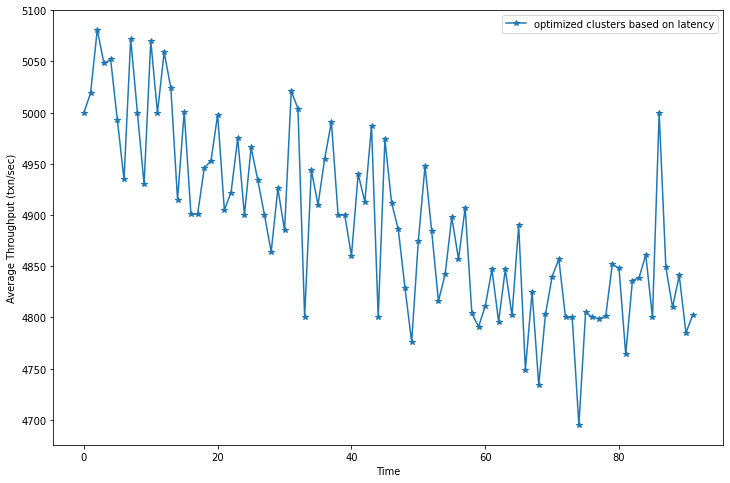

<Figure size 432x288 with 0 Axes>

In [198]:



fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(s1,s2, '-*', label = 'optimized clusters based on latency')


pl.legend()
pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
# pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# pl.ylim(0,50)
# pl.savefig('/home/tejas/Desktop/OptClusters.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

In [199]:
# pl.figure(figsize = (12,8))
# pl.rcParams.update({'font.size': 17})
# fig.patch.set_facecolor('white')
# pl.plot(s1,s2, '-*', label = 'Hotstuff-MC: Leader Failure')


# pl.legend()
# pl.xlabel('Time')
# pl.ylabel('Throughput (txn/sec)')
# # pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# # pl.ylim(0,50)
# pl.savefig('/home/tejas/Desktop/LeaderFailure_HotStuffMC.png', dpi =150, bbox_inches = 0 )
# pl.show()
# pl.clf()

(0.8, 1.2)

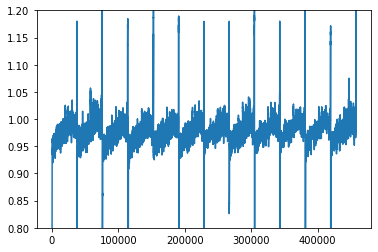

0
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-232-9-40.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-35-154-197-184.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
10 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-43-205-120-73.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec10.conf >../nohup.out 2>&1 &"
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-127-177-226.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-127-105-133.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
0
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-52-66-200-177.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup

0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-15-206-72-22.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
0 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-235-17-178.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec0.conf >../nohup.out 2>&1 &"
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-43-205-240-213.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
43 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-109-214-240.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec43.conf >../nohup.out 2>&1 &"
ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-52-66-16-207.ap-south-1.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx 11 --iter -1 --max-async 400 >../nohup.out 

In [202]:
pl.plot(lats)
pl.ylim(0.8,1.2)

0
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-85-45.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"


0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-15-206-91-221.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
3 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-197-110.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec3.conf >../nohup.out 2>&1 &"
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-235-17-178.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
9 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-53-74.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec9.conf >../nohup.out 2>&1 &"
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-52-66-63-15.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
7 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-15-

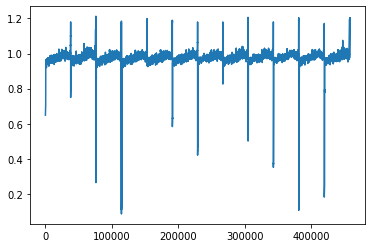

0
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-52-66-16-207.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
15 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-65-1-109-246.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec15.conf >../nohup.out 2>&1 &"
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-48-168.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
17 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-110-213-11.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec17.conf >../nohup.out 2>&1 &"
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-234-110-41.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
18 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubun

In [201]:
pl.plot(lats)
# pl.ylim(0,0.6)

In [ ]:
lats

In [61]:
os.system('grep -n -r "LatencyPlot: new node sending join request message" ../../../dump_files/')

256

In [62]:
os.system('grep -n -r "LatencyPlot: Received first message with new node info" ../../../dump_files/')

256

In [63]:
os.system('grep -n -r "LatencyPlot: Leader received with tentative sets from all peer nodes" ../../../dump_files/')        

256

In [64]:
1000*(32.776365 - 32.768622)

7.742999999997835

In [65]:
os.system('grep -n -r "LatencyPlot: Received second join message" ../../../dump_files/')        

256

In [66]:
os.system('grep -n -r "LatencyPlot: Received initial join message" ../../../dump_files/')        

256

In [67]:
os.system('grep -n -r "Sending Join Init message with height" ../../../dump_files/')        

256

In [68]:
1000*(17.534818-17.534437)

0.3810000000008529

In [69]:
os.system('grep -n -r "LatencyPlot: Sent response to  initial join message" ../../../dump_files/')        

256

In [70]:

    
os.system('grep -n -r "LatencyPlot: Received second join message" ../../../dump_files/')        

256

In [71]:
17.536482

17.536482

In [72]:
# os.system('grep -n -r "quorum reached for second join message with cluster_id" ../../../dump_files/')

In [73]:
# os.system('grep -n -r "LatencyPlot: Received 1st MC message" ../../../dump_files/')

In [74]:
# os.system('grep -n -r "LatencyPlot: before sending first mc message" ../../../dump_files/')

In [75]:
# 1000*(32.676090-32.612236)

In [76]:
# os.system('grep -n -r "LatencyPlot: going to execute based on 2nd MC message" ../../../dump_files/')


# os.system('grep -n -r "LatencyPlot: Finished execution" ../../../dump_files/')

# os.system('grep -n -r "LatencyPlot: Processing message from client" ../../../dump_files/')    

In [77]:
# os.system('grep -n -r "LatencyPlot: before initial join message" ../../../dump_files/')    

In [78]:
# # os.system('grep -n -r "LatencyPlot: " ../../../dump_files/')

# 1000*(11.479877-11.479442), 1000*(11.484887-11.479877),1000*(56.048590-56.046569), 1000*(56.050021 - 56.048590)

# # exec, # first mc, #second mc

# 1000*(56.050377 - 56.050181), 1000*(56.049389-56.049025), 1000*(56.050875-56.049389), 1000*(56.046557-56.038591) 


# # with open('opt1.npy', 'wb') as f:
# #     np.save(f, s1)
# #     np.save(f, s2)
    

    
# # with open('opt1.npy', 'rb') as f:
# #     opt1 = np.load(f)
# #     opt2 = np.load(f)
  
    








# # with open('equiCluster1.npy', 'wb') as f:
# #     np.save(f, s1)
# #     np.save(f, s2)
    

    
# # with open('equiCluster1.npy', 'rb') as f:
# #     eq1 = np.load(f)
# #     eq2 = np.load(f)
  
    
    
    
# # with open('equiCluster.npy', 'rb') as f:
# #     eq1 = np.load(f)
# #     eq2 = np.load(f)

    
# # with open('lat.npy', 'rb') as f:
# #     lat1 = np.load(f)
# #     lat2 = np.load(f)

    
    
# # with open('opt.npy', 'rb') as f:
# #     opt1 = np.load(f)
# #     opt2 = np.load(f)


# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')
# pl.plot(s1,s2, '-*', label = 'optimized clusters based on latency')

# # pl.plot(eq1,eq2, '-*', label = 'optimized clusters: equal clusters (7 (R1),7 (R2)')
# # pl.plot(lat1,lat2, '-*', label = 'optimized clusters: latency (9 (R1),5 (R2))')
# # pl.plot(opt1,opt2, '-*', label = 'optimized clusters: latency and heterogeneity (4 (R1),5 (R1), 5 (R2))')
# pl.legend()
# pl.xlabel('Time')
# pl.ylabel('Average Throughput (txn/sec)')
# # pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# # pl.ylim(0,350)
# # pl.savefig('/home/tejas/Desktop/OptClusters.png', dpi =150, bbox_inches = 0 )
# pl.show()
# pl.clf()

0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-15-206-93-127.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-234-226-135.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
0
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-224-80.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
0
0
5 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-110-33-61.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec5.conf >../nohup.out 2>&1 &"
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-110-120-142.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
7 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-64-189.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo

0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-109-185-208.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
20 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-3-111-147-214.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec20.conf >../nohup.out 2>&1 &"
0
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-43-205-232-139.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
17 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-235-24-55.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec17.conf >../nohup.out 2>&1 &"
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-234-217-72.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
25 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem

0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-232-12-61.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
14 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-126-0-127.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec14.conf >../nohup.out 2>&1 &"
ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-15-206-93-127.ap-south-1.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx 0 --iter -1 --max-async 400 >../nohup.out 2>&1 &"
0
0
ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-126-0-127.ap-south-1.compute.amazonaws.com -T "sudo rm -f nohup.out;"
32 ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem ubuntu@ec2-13-233-141-45.ap-south-1.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec32.conf >../nohup.out

## Single Non-Leader Failure

experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

os.system('cd ../../; git add .; git commit -m "testing rvc on server"; git push -f')

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote2)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results) 

def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
    
for i in node_info_dict['publicIP']:
    run_server_node_remote(i)
    
    
time.sleep(20)



def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 40 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

time.sleep(40)

for i in node_info_dict['publicIP']:
    if i==3:
        print(i)
        kill_nodes_remote(i)

time.sleep(45)

for i in node_info_dict['publicIP']:
    kill_nodes_remote(i)


for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

experiment = '../../dump_files'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-2],Y[:-2], '-*')
pl.axvline(x=40, ls='--', color = 'red')
pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
pl.title('HotStuff Multicluster: Single Non-Leader Failure')

# pl.ylim(0,1000)
pl.savefig('/home/tejas/Desktop/NodeFailure.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

## Single Leave

## Multiple Non Leader Failure

experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

os.system('cd ../../; git add .; git commit -m "testing rvc on server"; git push -f')

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote2)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results) 

def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hs; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
    
for i in node_info_dict['publicIP']:
    run_server_node_remote(i)
    
    
time.sleep(20)



def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hs; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 40 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

time.sleep(40)

for i in node_info_dict['publicIP']:
    if i==3:
        print(i)
        kill_nodes_remote(i)
        
time.sleep(20)

for i in node_info_dict['publicIP']:
    if i==7:
        print(i)
        kill_nodes_remote(i)
        
time.sleep(20)

for i in node_info_dict['publicIP']:
    if i==11:
        print(i)
        kill_nodes_remote(i)

time.sleep(45)

for i in node_info_dict['publicIP']:
    kill_nodes_remote(i)


for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

experiment = '../../dump_files'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-2],Y[:-2], '-*')
pl.axvline(x=40, ls='--', color = 'red')
pl.axvline(x=60, ls='--', color = 'green')
pl.axvline(x=80, ls='--', color = 'blue')

pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
pl.title('HotStuff Multicluster: Multiple Non-Leader Failure')

# pl.ylim(0,1000)
pl.savefig('/home/tejas/Desktop/MultiNodeFailure.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

## Single Leave